# 🎯 Convex Optimization: A Complete Course

## From Fundamentals to Advanced Applications

---

**Author**: A Comprehensive Learning Resource  
**Level**: Beginner → Intermediate → Advanced  
**Prerequisites**: Basic calculus, linear algebra, Python programming

---

### Course Overview

Welcome to this comprehensive course on **Convex Optimization** — one of the most important and practically useful branches of mathematical optimization. This course is designed to take you from foundational concepts to advanced techniques, with a strong emphasis on both theoretical understanding and practical implementation.

### Why Convex Optimization?

Convex optimization is the backbone of modern:

- **Machine Learning**: Training neural networks, SVMs, logistic regression
- **Signal Processing**: Image reconstruction, compressed sensing
- **Finance**: Portfolio optimization, risk management
- **Control Systems**: Model predictive control, robotics
- **Operations Research**: Resource allocation, scheduling

The key insight that makes convex optimization so powerful: **every local minimum is a global minimum**. This property allows us to develop efficient algorithms with guaranteed convergence.

---

### 📚 Table of Contents

| Chapter | Title                                      | Description                                                    |
| ------- | ------------------------------------------ | -------------------------------------------------------------- |
| **1**   | [Introduction to Optimization](#chapter-1) | What is optimization? Types of problems, why convexity matters |
| **2**   | [Mathematical Foundations](#chapter-2)     | Sets, functions, linear algebra, calculus review               |
| **3**   | [Convex Sets](#chapter-3)                  | Definitions, examples, operations preserving convexity         |
| **4**   | [Convex Functions](#chapter-4)             | Properties, characterizations, operations                      |
| **5**   | [Convex Optimization Problems](#chapter-5) | Standard forms, LP, QP, SDP                                    |
| **6**   | [Duality Theory](#chapter-6)               | Lagrangian, dual problems, KKT conditions                      |
| **7**   | [Optimization Algorithms](#chapter-7)      | Gradient descent, Newton's method, interior point methods      |
| **8**   | [Applications](#chapter-8)                 | Machine learning, signal processing, finance                   |

---

### How to Use This Course

1. **Read actively**: Don't just skim — work through derivations yourself
2. **Code along**: Run every code cell and experiment with parameters
3. **Do exercises**: Each section has exercises; attempt them before checking solutions
4. **Visualize**: Pay special attention to Manim visualizations that build intuition
5. **Review**: Use chapter summaries and review questions to consolidate learning

Let's begin our journey into the beautiful world of convex optimization!


In [1]:
# =============================================================================
# SETUP: Import Required Libraries
# =============================================================================
# Run this cell first to set up all necessary imports for the course

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
from scipy.linalg import cholesky, eigh
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

# For reproducibility
np.random.seed(42)

print("✅ All libraries imported successfully!")
print("📊 Ready to begin the Convex Optimization course!")

✅ All libraries imported successfully!
📊 Ready to begin the Convex Optimization course!


<a id="chapter-1"></a>

# Chapter 1: Introduction to Optimization

---

## 1.1 What is Optimization?

### The Big Picture

At its core, **optimization** is about making the best possible decision from a set of available choices. We encounter optimization problems every day, often without realizing it:

- A driver choosing the fastest route to work
- A company deciding how much of each product to manufacture
- A machine learning algorithm finding the best model parameters

Mathematically, an optimization problem has three components:

1. **Decision variables** ($x$): What we can control or choose
2. **Objective function** ($f(x)$): What we want to minimize (or maximize)
3. **Constraints**: Restrictions on what choices are allowed

### Formal Definition

The standard form of an optimization problem is:

$$
\begin{aligned}
\text{minimize} \quad & f(x) \\
\text{subject to} \quad & g_i(x) \leq 0, \quad i = 1, \ldots, m \\
& h_j(x) = 0, \quad j = 1, \ldots, p
\end{aligned}
$$

Where:

- $x \in \mathbb{R}^n$ is the **optimization variable** (or decision variable)
- $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is the **objective function** (or cost function)
- $g_i: \mathbb{R}^n \rightarrow \mathbb{R}$ are **inequality constraint functions**
- $h_j: \mathbb{R}^n \rightarrow \mathbb{R}$ are **equality constraint functions**

### Key Terminology

| Term               | Definition                                                             |
| ------------------ | ---------------------------------------------------------------------- |
| **Feasible point** | A point $x$ that satisfies all constraints                             |
| **Feasible set**   | The set of all feasible points                                         |
| **Optimal value**  | The minimum value of $f$ over the feasible set, denoted $p^*$          |
| **Optimal point**  | A feasible point $x^*$ where $f(x^*) = p^*$                            |
| **Local minimum**  | A point $x^*$ where $f(x^*) \leq f(x)$ for all feasible $x$ near $x^*$ |
| **Global minimum** | A point $x^*$ where $f(x^*) \leq f(x)$ for all feasible $x$            |

---

## 1.2 Why Optimization Matters

Optimization is fundamental to:

### Engineering & Science

- **Control systems**: Finding optimal control inputs
- **Signal processing**: Designing optimal filters
- **Machine learning**: Training models by minimizing loss functions

### Business & Economics

- **Supply chain**: Minimizing costs while meeting demand
- **Finance**: Maximizing returns while managing risk
- **Operations**: Scheduling and resource allocation

### Everyday Life

- **Navigation**: Finding shortest/fastest routes
- **Diet planning**: Meeting nutritional needs at minimum cost
- **Energy**: Minimizing consumption while maintaining comfort


## 1.3 Types of Optimization Problems

Understanding the classification of optimization problems is crucial because different types require different solution approaches.

### Classification by Variable Type

| Type              | Variables                      | Example                                |
| ----------------- | ------------------------------ | -------------------------------------- |
| **Continuous**    | $x \in \mathbb{R}^n$           | Finding optimal portfolio weights      |
| **Discrete**      | $x \in \mathbb{Z}^n$           | Selecting items for a knapsack         |
| **Mixed-integer** | Some continuous, some discrete | Factory planning with yes/no decisions |

### Classification by Constraint Structure

| Type                      | Constraints                       | Complexity |
| ------------------------- | --------------------------------- | ---------- |
| **Unconstrained**         | None                              | Simplest   |
| **Bound-constrained**     | $l \leq x \leq u$                 | Simple     |
| **Linear constraints**    | $Ax \leq b$, $Cx = d$             | Moderate   |
| **Nonlinear constraints** | General $g(x) \leq 0$, $h(x) = 0$ | Complex    |

### Classification by Function Properties

This is where **convexity** comes in — the central theme of this course:

| Type           | Properties                            | Difficulty                  |
| -------------- | ------------------------------------- | --------------------------- |
| **Linear**     | Linear objective and constraints      | Efficient (polynomial time) |
| **Convex**     | Convex objective, convex feasible set | Efficient (polynomial time) |
| **Non-convex** | General functions                     | Hard (potentially NP-hard)  |

### The Hierarchy of Optimization Problems

```
┌─────────────────────────────────────────────────────────────┐
│                   General Optimization                       │
│                      (Very Hard)                            │
│  ┌───────────────────────────────────────────────────────┐  │
│  │              Non-convex Optimization                  │  │
│  │                    (Hard)                             │  │
│  │  ┌─────────────────────────────────────────────────┐  │  │
│  │  │           Convex Optimization                   │  │  │
│  │  │              (Tractable)                        │  │  │
│  │  │  ┌───────────────────────────────────────────┐  │  │  │
│  │  │  │       Quadratic Programming (QP)          │  │  │  │
│  │  │  │  ┌─────────────────────────────────────┐  │  │  │  │
│  │  │  │  │    Linear Programming (LP)          │  │  │  │  │
│  │  │  │  │        (Very Efficient)             │  │  │  │  │
│  │  │  │  └─────────────────────────────────────┘  │  │  │  │
│  │  │  └───────────────────────────────────────────┘  │  │  │
│  │  └─────────────────────────────────────────────────┘  │  │
│  └───────────────────────────────────────────────────────┘  │
└─────────────────────────────────────────────────────────────┘
```


## 1.4 Why Convexity is So Important

### The Fundamental Property

The most important property of convex optimization:

> **Every local minimum of a convex optimization problem is a global minimum.**

This seemingly simple statement has profound implications:

1. **No need to search**: Once you find a local minimum, you're done
2. **Efficient algorithms exist**: We can solve convex problems in polynomial time
3. **Guarantees**: We can prove that our solution is optimal

### Visual Intuition: Local vs Global Minima

Let's visualize the difference between convex and non-convex functions:


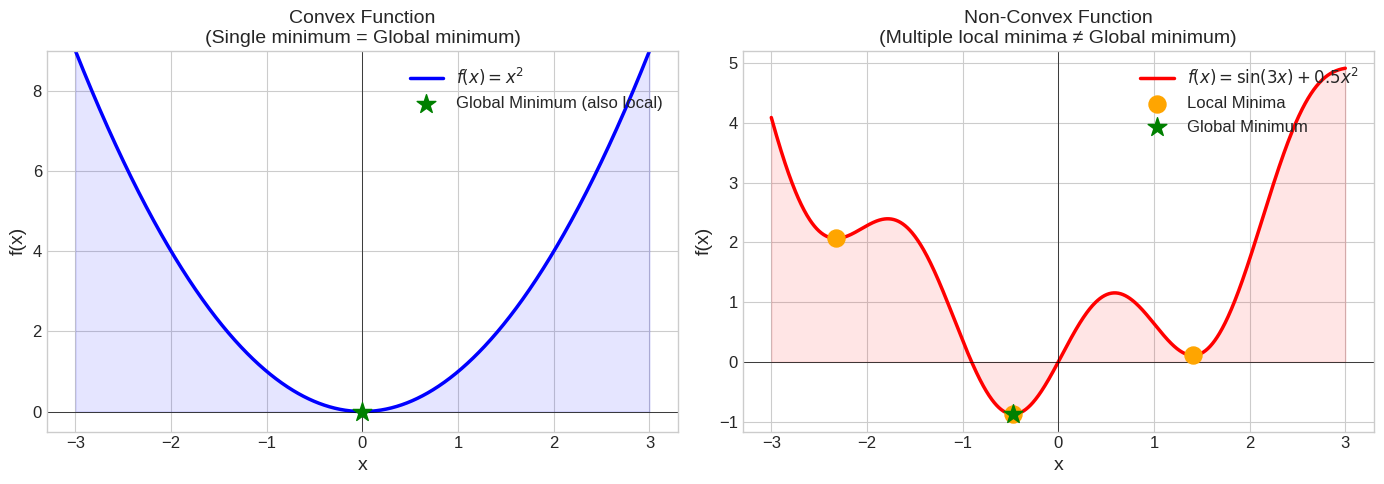


📊 Key Insight:
• Convex function: One minimum → optimization algorithms find it reliably
• Non-convex function: Multiple minima → algorithms may get stuck in local minima


In [2]:
# =============================================================================
# Visualization: Convex vs Non-Convex Functions
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Convex function: f(x) = x^2
x = np.linspace(-3, 3, 1000)
y_convex = x**2

axes[0].plot(x, y_convex, 'b-', linewidth=2.5, label='$f(x) = x^2$')
axes[0].scatter([0], [0], color='green', s=200, zorder=5, marker='*', 
                label='Global Minimum (also local)')
axes[0].fill_between(x, y_convex, alpha=0.1, color='blue')
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].set_title('Convex Function\n(Single minimum = Global minimum)', fontsize=14)
axes[0].legend(loc='upper right')
axes[0].set_ylim(-0.5, 9)
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)

# Non-convex function: multiple local minima
y_nonconvex = np.sin(3*x) + 0.5*x**2

# Find local minima
from scipy.signal import argrelextrema
local_min_idx = argrelextrema(y_nonconvex, np.less)[0]
global_min_idx = np.argmin(y_nonconvex)

axes[1].plot(x, y_nonconvex, 'r-', linewidth=2.5, label='$f(x) = \\sin(3x) + 0.5x^2$')
axes[1].scatter(x[local_min_idx], y_nonconvex[local_min_idx], color='orange', s=150, 
                zorder=5, marker='o', label='Local Minima')
axes[1].scatter(x[global_min_idx], y_nonconvex[global_min_idx], color='green', s=200, 
                zorder=6, marker='*', label='Global Minimum')
axes[1].fill_between(x, y_nonconvex, alpha=0.1, color='red')
axes[1].set_xlabel('x')
axes[1].set_ylabel('f(x)')
axes[1].set_title('Non-Convex Function\n(Multiple local minima ≠ Global minimum)', fontsize=14)
axes[1].legend(loc='upper right')
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/convex_vs_nonconvex.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Key Insight:")
print("• Convex function: One minimum → optimization algorithms find it reliably")
print("• Non-convex function: Multiple minima → algorithms may get stuck in local minima")

### Understanding the Visualization

**Left plot (Convex)**: The parabola $f(x) = x^2$ has exactly one minimum at $x = 0$. No matter where you start, if you follow the downhill direction, you'll reach this global minimum. This is the essence of convexity.

**Right plot (Non-convex)**: The function $f(x) = \sin(3x) + 0.5x^2$ has multiple local minima (orange dots). An optimization algorithm might get "trapped" in one of these valleys without reaching the true global minimum (green star).

---

## 1.5 A First Look at Convex Functions

### Intuitive Definition

A function is **convex** if a line segment connecting any two points on the graph lies above or on the graph itself.

Mathematically, $f$ is convex if for all $x, y$ in the domain and $\theta \in [0, 1]$:

$$f(\theta x + (1-\theta)y) \leq \theta f(x) + (1-\theta) f(y)$$

### Visual Interpretation

The inequality says:

- **Left side**: The function value at a weighted average of $x$ and $y$
- **Right side**: The weighted average of the function values

For convex functions: the function value at the average is less than or equal to the average of the function values.

This is sometimes called **Jensen's inequality** (when extended to expectations).


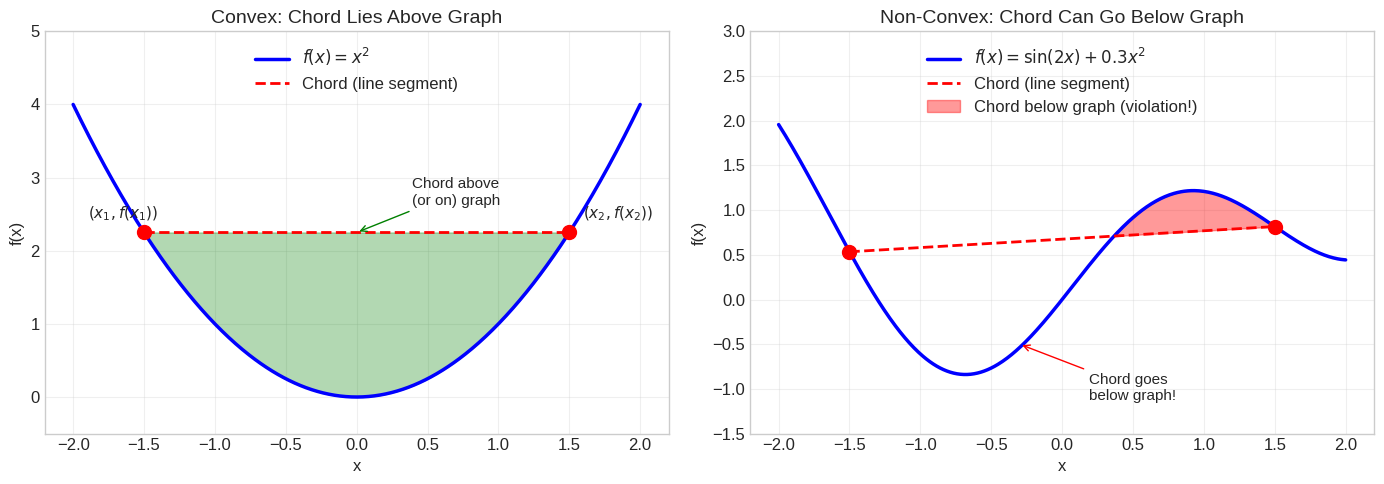


🔑 Key Point: A function is convex if and only if the chord (line segment)
   connecting any two points on the graph lies above or on the graph.


In [3]:
# =============================================================================
# Visualization: Definition of Convexity (Chord above graph)
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-2, 2, 500)

# Points for the chord
x1, x2 = -1.5, 1.5

# --- Convex Function ---
f_convex = lambda t: t**2

y1_c, y2_c = f_convex(x1), f_convex(x2)

# Chord between (x1, y1) and (x2, y2)
theta_vals = np.linspace(0, 1, 100)
chord_x = (1 - theta_vals) * x1 + theta_vals * x2
chord_y = (1 - theta_vals) * y1_c + theta_vals * y2_c

# Plot
axes[0].plot(x, f_convex(x), 'b-', linewidth=2.5, label='$f(x) = x^2$')
axes[0].plot(chord_x, chord_y, 'r--', linewidth=2, label='Chord (line segment)')
axes[0].scatter([x1, x2], [y1_c, y2_c], color='red', s=100, zorder=5)
axes[0].annotate(f'$(x_1, f(x_1))$', (x1, y1_c), textcoords="offset points", 
                 xytext=(-40, 10), fontsize=11)
axes[0].annotate(f'$(x_2, f(x_2))$', (x2, y2_c), textcoords="offset points", 
                 xytext=(10, 10), fontsize=11)

# Show that chord is above
mid_x = 0.5 * (x1 + x2)
axes[0].annotate('Chord above\n(or on) graph', (mid_x, 0.5*(y1_c+y2_c)), 
                 textcoords="offset points", xytext=(40, 20), fontsize=11,
                 arrowprops=dict(arrowstyle='->', color='green'))

# Shade region between chord and curve
x_fill = np.linspace(x1, x2, 100)
y_curve = f_convex(x_fill)
y_chord = y1_c + (y2_c - y1_c) * (x_fill - x1) / (x2 - x1)
axes[0].fill_between(x_fill, y_curve, y_chord, alpha=0.3, color='green')

axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].set_title('Convex: Chord Lies Above Graph', fontsize=14)
axes[0].legend(loc='upper center')
axes[0].set_ylim(-0.5, 5)
axes[0].grid(True, alpha=0.3)

# --- Non-Convex Function ---
f_nonconvex = lambda t: np.sin(2*t) + 0.3*t**2

y1_nc, y2_nc = f_nonconvex(x1), f_nonconvex(x2)

# Chord
chord_y_nc = (1 - theta_vals) * y1_nc + theta_vals * y2_nc

# Plot
axes[1].plot(x, f_nonconvex(x), 'b-', linewidth=2.5, label='$f(x) = \\sin(2x) + 0.3x^2$')
axes[1].plot(chord_x, chord_y_nc, 'r--', linewidth=2, label='Chord (line segment)')
axes[1].scatter([x1, x2], [y1_nc, y2_nc], color='red', s=100, zorder=5)

# Show violation
x_fill = np.linspace(x1, x2, 100)
y_curve_nc = f_nonconvex(x_fill)
y_chord_nc = y1_nc + (y2_nc - y1_nc) * (x_fill - x1) / (x2 - x1)

# Highlight where chord goes below
violation_mask = y_chord_nc < y_curve_nc
axes[1].fill_between(x_fill, y_curve_nc, y_chord_nc, where=violation_mask,
                     alpha=0.4, color='red', label='Chord below graph (violation!)')

axes[1].annotate('Chord goes\nbelow graph!', (-0.3, -0.5), 
                 textcoords="offset points", xytext=(50, -40), fontsize=11,
                 arrowprops=dict(arrowstyle='->', color='red'))

axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('f(x)', fontsize=12)
axes[1].set_title('Non-Convex: Chord Can Go Below Graph', fontsize=14)
axes[1].legend(loc='upper center')
axes[1].set_ylim(-1.5, 3)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/convexity_definition.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n🔑 Key Point: A function is convex if and only if the chord (line segment)")
print("   connecting any two points on the graph lies above or on the graph.")

## 1.6 Worked Examples

### Example 1.1: A Simple Unconstrained Problem

**Problem**: Find the minimum of $f(x) = x^2 - 4x + 7$.

**Solution**:

**Step 1**: Recognize this is a quadratic (convex) function.

The function can be written as $f(x) = (x-2)^2 + 3$ (completing the square).

**Step 2**: Find the critical point by setting the derivative to zero.
$$f'(x) = 2x - 4 = 0 \implies x^* = 2$$

**Step 3**: Verify it's a minimum (second derivative test).
$$f''(x) = 2 > 0 \text{ (positive, so it's a minimum)}$$

**Step 4**: Calculate the optimal value.
$$f(x^*) = f(2) = 4 - 8 + 7 = 3$$

**Answer**: The minimum is $f^* = 3$ achieved at $x^* = 2$.

---

### Example 1.2: Constrained Optimization - A Manufacturing Problem

**Problem**: A company produces two products, A and B.

- Product A gives profit \$3/unit, requires 2 hours of labor
- Product B gives profit \$5/unit, requires 3 hours of labor
- Available: 120 hours of labor
- Demand constraints: At most 30 units of A, at most 25 units of B

**Find the production quantities that maximize profit.**

**Formulation**:
Let $x_1$ = units of A, $x_2$ = units of B

$$
\begin{aligned}
\text{maximize} \quad & 3x_1 + 5x_2 \\
\text{subject to} \quad & 2x_1 + 3x_2 \leq 120 & \text{(labor constraint)} \\
& x_1 \leq 30 & \text{(demand for A)} \\
& x_2 \leq 25 & \text{(demand for B)} \\
& x_1, x_2 \geq 0 & \text{(non-negativity)}
\end{aligned}
$$

This is a **linear program** (LP) — a special case of convex optimization.


In [4]:
# =============================================================================
# Example 1.2: Solving the Manufacturing Problem
# =============================================================================

from scipy.optimize import linprog

# Coefficients for maximization (linprog minimizes, so negate)
c = [-3, -5]  # Negative because we want to maximize

# Inequality constraints: A_ub @ x <= b_ub
A_ub = [
    [2, 3],    # 2x1 + 3x2 <= 120 (labor)
    [1, 0],    # x1 <= 30 (demand A)
    [0, 1]     # x2 <= 25 (demand B)
]
b_ub = [120, 30, 25]

# Bounds for variables
x1_bounds = (0, None)  # x1 >= 0
x2_bounds = (0, None)  # x2 >= 0

# Solve
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x1_bounds, x2_bounds], method='highs')

print("=" * 50)
print("MANUFACTURING OPTIMIZATION RESULT")
print("=" * 50)
print(f"\n✅ Optimal Solution Found!")
print(f"\n📦 Production Plan:")
print(f"   Product A: {result.x[0]:.1f} units")
print(f"   Product B: {result.x[1]:.1f} units")
print(f"\n💰 Maximum Profit: ${-result.fun:.2f}")

# Verify constraints
print(f"\n📋 Constraint Verification:")
print(f"   Labor used: {2*result.x[0] + 3*result.x[1]:.1f} / 120 hours")
print(f"   Product A: {result.x[0]:.1f} / 30 units max")
print(f"   Product B: {result.x[1]:.1f} / 25 units max")

MANUFACTURING OPTIMIZATION RESULT

✅ Optimal Solution Found!

📦 Production Plan:
   Product A: 22.5 units
   Product B: 25.0 units

💰 Maximum Profit: $192.50

📋 Constraint Verification:
   Labor used: 120.0 / 120 hours
   Product A: 22.5 / 30 units max
   Product B: 25.0 / 25 units max


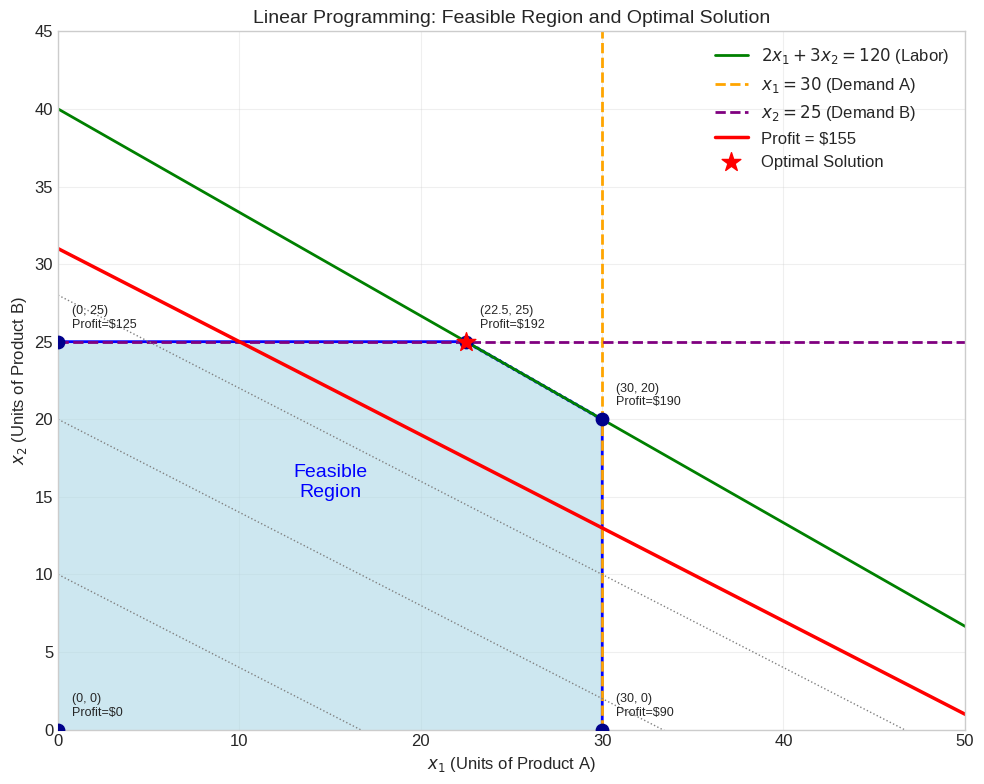


🔑 Key Insight: In linear programming, the optimal solution always occurs
   at a corner (vertex) of the feasible region!


In [5]:
# =============================================================================
# Visualization: Feasible Region for Manufacturing Problem
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

# Create meshgrid for the feasible region
x1 = np.linspace(0, 50, 500)
x2 = np.linspace(0, 50, 500)
X1, X2 = np.meshgrid(x1, x2)

# Define constraints
labor = 2*X1 + 3*X2 <= 120
demand_a = X1 <= 30
demand_b = X2 <= 25
nonneg = (X1 >= 0) & (X2 >= 0)

# Feasible region
feasible = labor & demand_a & demand_b & nonneg

# Plot feasible region
ax.contourf(X1, X2, feasible.astype(int), levels=[0.5, 1.5], colors=['lightblue'], alpha=0.6)
ax.contour(X1, X2, feasible.astype(int), levels=[0.5], colors=['blue'], linewidths=2)

# Plot constraint lines
x1_line = np.linspace(0, 60, 100)

# Labor constraint: 2x1 + 3x2 = 120 => x2 = (120 - 2x1)/3
x2_labor = (120 - 2*x1_line) / 3
ax.plot(x1_line, x2_labor, 'g-', linewidth=2, label='$2x_1 + 3x_2 = 120$ (Labor)')

# Demand constraints
ax.axvline(x=30, color='orange', linewidth=2, linestyle='--', label='$x_1 = 30$ (Demand A)')
ax.axhline(y=25, color='purple', linewidth=2, linestyle='--', label='$x_2 = 25$ (Demand B)')

# Plot iso-profit lines
profits = [50, 100, 140, 155]
colors = ['gray', 'gray', 'gray', 'red']
for profit, color in zip(profits, colors):
    x2_profit = (profit - 3*x1_line) / 5
    linestyle = '-' if color == 'red' else ':'
    linewidth = 2.5 if color == 'red' else 1
    ax.plot(x1_line, x2_profit, color=color, linewidth=linewidth, linestyle=linestyle,
            label=f'Profit = ${profit}' if color == 'red' else None)

# Mark corner points
corners = [(0, 0), (30, 0), (30, 20), (22.5, 25), (0, 25)]
for corner in corners:
    ax.scatter(*corner, color='darkblue', s=80, zorder=5)
    profit = 3*corner[0] + 5*corner[1]
    ax.annotate(f'({corner[0]}, {corner[1]})\nProfit=${profit:.0f}', corner, 
                textcoords="offset points", xytext=(10, 10), fontsize=9)

# Mark optimal point
ax.scatter(22.5, 25, color='red', s=200, marker='*', zorder=10, label='Optimal Solution')

ax.set_xlim(0, 50)
ax.set_ylim(0, 45)
ax.set_xlabel('$x_1$ (Units of Product A)', fontsize=12)
ax.set_ylabel('$x_2$ (Units of Product B)', fontsize=12)
ax.set_title('Linear Programming: Feasible Region and Optimal Solution', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# Add annotation
ax.annotate('Feasible\nRegion', (15, 15), fontsize=14, ha='center', color='blue')

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/lp_feasible_region.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n🔑 Key Insight: In linear programming, the optimal solution always occurs")
print("   at a corner (vertex) of the feasible region!")

## 1.7 Common Mistakes and Misconceptions

### ❌ Mistake 1: Confusing Local and Global Optima

**Misconception**: "If I find a point where the derivative is zero, I've found the minimum."

**Reality**: For non-convex functions, a zero derivative indicates a _critical point_, which could be:

- A local minimum
- A local maximum
- A saddle point

Only for convex functions is every critical point guaranteed to be a global minimum.

### ❌ Mistake 2: Assuming All Optimization Problems Are Convex

**Misconception**: "All real-world problems can be solved efficiently."

**Reality**: Many practical problems (neural network training, combinatorial optimization) are non-convex. We often use heuristics or settle for local optima.

### ❌ Mistake 3: Ignoring Constraints

**Misconception**: "I can solve the unconstrained problem first, then adjust for constraints."

**Reality**: Constraints fundamentally change the problem. The constrained optimum is often at a constraint boundary, not where the gradient is zero.

### ❌ Mistake 4: Minimization vs Maximization Confusion

**Misconception**: "Maximization is a completely different problem."

**Reality**: Maximizing $f(x)$ is equivalent to minimizing $-f(x)$. We use minimization as the standard form.

---

## 1.8 Exercises - Chapter 1

### Exercise 1.1 (Easy): Identifying Optimization Problems

For each scenario, identify: (a) the decision variables, (b) the objective function, (c) the constraints.

1. A farmer wants to fence a rectangular field with 200 meters of fencing to maximize area.
2. A student wants to minimize study time while achieving at least 80% on each of 5 exams.
3. An airline wants to schedule crews to minimize cost while covering all flights.

### Exercise 1.2 (Medium): Convexity Check

Determine whether each function is convex, concave, or neither. Justify your answer.

1. $f(x) = e^x$
2. $f(x) = \ln(x)$ for $x > 0$
3. $f(x) = x^3$
4. $f(x) = |x|$
5. $f(x, y) = x^2 + y^2$

### Exercise 1.3 (Medium): Simple Optimization

Solve the following optimization problem analytically:

$$\text{minimize} \quad f(x, y) = x^2 + 2y^2 - 4x - 8y + 10$$

### Exercise 1.4 (Challenging): Constrained Problem

A baker can make cakes and pies. Each cake uses 3 cups of flour and 2 eggs, sells for \$15. Each pie uses 2 cups of flour and 3 eggs, sells for \$12. She has 180 cups of flour and 150 eggs.

1. Formulate this as a linear program.
2. Solve using Python.
3. Interpret the solution.

---

## 1.9 Chapter 1 Summary

### Key Takeaways

1. **Optimization** is about finding the best solution from a set of feasible alternatives.

2. **Standard form**: minimize $f(x)$ subject to inequality and equality constraints.

3. **Convex optimization** is special because every local minimum is a global minimum.

4. **Types of problems** range from easy (linear) to hard (non-convex).

5. The **feasible set** is defined by the constraints; the optimal point achieves the minimum objective value over this set.

### Concepts to Remember

| Concept       | Key Point                                       |
| ------------- | ----------------------------------------------- |
| Optimization  | Decision variables + Objective + Constraints    |
| Convexity     | Guarantees global optimality of local solutions |
| Feasible set  | All points satisfying constraints               |
| Optimal value | Best achievable objective value                 |

### Looking Ahead

In Chapter 2, we'll build the mathematical foundations needed to rigorously work with convex sets and functions. This includes essential concepts from linear algebra and calculus that form the toolkit for optimization.


<a id="chapter-2"></a>

# Chapter 2: Mathematical Foundations

---

## 2.1 Introduction

Before diving deeper into convex optimization, we need to establish solid mathematical foundations. This chapter reviews the essential concepts from:

- **Linear Algebra**: Vectors, matrices, eigenvalues, positive definiteness
- **Calculus**: Gradients, Hessians, Taylor expansions
- **Set Theory**: Basic notation and operations

These tools are indispensable for understanding, analyzing, and solving optimization problems.

---

## 2.2 Vectors and Vector Spaces

### 2.2.1 Vector Basics

A **vector** $x \in \mathbb{R}^n$ is an ordered list of $n$ real numbers:

$$x = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}$$

### 2.2.2 Vector Operations

**Addition**: Component-wise
$$x + y = \begin{pmatrix} x_1 + y_1 \\ x_2 + y_2 \\ \vdots \\ x_n + y_n \end{pmatrix}$$

**Scalar Multiplication**: Multiply each component
$$\alpha x = \begin{pmatrix} \alpha x_1 \\ \alpha x_2 \\ \vdots \\ \alpha x_n \end{pmatrix}$$

**Inner Product (Dot Product)**:
$$\langle x, y \rangle = x^T y = \sum_{i=1}^n x_i y_i$$

**Euclidean Norm**:
$$\|x\|_2 = \sqrt{x^T x} = \sqrt{\sum_{i=1}^n x_i^2}$$

### 2.2.3 Important Norms

| Norm          | Definition                      | Geometric Meaning  |
| ------------- | ------------------------------- | ------------------ | --- | ------------------ |
| $\ell_1$      | $\|x\|\_1 = \sum_i              | x_i                | $   | Manhattan distance |
| $\ell_2$      | $\|x\|_2 = \sqrt{\sum_i x_i^2}$ | Euclidean distance |
| $\ell_\infty$ | $\|x\|\_\infty = \max_i         | x_i                | $   | Maximum component  |

### 2.2.4 Angle Between Vectors

The angle $\theta$ between vectors $x$ and $y$:

$$\cos \theta = \frac{x^T y}{\|x\|_2 \|y\|_2}$$

Vectors are **orthogonal** if $x^T y = 0$ (i.e., $\theta = 90°$).


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


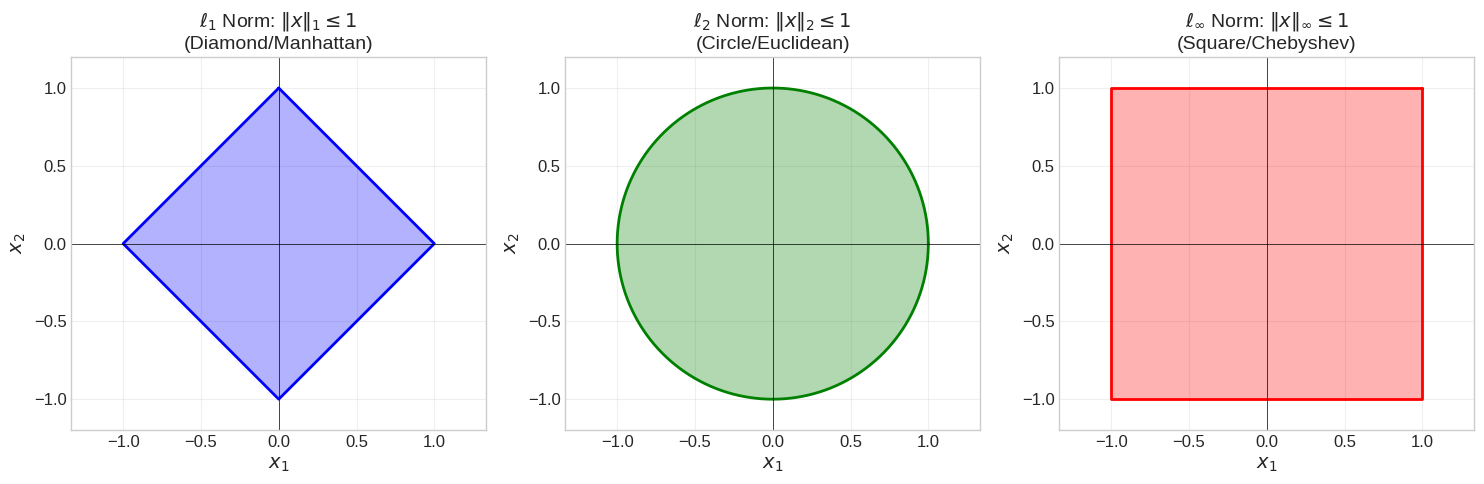

🔑 Key Insight: The 'shape' of the unit ball determines how distances are measured.
   All these norm balls are CONVEX sets (important for optimization!)


In [6]:
# =============================================================================
# Visualization: Unit Balls for Different Norms
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create points for unit balls
theta = np.linspace(0, 2*np.pi, 1000)

# L2 norm (Euclidean) - circle
x_l2 = np.cos(theta)
y_l2 = np.sin(theta)

# L1 norm (Manhattan) - diamond
t = np.linspace(0, 1, 250)
x_l1 = np.concatenate([t, 1-t, -t, t-1])
y_l1 = np.concatenate([1-t, -t, t-1, t])

# L∞ norm (Chebyshev) - square
x_linf = np.array([1, 1, -1, -1, 1])
y_linf = np.array([1, -1, -1, 1, 1])

# Plot L1
axes[0].fill(x_l1, y_l1, alpha=0.3, color='blue')
axes[0].plot(x_l1, y_l1, 'b-', linewidth=2)
axes[0].set_title('$\\ell_1$ Norm: $\\|x\\|_1 \\leq 1$\n(Diamond/Manhattan)', fontsize=14)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].axis('equal')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-1.5, 1.5)
axes[0].set_ylim(-1.5, 1.5)
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)

# Plot L2
axes[1].fill(x_l2, y_l2, alpha=0.3, color='green')
axes[1].plot(x_l2, y_l2, 'g-', linewidth=2)
axes[1].set_title('$\\ell_2$ Norm: $\\|x\\|_2 \\leq 1$\n(Circle/Euclidean)', fontsize=14)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].axis('equal')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

# Plot L∞
axes[2].fill(x_linf, y_linf, alpha=0.3, color='red')
axes[2].plot(x_linf, y_linf, 'r-', linewidth=2)
axes[2].set_title('$\\ell_\\infty$ Norm: $\\|x\\|_\\infty \\leq 1$\n(Square/Chebyshev)', fontsize=14)
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].axis('equal')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(-1.5, 1.5)
axes[2].set_ylim(-1.5, 1.5)
axes[2].axhline(y=0, color='k', linewidth=0.5)
axes[2].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/norm_balls.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 Key Insight: The 'shape' of the unit ball determines how distances are measured.")
print("   All these norm balls are CONVEX sets (important for optimization!)")

## 2.3 Matrices and Linear Transformations

### 2.3.1 Matrix Basics

A matrix $A \in \mathbb{R}^{m \times n}$ has $m$ rows and $n$ columns:

$$A = \begin{pmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{pmatrix}$$

### 2.3.2 Important Matrix Types

| Type                      | Definition                                | Property                 |
| ------------------------- | ----------------------------------------- | ------------------------ |
| **Symmetric**             | $A = A^T$                                 | $a_{ij} = a_{ji}$        |
| **Diagonal**              | $a_{ij} = 0$ for $i \neq j$               | Only diagonal entries    |
| **Identity**              | $I_{ii} = 1$, $I_{ij} = 0$ for $i \neq j$ | $AI = IA = A$            |
| **Orthogonal**            | $Q^T Q = I$                               | Preserves lengths/angles |
| **Positive Definite**     | $x^T A x > 0$ for all $x \neq 0$          | All eigenvalues > 0      |
| **Positive Semidefinite** | $x^T A x \geq 0$ for all $x$              | All eigenvalues ≥ 0      |

### 2.3.3 Matrix Operations

**Matrix-Vector Product**: $y = Ax$ where $y_i = \sum_j a_{ij} x_j$

**Matrix-Matrix Product**: $(AB)_{ij} = \sum_k a_{ik} b_{kj}$

**Trace**: $\text{tr}(A) = \sum_i a_{ii}$ (sum of diagonal elements)

**Determinant**: $\det(A)$ - measures volume scaling

### 2.3.4 Eigenvalues and Eigenvectors

An **eigenvector** $v$ of matrix $A$ satisfies:
$$Av = \lambda v$$

where $\lambda$ is the corresponding **eigenvalue**.

**Key Properties**:

- Symmetric matrices have real eigenvalues
- Symmetric matrices have orthogonal eigenvectors
- Eigenvalue decomposition: $A = Q \Lambda Q^T$ for symmetric $A$


In [7]:
# =============================================================================
# Example: Eigenvalue Decomposition
# =============================================================================

# Create a symmetric positive definite matrix
A = np.array([[4, 2],
              [2, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(A)

print("Matrix A:")
print(A)
print(f"\nEigenvalues: {eigenvalues}")
print(f"\nEigenvectors (columns):")
print(eigenvectors)

# Verify: Av = λv
print("\nVerification: Av = λv")
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]
    Av = A @ v
    lambda_v = lam * v
    print(f"  λ_{i+1} = {lam:.4f}")
    print(f"  Av_{i+1} = {Av}")
    print(f"  λ_{i+1}·v_{i+1} = {lambda_v}")
    print(f"  Match: {np.allclose(Av, lambda_v)}\n")

# Check positive definiteness
print(f"All eigenvalues positive? {all(eigenvalues > 0)}")
print("Therefore A is POSITIVE DEFINITE ✓")

Matrix A:
[[4 2]
 [2 3]]

Eigenvalues: [1.43844719 5.56155281]

Eigenvectors (columns):
[[ 0.61541221 -0.78820544]
 [-0.78820544 -0.61541221]]

Verification: Av = λv
  λ_1 = 1.4384
  Av_1 = [ 0.88523796 -1.1337919 ]
  λ_1·v_1 = [ 0.88523796 -1.1337919 ]
  Match: True

  λ_2 = 5.5616
  Av_2 = [-4.38364617 -3.4226475 ]
  λ_2·v_2 = [-4.38364617 -3.4226475 ]
  Match: True

All eigenvalues positive? True
Therefore A is POSITIVE DEFINITE ✓


## 2.4 Positive Definite Matrices (Critical for Optimization!)

### Why Positive Definiteness Matters

Positive definite (PD) and positive semidefinite (PSD) matrices are **central** to convex optimization:

- The Hessian of a convex function is PSD
- Quadratic forms $x^T A x$ are convex iff $A$ is PSD
- Many optimization algorithms require PD matrices

### Formal Definitions

A symmetric matrix $A \in \mathbb{R}^{n \times n}$ is:

**Positive Definite (PD)**: $x^T A x > 0$ for all $x \neq 0$

- Notation: $A \succ 0$
- Equivalent: All eigenvalues $\lambda_i > 0$

**Positive Semidefinite (PSD)**: $x^T A x \geq 0$ for all $x$

- Notation: $A \succeq 0$
- Equivalent: All eigenvalues $\lambda_i \geq 0$

**Negative Definite**: $x^T A x < 0$ for all $x \neq 0$ (i.e., $-A \succ 0$)

**Indefinite**: Neither PSD nor NSD (mixed signs)

### Tests for Positive Definiteness

1. **Eigenvalue test**: All eigenvalues > 0
2. **Cholesky test**: $A$ has a Cholesky decomposition $A = LL^T$
3. **Leading principal minors**: All determinants of upper-left submatrices > 0
4. **Sylvester's criterion**: Same as above (for PD matrices)


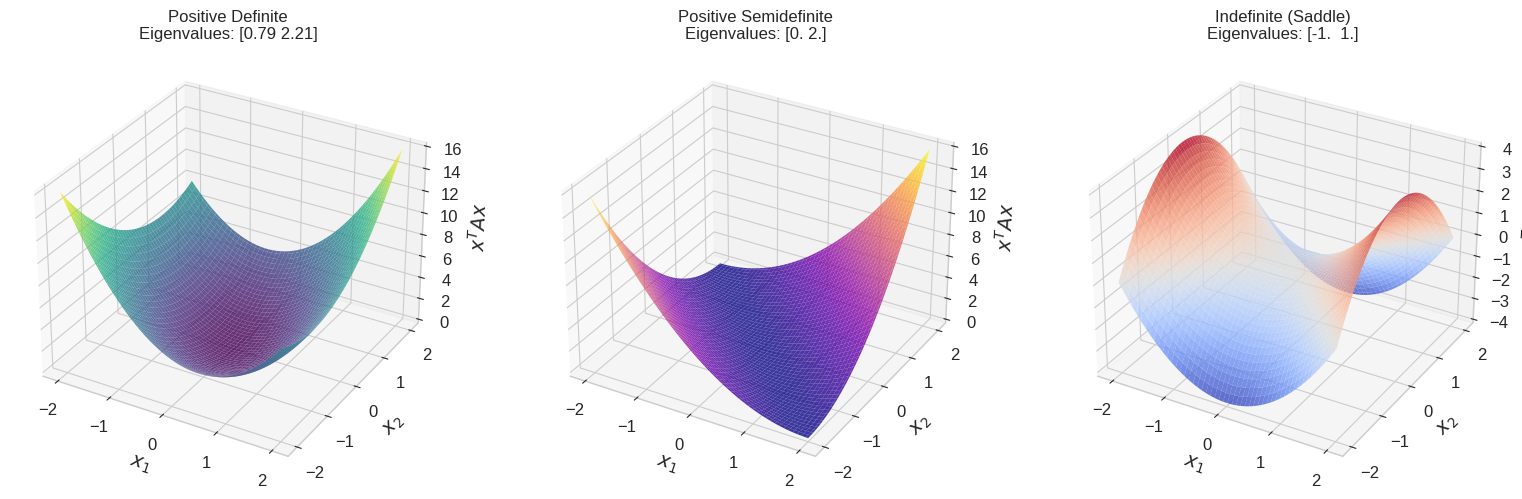


🔑 Observations:
  • PD matrix: Bowl shape (unique minimum at origin)
  • PSD matrix: Valley/trough shape (line of minima)
  • Indefinite: Saddle shape (NO minimum!)


In [8]:
# =============================================================================
# Visualization: Quadratic Forms with Different Matrices
# =============================================================================

fig = plt.figure(figsize=(16, 5))

# Create grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Helper function to compute quadratic form
def quadratic_form(X, Y, A):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            vec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = vec @ A @ vec
    return Z

# Positive Definite
A_pd = np.array([[2, 0.5], [0.5, 1]])
eigenvals_pd = np.linalg.eigvalsh(A_pd)
Z_pd = quadratic_form(X, Y, A_pd)

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z_pd, cmap='viridis', alpha=0.8)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$x^T A x$')
ax1.set_title(f'Positive Definite\nEigenvalues: {eigenvals_pd.round(2)}', fontsize=12)

# Positive Semidefinite (one zero eigenvalue)
A_psd = np.array([[1, 1], [1, 1]])  # rank 1
eigenvals_psd = np.linalg.eigvalsh(A_psd)
Z_psd = quadratic_form(X, Y, A_psd)

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z_psd, cmap='plasma', alpha=0.8)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$x^T A x$')
ax2.set_title(f'Positive Semidefinite\nEigenvalues: {eigenvals_psd.round(2)}', fontsize=12)

# Indefinite
A_indef = np.array([[1, 0], [0, -1]])
eigenvals_indef = np.linalg.eigvalsh(A_indef)
Z_indef = quadratic_form(X, Y, A_indef)

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z_indef, cmap='coolwarm', alpha=0.8)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('$x^T A x$')
ax3.set_title(f'Indefinite (Saddle)\nEigenvalues: {eigenvals_indef.round(2)}', fontsize=12)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/quadratic_forms.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n🔑 Observations:")
print("  • PD matrix: Bowl shape (unique minimum at origin)")
print("  • PSD matrix: Valley/trough shape (line of minima)")
print("  • Indefinite: Saddle shape (NO minimum!)")

## 2.5 Calculus for Optimization

### 2.5.1 Gradients

For a scalar function $f: \mathbb{R}^n \rightarrow \mathbb{R}$, the **gradient** is the vector of partial derivatives:

$$\nabla f(x) = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{pmatrix}$$

**Key Properties**:

- $\nabla f(x)$ points in the direction of steepest ascent
- $-\nabla f(x)$ points in the direction of steepest descent
- At a local minimum, $\nabla f(x^*) = 0$

### 2.5.2 Hessians

The **Hessian** is the matrix of second partial derivatives:

$$
\nabla^2 f(x) = H = \begin{pmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{pmatrix}
$$

**Key Properties**:

- Hessian is symmetric (if $f$ has continuous second derivatives)
- **Convexity test**: $f$ is convex iff $\nabla^2 f(x) \succeq 0$ for all $x$
- **Strict convexity**: $f$ is strictly convex if $\nabla^2 f(x) \succ 0$ for all $x$

### 2.5.3 Optimality Conditions (Unconstrained)

For an unconstrained problem $\min_x f(x)$:

**First-order necessary condition**: If $x^*$ is a local minimum, then $\nabla f(x^*) = 0$

**Second-order necessary condition**: If $x^*$ is a local minimum, then $\nabla^2 f(x^*) \succeq 0$

**Second-order sufficient condition**: If $\nabla f(x^*) = 0$ and $\nabla^2 f(x^*) \succ 0$, then $x^*$ is a strict local minimum


In [9]:
# =============================================================================
# Example: Computing Gradients and Hessians
# =============================================================================

# Let's work with f(x, y) = x^2 + 2xy + 3y^2 - 4x - 8y

# Define the function
def f(x, y):
    return x**2 + 2*x*y + 3*y**2 - 4*x - 8*y

# Analytical gradient: ∇f = [2x + 2y - 4, 2x + 6y - 8]
def grad_f(x, y):
    return np.array([2*x + 2*y - 4, 2*x + 6*y - 8])

# Analytical Hessian: H = [[2, 2], [2, 6]]
H = np.array([[2, 2], [2, 6]])

print("Function: f(x, y) = x² + 2xy + 3y² - 4x - 8y")
print("\n" + "="*50)

# Find critical point by solving ∇f = 0
# 2x + 2y = 4
# 2x + 6y = 8
A = np.array([[2, 2], [2, 6]])
b = np.array([4, 8])
critical_point = np.linalg.solve(A, b)

print(f"\n✓ Critical point (∇f = 0):")
print(f"  x* = {critical_point[0]:.4f}, y* = {critical_point[1]:.4f}")

print(f"\n✓ Gradient at critical point:")
print(f"  ∇f(x*, y*) = {grad_f(critical_point[0], critical_point[1])}")

print(f"\n✓ Hessian (constant for quadratic functions):")
print(f"  H = \n{H}")

# Check positive definiteness
eigenvalues = np.linalg.eigvalsh(H)
print(f"\n✓ Eigenvalues of Hessian: {eigenvalues}")
print(f"  All positive? {all(eigenvalues > 0)}")
print(f"  → Hessian is POSITIVE DEFINITE")
print(f"  → Critical point is a GLOBAL MINIMUM (function is convex)")

print(f"\n✓ Optimal value: f(x*, y*) = {f(critical_point[0], critical_point[1]):.4f}")

Function: f(x, y) = x² + 2xy + 3y² - 4x - 8y


✓ Critical point (∇f = 0):
  x* = 1.0000, y* = 1.0000

✓ Gradient at critical point:
  ∇f(x*, y*) = [0. 0.]

✓ Hessian (constant for quadratic functions):
  H = 
[[2 2]
 [2 6]]

✓ Eigenvalues of Hessian: [1.17157288 6.82842712]
  All positive? True
  → Hessian is POSITIVE DEFINITE
  → Critical point is a GLOBAL MINIMUM (function is convex)

✓ Optimal value: f(x*, y*) = -6.0000


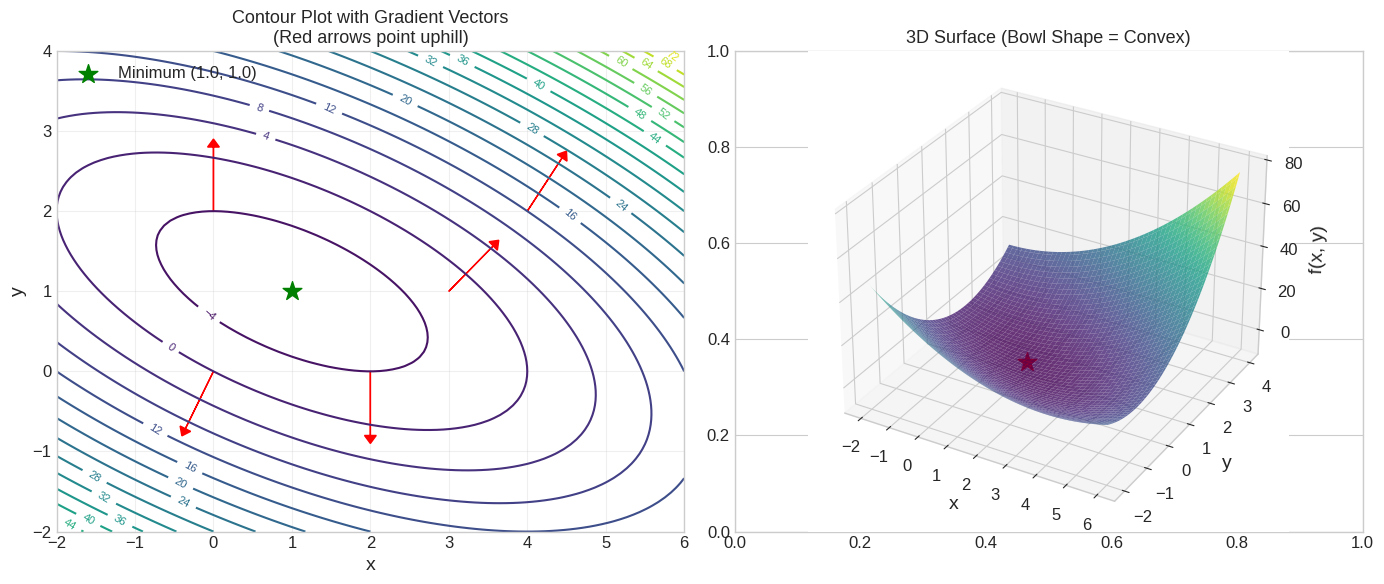


🔑 Key Insight: Gradients point perpendicular to contour lines,
   in the direction of steepest increase. Optimization follows -∇f.


In [10]:
# =============================================================================
# Visualization: Gradient and Contours
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create grid
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Contour plot with gradient vectors
ax1 = axes[0]
contour = ax1.contour(X, Y, Z, levels=20, cmap='viridis')
ax1.clabel(contour, inline=True, fontsize=8)

# Add gradient vectors at several points
points = [(0, 0), (2, 0), (4, 2), (0, 2), (3, 1)]
for px, py in points:
    g = grad_f(px, py)
    # Normalize for visualization
    g_norm = g / np.linalg.norm(g) * 0.8 if np.linalg.norm(g) > 0.1 else g
    ax1.arrow(px, py, g_norm[0], g_norm[1], head_width=0.15, head_length=0.1, 
              fc='red', ec='red')

ax1.scatter(*critical_point, color='green', s=200, marker='*', zorder=5, 
            label=f'Minimum ({critical_point[0]:.1f}, {critical_point[1]:.1f})')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Contour Plot with Gradient Vectors\n(Red arrows point uphill)', fontsize=13)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 3D surface
ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax2.scatter(*critical_point, f(*critical_point), color='red', s=200, marker='*')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')
ax2.set_title('3D Surface (Bowl Shape = Convex)', fontsize=13)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/gradient_contour.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n🔑 Key Insight: Gradients point perpendicular to contour lines,")
print("   in the direction of steepest increase. Optimization follows -∇f.")

## 2.6 Taylor Series Approximation

Taylor series are essential for understanding how optimization algorithms work.

### First-Order Approximation (Linear)

$$f(x + \Delta x) \approx f(x) + \nabla f(x)^T \Delta x$$

This is a plane tangent to the function at $x$.

### Second-Order Approximation (Quadratic)

$$f(x + \Delta x) \approx f(x) + \nabla f(x)^T \Delta x + \frac{1}{2} \Delta x^T \nabla^2 f(x) \Delta x$$

This is a quadratic (paraboloid) approximation, which:

- Captures curvature information
- Is exact for quadratic functions
- Forms the basis for Newton's method

### Why This Matters for Optimization

1. **Gradient descent**: Uses first-order approximation to find descent direction
2. **Newton's method**: Uses second-order approximation for faster convergence
3. **Trust region methods**: Minimize quadratic approximation in a region


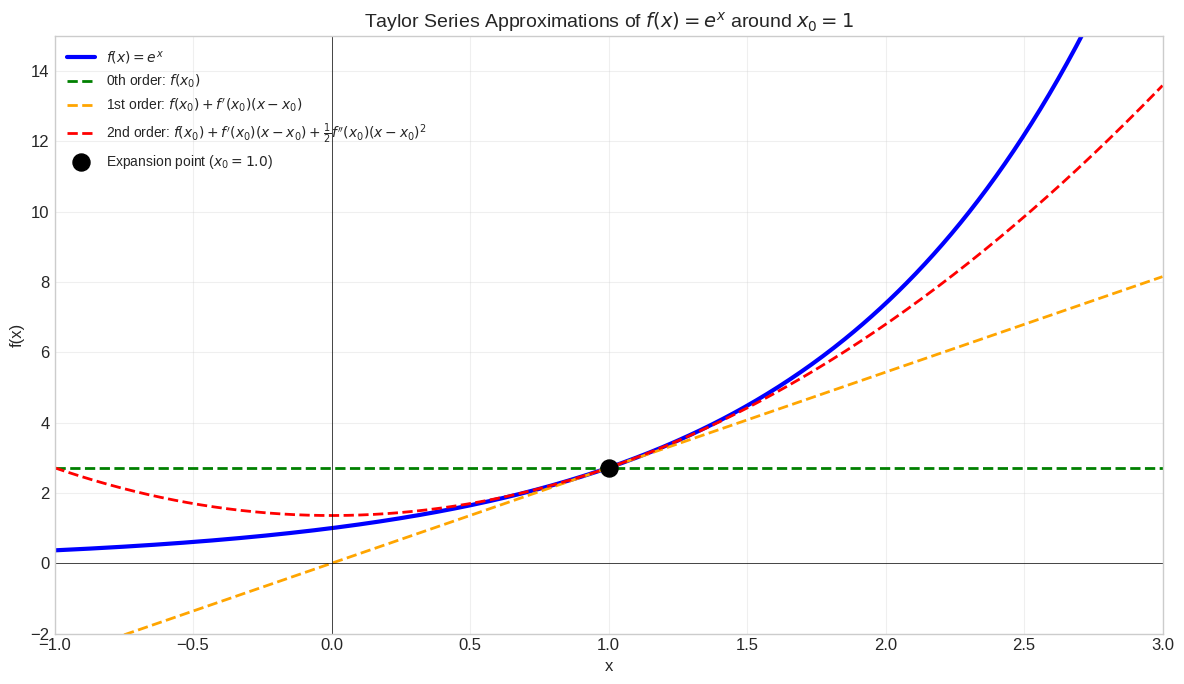

🔑 Key Insight: Higher-order approximations are more accurate near the expansion point.


In [11]:
# =============================================================================
# Visualization: Taylor Approximations
# =============================================================================

# Function: f(x) = e^x
f_exp = lambda x: np.exp(x)

# Expansion point
x0 = 1.0
f0 = f_exp(x0)
df0 = f_exp(x0)      # f'(x) = e^x
d2f0 = f_exp(x0)     # f''(x) = e^x

# Taylor approximations
x = np.linspace(-1, 3, 500)
taylor_0 = f0 * np.ones_like(x)  # Zeroth order
taylor_1 = f0 + df0 * (x - x0)    # First order
taylor_2 = f0 + df0 * (x - x0) + 0.5 * d2f0 * (x - x0)**2  # Second order

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(x, f_exp(x), 'b-', linewidth=3, label='$f(x) = e^x$')
ax.plot(x, taylor_0, 'g--', linewidth=2, label='0th order: $f(x_0)$')
ax.plot(x, taylor_1, 'orange', linewidth=2, linestyle='--', 
        label="1st order: $f(x_0) + f'(x_0)(x-x_0)$")
ax.plot(x, taylor_2, 'r--', linewidth=2, 
        label="2nd order: $f(x_0) + f'(x_0)(x-x_0) + \\frac{1}{2}f''(x_0)(x-x_0)^2$")

ax.scatter([x0], [f0], color='black', s=150, zorder=5, label=f'Expansion point ($x_0={x0}$)')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('Taylor Series Approximations of $f(x) = e^x$ around $x_0 = 1$', fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.set_xlim(-1, 3)
ax.set_ylim(-2, 15)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/taylor_approx.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 Key Insight: Higher-order approximations are more accurate near the expansion point.")

## 2.7 Exercises - Chapter 2

### Exercise 2.1 (Easy): Vector Operations

Given $x = (1, 2, 3)^T$ and $y = (4, 5, 6)^T$, compute:

1. $x + y$
2. $x^T y$
3. $\|x\|_2$
4. $\|x\|_1$
5. The angle between $x$ and $y$

### Exercise 2.2 (Medium): Matrix Properties

For the matrix $A = \begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix}$:

1. Compute the eigenvalues and eigenvectors
2. Is $A$ positive definite? Prove it.
3. Find the Cholesky decomposition $A = LL^T$

### Exercise 2.3 (Medium): Gradient and Hessian

For $f(x, y) = x^3 + 3x^2y - 2y^2$:

1. Compute the gradient $\nabla f$
2. Compute the Hessian $\nabla^2 f$
3. Find all critical points
4. Classify each critical point (min, max, saddle)

### Exercise 2.4 (Challenging): Quadratic Functions

For the quadratic function $f(x) = \frac{1}{2}x^T Qx - c^T x + d$ where $Q$ is symmetric positive definite:

1. Derive the gradient $\nabla f(x)$
2. Derive the Hessian $\nabla^2 f(x)$
3. Find the unique minimizer $x^*$ (solve $\nabla f = 0$)
4. Verify that this is indeed a minimum

---

## 2.8 Chapter 2 Summary

### Key Concepts

| Concept                   | Definition                                     | Importance for Optimization         |
| ------------------------- | ---------------------------------------------- | ----------------------------------- |
| **Gradient**              | $\nabla f(x)$ - vector of first derivatives    | Points direction of steepest ascent |
| **Hessian**               | $\nabla^2 f(x)$ - matrix of second derivatives | Determines convexity                |
| **Positive Definite**     | $x^TAx > 0$ for all $x \neq 0$                 | Ensures strict convexity            |
| **Positive Semidefinite** | $x^TAx \geq 0$ for all $x$                     | Ensures convexity                   |
| **Eigenvalues**           | $Av = \lambda v$                               | Sign determines PD/PSD/indefinite   |

### Critical Connections

1. A function is **convex** iff its Hessian is PSD everywhere
2. At an **unconstrained minimum**, the gradient is zero
3. **Second-order conditions** use the Hessian to classify critical points
4. **Taylor expansion** justifies gradient descent and Newton's method

### Looking Ahead

Armed with these mathematical tools, we're ready to formally define and study convex sets (Chapter 3) and convex functions (Chapter 4).


<a id="chapter-3"></a>

# Chapter 3: Convex Sets

---

## 3.1 Introduction: Why Study Convex Sets?

Before we can understand convex functions and convex optimization problems, we need to understand **convex sets**. They form the geometric foundation of convex optimization:

- The **feasible region** of a convex optimization problem is a convex set
- The **domain** of a convex function should be a convex set
- **Constraints** define convex sets that restrict our solutions

Understanding convex sets gives us geometric intuition about optimization.

---

## 3.2 Definition of Convex Sets

### Intuitive Definition

A set is **convex** if, for any two points in the set, the entire line segment connecting them is also in the set.

Think of it this way:

- Pick any two points in the set
- Draw a straight line between them
- If every point on that line is inside the set, it might be convex
- If this works for ALL pairs of points, the set is convex

### Formal Definition

A set $C \subseteq \mathbb{R}^n$ is **convex** if for all $x, y \in C$ and all $\theta \in [0, 1]$:

$$\theta x + (1-\theta)y \in C$$

The expression $\theta x + (1-\theta)y$ represents all points on the line segment from $y$ (when $\theta = 0$) to $x$ (when $\theta = 1$).

### Visual Understanding

Imagine you have a rubber band and you place two pins inside a shape:

- If the rubber band (straight line) always stays inside the shape, it's convex
- If the rubber band ever goes outside, it's non-convex


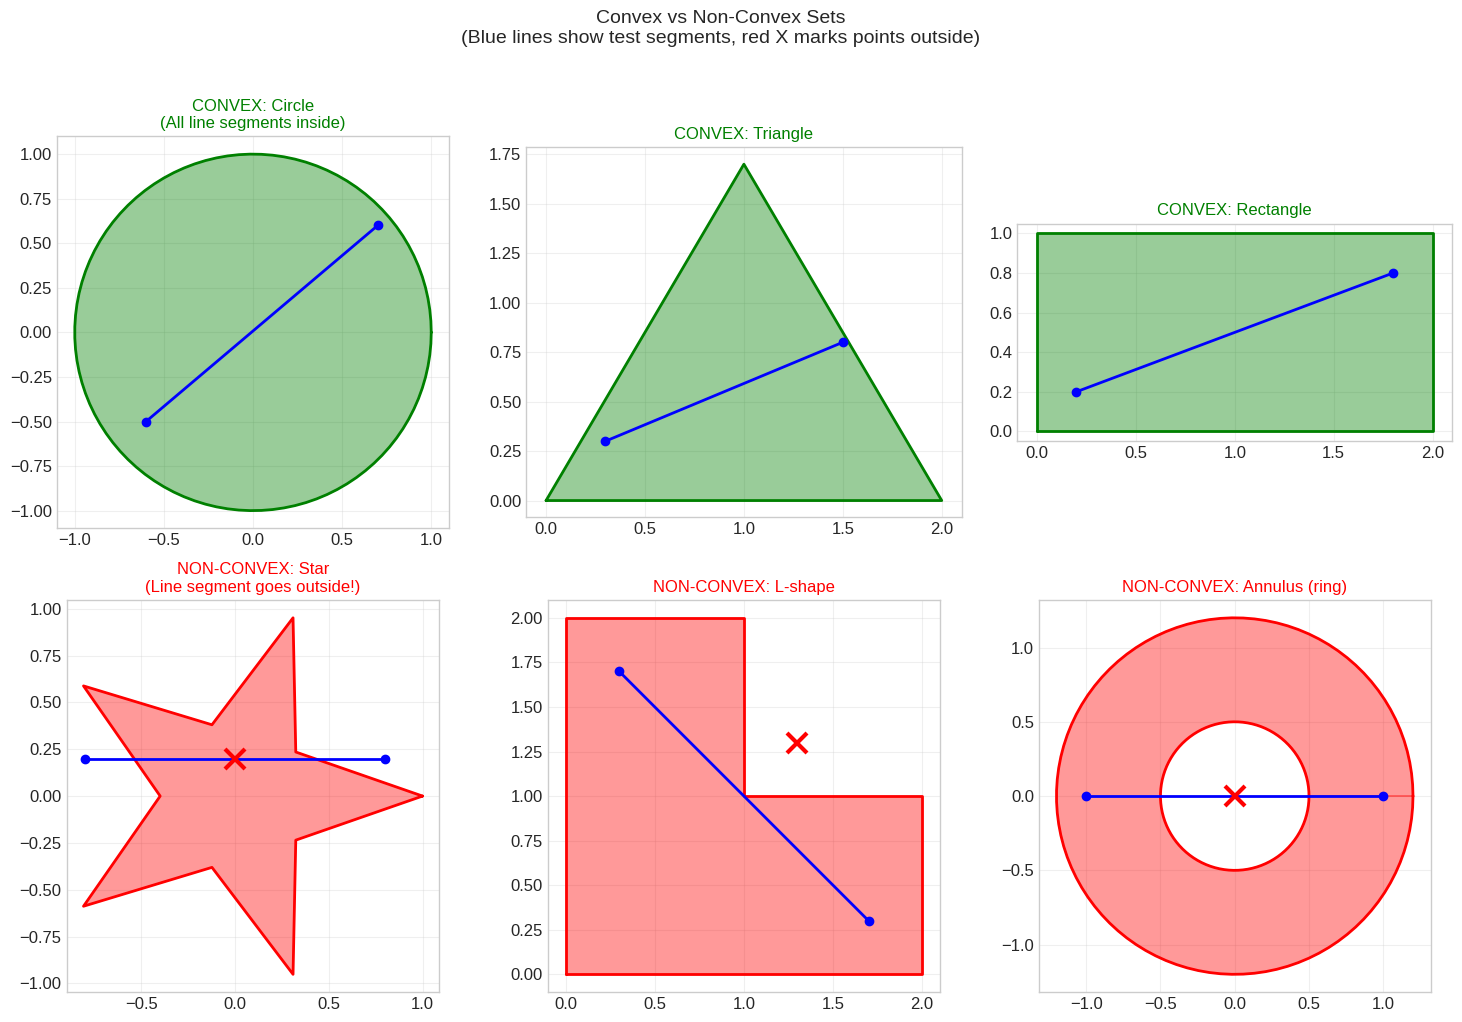

✓ Green sets: Every line segment between two points stays inside
✗ Red sets: Some line segments cross outside the boundary


In [12]:
# =============================================================================
# Visualization: Convex vs Non-Convex Sets
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Convex Sets
# Circle
theta = np.linspace(0, 2*np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
axes[0, 0].fill(circle_x, circle_y, alpha=0.4, color='green')
axes[0, 0].plot(circle_x, circle_y, 'g-', linewidth=2)
# Show line segment inside
axes[0, 0].plot([-0.6, 0.7], [-0.5, 0.6], 'b-', linewidth=2, marker='o')
axes[0, 0].set_title('CONVEX: Circle\n(All line segments inside)', fontsize=12, color='green')
axes[0, 0].set_aspect('equal')
axes[0, 0].grid(True, alpha=0.3)

# Triangle
triangle_x = [0, 2, 1, 0]
triangle_y = [0, 0, 1.7, 0]
axes[0, 1].fill(triangle_x, triangle_y, alpha=0.4, color='green')
axes[0, 1].plot(triangle_x, triangle_y, 'g-', linewidth=2)
axes[0, 1].plot([0.3, 1.5], [0.3, 0.8], 'b-', linewidth=2, marker='o')
axes[0, 1].set_title('CONVEX: Triangle', fontsize=12, color='green')
axes[0, 1].set_aspect('equal')
axes[0, 1].grid(True, alpha=0.3)

# Rectangle
rect_x = [0, 2, 2, 0, 0]
rect_y = [0, 0, 1, 1, 0]
axes[0, 2].fill(rect_x, rect_y, alpha=0.4, color='green')
axes[0, 2].plot(rect_x, rect_y, 'g-', linewidth=2)
axes[0, 2].plot([0.2, 1.8], [0.2, 0.8], 'b-', linewidth=2, marker='o')
axes[0, 2].set_title('CONVEX: Rectangle', fontsize=12, color='green')
axes[0, 2].set_aspect('equal')
axes[0, 2].grid(True, alpha=0.3)

# Row 2: Non-Convex Sets
# Star shape
star_theta = np.linspace(0, 2*np.pi, 11)
r_outer = 1.0
r_inner = 0.4
star_x = []
star_y = []
for i, t in enumerate(star_theta[:-1]):
    r = r_outer if i % 2 == 0 else r_inner
    star_x.append(r * np.cos(t))
    star_y.append(r * np.sin(t))
star_x.append(star_x[0])
star_y.append(star_y[0])

axes[1, 0].fill(star_x, star_y, alpha=0.4, color='red')
axes[1, 0].plot(star_x, star_y, 'r-', linewidth=2)
# Show line segment that goes outside
axes[1, 0].plot([-0.8, 0.8], [0.2, 0.2], 'b-', linewidth=2, marker='o')
axes[1, 0].plot([0], [0.2], 'rx', markersize=15, markeredgewidth=3)  # Point outside
axes[1, 0].set_title('NON-CONVEX: Star\n(Line segment goes outside!)', fontsize=12, color='red')
axes[1, 0].set_aspect('equal')
axes[1, 0].grid(True, alpha=0.3)

# L-shape
l_x = [0, 2, 2, 1, 1, 0, 0]
l_y = [0, 0, 1, 1, 2, 2, 0]
axes[1, 1].fill(l_x, l_y, alpha=0.4, color='red')
axes[1, 1].plot(l_x, l_y, 'r-', linewidth=2)
axes[1, 1].plot([0.3, 1.7], [1.7, 0.3], 'b-', linewidth=2, marker='o')
axes[1, 1].plot([1.3], [1.3], 'rx', markersize=15, markeredgewidth=3)
axes[1, 1].set_title('NON-CONVEX: L-shape', fontsize=12, color='red')
axes[1, 1].set_aspect('equal')
axes[1, 1].grid(True, alpha=0.3)

# Annulus (ring)
outer_theta = np.linspace(0, 2*np.pi, 100)
inner_theta = np.linspace(2*np.pi, 0, 100)
ring_x = np.concatenate([1.2*np.cos(outer_theta), 0.5*np.cos(inner_theta)])
ring_y = np.concatenate([1.2*np.sin(outer_theta), 0.5*np.sin(inner_theta)])
axes[1, 2].fill(ring_x, ring_y, alpha=0.4, color='red')
axes[1, 2].plot(1.2*np.cos(theta), 1.2*np.sin(theta), 'r-', linewidth=2)
axes[1, 2].plot(0.5*np.cos(theta), 0.5*np.sin(theta), 'r-', linewidth=2)
axes[1, 2].plot([-1, 1], [0, 0], 'b-', linewidth=2, marker='o')
axes[1, 2].plot([0], [0], 'rx', markersize=15, markeredgewidth=3)
axes[1, 2].set_title('NON-CONVEX: Annulus (ring)', fontsize=12, color='red')
axes[1, 2].set_aspect('equal')
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle('Convex vs Non-Convex Sets\n(Blue lines show test segments, red X marks points outside)', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/convex_sets.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("✓ Green sets: Every line segment between two points stays inside")
print("✗ Red sets: Some line segments cross outside the boundary")

## 3.3 Examples of Convex Sets

### 3.3.1 Basic Convex Sets

#### 1. The Empty Set and Singleton

- The empty set $\emptyset$ is trivially convex
- Any single point $\{x_0\}$ is convex

#### 2. Lines and Line Segments

A **line** through points $x_1$ and $x_2$:
$$\{x_1 + \theta(x_2 - x_1) : \theta \in \mathbb{R}\}$$

A **line segment**:
$$\{x_1 + \theta(x_2 - x_1) : \theta \in [0, 1]\}$$

#### 3. Hyperplanes

A **hyperplane** is the set:
$$\{x : a^T x = b\}$$

where $a \neq 0$ is the normal vector and $b$ is a scalar.

In 2D, this is a line. In 3D, this is a plane.

#### 4. Halfspaces

A **halfspace** is the set:
$$\{x : a^T x \leq b\}$$

This is one side of a hyperplane. Halfspaces are convex.

#### 5. Balls

The **Euclidean ball** centered at $x_c$ with radius $r$:
$$B(x_c, r) = \{x : \|x - x_c\|_2 \leq r\}$$

#### 6. Ellipsoids

An **ellipsoid** is:
$$\mathcal{E} = \{x : (x - x_c)^T P^{-1}(x - x_c) \leq 1\}$$

where $P \succ 0$ (positive definite). The eigenvectors of $P$ determine the axes.

#### 7. Polyhedra

A **polyhedron** is the intersection of finitely many halfspaces:
$$\mathcal{P} = \{x : Ax \leq b, Cx = d\}$$

Important: Polyhedra include polygons, polytopes, simplices, and more.


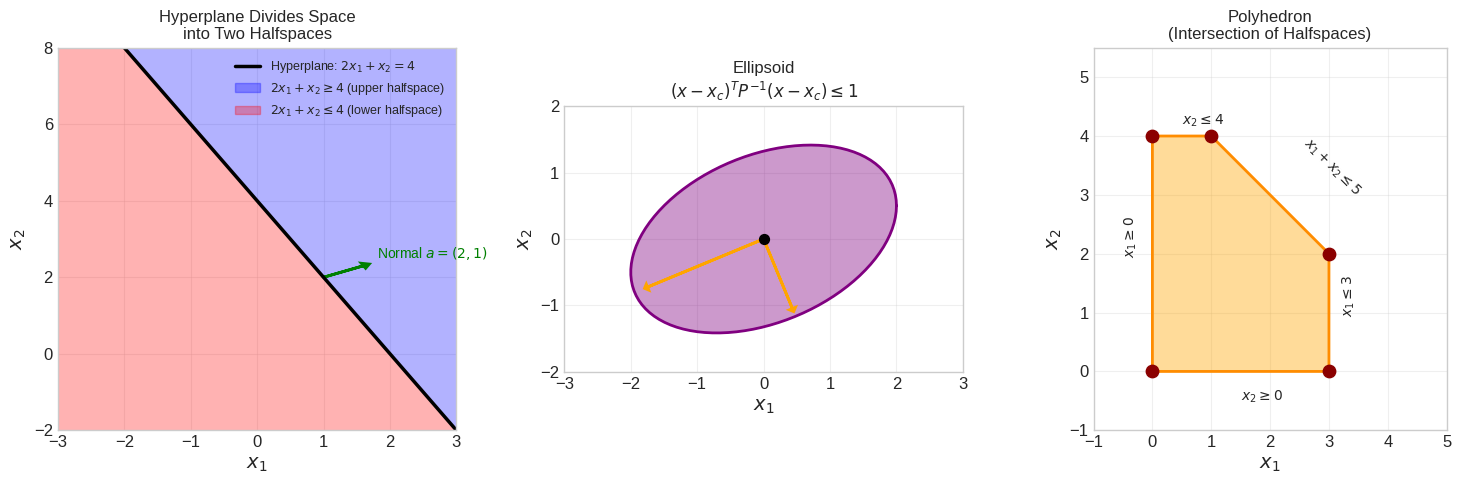

🔑 These are all CONVEX sets - fundamental building blocks for optimization constraints!


In [13]:
# =============================================================================
# Visualization: Hyperplanes, Halfspaces, and Polyhedra
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Hyperplane and Halfspaces
ax1 = axes[0]
x = np.linspace(-3, 3, 100)
# Hyperplane: 2x + y = 4 => y = 4 - 2x
y_hyperplane = 4 - 2*x

ax1.plot(x, y_hyperplane, 'k-', linewidth=2.5, label='Hyperplane: $2x_1 + x_2 = 4$')

# Fill halfspaces
ax1.fill_between(x, y_hyperplane, 10, alpha=0.3, color='blue', 
                  label='$2x_1 + x_2 \\geq 4$ (upper halfspace)')
ax1.fill_between(x, y_hyperplane, -5, alpha=0.3, color='red', 
                  label='$2x_1 + x_2 \\leq 4$ (lower halfspace)')

# Normal vector
ax1.arrow(1, 2, 0.6, 0.3, head_width=0.15, head_length=0.1, fc='green', ec='green', linewidth=2)
ax1.annotate('Normal $a = (2, 1)$', (1.8, 2.5), fontsize=10, color='green')

ax1.set_xlim(-3, 3)
ax1.set_ylim(-2, 8)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('Hyperplane Divides Space\ninto Two Halfspaces', fontsize=12)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Ellipsoid
ax2 = axes[1]
theta = np.linspace(0, 2*np.pi, 100)

# Ellipsoid with P = [[4, 1], [1, 2]]
P = np.array([[4, 1], [1, 2]])
L = np.linalg.cholesky(P)

# Unit circle transformed by L
unit_circle = np.vstack([np.cos(theta), np.sin(theta)])
ellipse = L @ unit_circle

ax2.fill(ellipse[0], ellipse[1], alpha=0.4, color='purple')
ax2.plot(ellipse[0], ellipse[1], 'purple', linewidth=2)
ax2.scatter([0], [0], color='black', s=50, zorder=5)

# Show eigenvector directions (principal axes)
eigenvalues, eigenvectors = np.linalg.eigh(P)
for i in range(2):
    v = eigenvectors[:, i] * np.sqrt(eigenvalues[i])
    ax2.arrow(0, 0, v[0]*0.9, v[1]*0.9, head_width=0.1, head_length=0.05, 
              fc='orange', ec='orange', linewidth=2)

ax2.set_xlim(-3, 3)
ax2.set_ylim(-2, 2)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Ellipsoid\n$(x-x_c)^T P^{-1}(x-x_c) \\leq 1$', fontsize=12)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

# 3. Polyhedron (polygon in 2D)
ax3 = axes[2]

# Define a polyhedron via inequalities
# x1 + x2 <= 5
# x1 >= 0
# x2 >= 0  
# x1 <= 3
# x2 <= 4

# Vertices of the polyhedron
vertices = np.array([[0, 0], [3, 0], [3, 2], [1, 4], [0, 4]])
from matplotlib.patches import Polygon
poly = Polygon(vertices, alpha=0.4, color='orange')
ax3.add_patch(poly)
ax3.plot(np.append(vertices[:, 0], vertices[0, 0]), 
         np.append(vertices[:, 1], vertices[0, 1]), 'darkorange', linewidth=2)

# Label constraints
ax3.annotate('$x_1 + x_2 \\leq 5$', (2.5, 3), fontsize=10, rotation=-45)
ax3.annotate('$x_1 \\leq 3$', (3.2, 1), fontsize=10, rotation=90)
ax3.annotate('$x_2 \\leq 4$', (0.5, 4.2), fontsize=10)
ax3.annotate('$x_1 \\geq 0$', (-0.5, 2), fontsize=10, rotation=90)
ax3.annotate('$x_2 \\geq 0$', (1.5, -0.5), fontsize=10)

# Mark vertices
for v in vertices:
    ax3.scatter(*v, color='darkred', s=80, zorder=5)

ax3.set_xlim(-1, 5)
ax3.set_ylim(-1, 5.5)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_title('Polyhedron\n(Intersection of Halfspaces)', fontsize=12)
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/convex_set_examples.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 These are all CONVEX sets - fundamental building blocks for optimization constraints!")

## 3.4 Operations That Preserve Convexity

One of the most useful aspects of convex sets is that many operations preserve convexity. This allows us to build complex convex sets from simpler ones.

### 3.4.1 Intersection

**Theorem**: The intersection of any collection of convex sets is convex.

$$C = \bigcap_{i \in I} C_i \text{ is convex if each } C_i \text{ is convex}$$

**Intuition**: If two points are in $C$, they're in every $C_i$. The line segment is in every $C_i$ (since each is convex), hence in $C$.

**Example**: A polyhedron is the intersection of halfspaces (all convex), hence convex.

### 3.4.2 Affine Transformation

**Theorem**: If $C$ is convex and $f(x) = Ax + b$ is an affine function, then:

- The **image** $f(C) = \{Ax + b : x \in C\}$ is convex
- The **preimage** $f^{-1}(C) = \{x : Ax + b \in C\}$ is convex

**Examples**:

- Scaling: $\alpha C = \{\alpha x : x \in C\}$
- Translation: $C + a = \{x + a : x \in C\}$
- Projection: Projecting a convex set onto a subspace

### 3.4.3 Minkowski Sum

**Theorem**: If $C_1$ and $C_2$ are convex, then:
$$C_1 + C_2 = \{x_1 + x_2 : x_1 \in C_1, x_2 \in C_2\}$$
is convex.

### 3.4.4 Perspective and Linear-Fractional Functions

These preserve convexity too (useful in advanced applications).

### Summary of Preserving Operations

| Operation             | Result                 |
| --------------------- | ---------------------- |
| Intersection          | Always convex          |
| Union                 | NOT necessarily convex |
| Affine image/preimage | Convex                 |
| Minkowski sum         | Convex                 |
| Scaling               | Convex                 |
| Translation           | Convex                 |


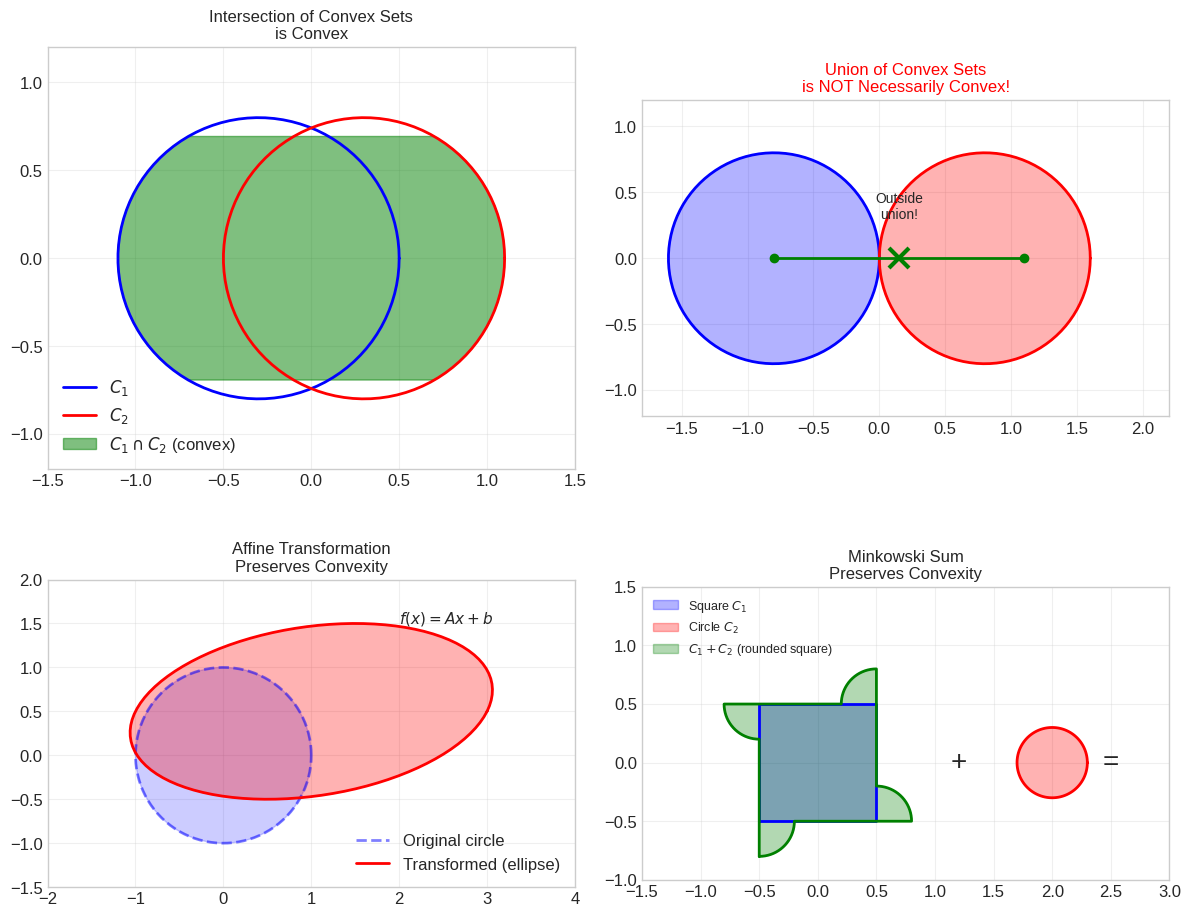

⚠️ Important: Union does NOT preserve convexity!
   Intersection, affine maps, and Minkowski sum DO preserve convexity.


In [14]:
# =============================================================================
# Visualization: Operations Preserving Convexity
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Intersection of convex sets
ax1 = axes[0, 0]
theta = np.linspace(0, 2*np.pi, 100)

# Two circles
circle1_x = 0.8 * np.cos(theta) - 0.3
circle1_y = 0.8 * np.sin(theta)
circle2_x = 0.8 * np.cos(theta) + 0.3
circle2_y = 0.8 * np.sin(theta)

ax1.plot(circle1_x, circle1_y, 'b-', linewidth=2, label='$C_1$')
ax1.plot(circle2_x, circle2_y, 'r-', linewidth=2, label='$C_2$')

# Approximate intersection (lens shape)
# Find intersection points and fill
from matplotlib.patches import Wedge, Arc
circle1 = plt.Circle((-0.3, 0), 0.8, fill=False)
circle2 = plt.Circle((0.3, 0), 0.8, fill=False)

# Create intersection manually
t_int = np.linspace(-np.pi/3, np.pi/3, 50)
int_x1 = 0.8 * np.cos(t_int + np.pi) - 0.3
int_y1 = 0.8 * np.sin(t_int + np.pi)
int_x2 = 0.8 * np.cos(-t_int) + 0.3
int_y2 = 0.8 * np.sin(-t_int)
int_x = np.concatenate([int_x1, int_x2[::-1]])
int_y = np.concatenate([int_y1, int_y2[::-1]])
ax1.fill(int_x, int_y, alpha=0.5, color='green', label='$C_1 \\cap C_2$ (convex)')

ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.2, 1.2)
ax1.set_title('Intersection of Convex Sets\nis Convex', fontsize=12)
ax1.legend()
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# 2. Union (NOT convex)
ax2 = axes[0, 1]
ax2.plot(circle1_x - 0.5, circle1_y, 'b-', linewidth=2)
ax2.fill(circle1_x - 0.5, circle1_y, alpha=0.3, color='blue')
ax2.plot(circle2_x + 0.5, circle2_y, 'r-', linewidth=2)
ax2.fill(circle2_x + 0.5, circle2_y, alpha=0.3, color='red')

# Show line segment that goes outside
ax2.plot([-0.8, 1.1], [0, 0], 'green', linewidth=2, marker='o')
ax2.plot([0.15], [0], 'gx', markersize=15, markeredgewidth=3)

ax2.set_xlim(-1.8, 2.2)
ax2.set_ylim(-1.2, 1.2)
ax2.set_title('Union of Convex Sets\nis NOT Necessarily Convex!', fontsize=12, color='red')
ax2.annotate('Outside\nunion!', (0.15, 0.3), fontsize=10, ha='center')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

# 3. Affine transformation
ax3 = axes[1, 0]
# Original circle
circle_orig = np.vstack([np.cos(theta), np.sin(theta)])
ax3.plot(circle_orig[0], circle_orig[1], 'b--', linewidth=2, alpha=0.5, label='Original circle')
ax3.fill(circle_orig[0], circle_orig[1], alpha=0.2, color='blue')

# Affine transformation: A = [[2, 0.5], [0, 1]], b = [1, 0.5]
A = np.array([[2, 0.5], [0, 1]])
b = np.array([[1], [0.5]])
transformed = A @ circle_orig + b
ax3.plot(transformed[0], transformed[1], 'r-', linewidth=2, label='Transformed (ellipse)')
ax3.fill(transformed[0], transformed[1], alpha=0.3, color='red')

ax3.set_xlim(-2, 4)
ax3.set_ylim(-1.5, 2)
ax3.set_title('Affine Transformation\nPreserves Convexity', fontsize=12)
ax3.legend()
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)
ax3.annotate('$f(x) = Ax + b$', (2, 1.5), fontsize=11)

# 4. Minkowski Sum
ax4 = axes[1, 1]

# Square
square_x = np.array([0, 1, 1, 0, 0]) - 0.5
square_y = np.array([0, 0, 1, 1, 0]) - 0.5

# Small circle
small_circle_x = 0.3 * np.cos(theta)
small_circle_y = 0.3 * np.sin(theta)

ax4.fill(square_x, square_y, alpha=0.3, color='blue', label='Square $C_1$')
ax4.plot(square_x, square_y, 'b-', linewidth=2)

# Show the small circle (offset for visibility)
ax4.fill(small_circle_x + 2, small_circle_y, alpha=0.3, color='red', label='Circle $C_2$')
ax4.plot(small_circle_x + 2, small_circle_y, 'r-', linewidth=2)

# Minkowski sum: rounded rectangle
# Approximate with the actual rounded square
r = 0.3
# Corners with rounded arcs
corners = [(-0.5, -0.5), (0.5, -0.5), (0.5, 0.5), (-0.5, 0.5)]
sum_x, sum_y = [], []
for i, (cx, cy) in enumerate(corners):
    start_angle = -np.pi/2 + i * np.pi/2
    arc_theta = np.linspace(start_angle, start_angle + np.pi/2, 20)
    sum_x.extend(cx + r * np.cos(arc_theta))
    sum_y.extend(cy + r * np.sin(arc_theta))
sum_x.append(sum_x[0])
sum_y.append(sum_y[0])

ax4.fill(sum_x, sum_y, alpha=0.3, color='green', label='$C_1 + C_2$ (rounded square)')
ax4.plot(sum_x, sum_y, 'g-', linewidth=2)

ax4.set_xlim(-1.5, 3)
ax4.set_ylim(-1, 1.5)
ax4.set_title('Minkowski Sum\nPreserves Convexity', fontsize=12)
ax4.legend(loc='upper left', fontsize=9)
ax4.annotate('+', (1.2, 0), fontsize=20, ha='center', va='center')
ax4.annotate('=', (2.5, 0), fontsize=20, ha='center', va='center', transform=ax4.transData)
ax4.set_aspect('equal')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/convexity_operations.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("⚠️ Important: Union does NOT preserve convexity!")
print("   Intersection, affine maps, and Minkowski sum DO preserve convexity.")

## 3.5 Convex Hull and Convex Combinations

### 3.5.1 Convex Combinations

A **convex combination** of points $x_1, x_2, \ldots, x_k$ is:

$$x = \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_k x_k$$

where $\theta_i \geq 0$ and $\sum_{i=1}^k \theta_i = 1$.

**Intuition**: A convex combination is a weighted average where weights are non-negative and sum to 1.

**Key Result**: A set is convex if and only if it contains all convex combinations of its points.

### 3.5.2 Convex Hull

The **convex hull** of a set $S$, denoted $\text{conv}(S)$, is:

- The smallest convex set containing $S$
- The set of all convex combinations of points in $S$

$$\text{conv}(S) = \left\{ \sum_{i=1}^k \theta_i x_i : x_i \in S, \theta_i \geq 0, \sum_i \theta_i = 1 \right\}$$

**Intuition**: Imagine stretching a rubber band around a set of points — the convex hull is what the rubber band encloses.

### 3.5.3 Properties

1. $\text{conv}(S) \supseteq S$
2. $\text{conv}(\text{conv}(S)) = \text{conv}(S)$ (idempotent)
3. $S$ is convex if and only if $S = \text{conv}(S)$
4. In $\mathbb{R}^n$, any point in $\text{conv}(S)$ can be written as a convex combination of at most $n+1$ points in $S$ (**Carathéodory's theorem**)


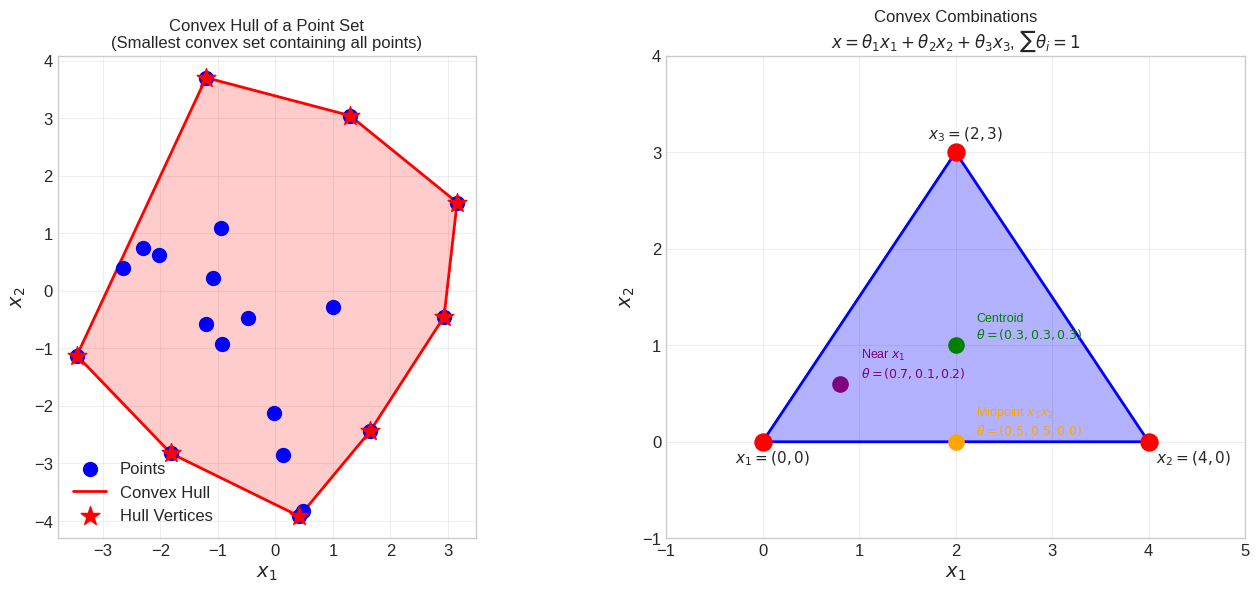

🔑 The convex hull is like a rubber band around the points.
   Every point inside is a convex combination of the vertices.


In [15]:
# =============================================================================
# Visualization: Convex Hull
# =============================================================================

from scipy.spatial import ConvexHull

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Generate random points
np.random.seed(42)
points = np.random.randn(20, 2) * 2

# Compute convex hull
hull = ConvexHull(points)

# Plot 1: Points and Convex Hull
ax1 = axes[0]
ax1.scatter(points[:, 0], points[:, 1], s=100, color='blue', zorder=5, label='Points')

# Plot hull
hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the polygon
ax1.plot(points[hull_points, 0], points[hull_points, 1], 'r-', linewidth=2, label='Convex Hull')
ax1.fill(points[hull.vertices, 0], points[hull.vertices, 1], alpha=0.2, color='red')

# Highlight hull vertices
ax1.scatter(points[hull.vertices, 0], points[hull.vertices, 1], s=200, color='red', 
            marker='*', zorder=10, label='Hull Vertices')

ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('Convex Hull of a Point Set\n(Smallest convex set containing all points)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: Convex Combinations
ax2 = axes[1]
# Three points forming a triangle
p1 = np.array([0, 0])
p2 = np.array([4, 0])
p3 = np.array([2, 3])

triangle = np.array([p1, p2, p3, p1])
ax2.fill(triangle[:, 0], triangle[:, 1], alpha=0.3, color='blue')
ax2.plot(triangle[:, 0], triangle[:, 1], 'b-', linewidth=2)

# Label vertices
ax2.scatter(*p1, s=150, color='red', zorder=5)
ax2.scatter(*p2, s=150, color='red', zorder=5)
ax2.scatter(*p3, s=150, color='red', zorder=5)
ax2.annotate('$x_1 = (0, 0)$', p1, textcoords="offset points", xytext=(-20, -15), fontsize=11)
ax2.annotate('$x_2 = (4, 0)$', p2, textcoords="offset points", xytext=(5, -15), fontsize=11)
ax2.annotate('$x_3 = (2, 3)$', p3, textcoords="offset points", xytext=(-20, 10), fontsize=11)

# Show some convex combinations
combinations = [
    (1/3, 1/3, 1/3, 'Centroid'),
    (0.5, 0.5, 0, 'Midpoint $x_1x_2$'),
    (0.7, 0.1, 0.2, 'Near $x_1$'),
]

colors = ['green', 'orange', 'purple']
for (t1, t2, t3, label), color in zip(combinations, colors):
    point = t1 * p1 + t2 * p2 + t3 * p3
    ax2.scatter(*point, s=120, color=color, zorder=5)
    ax2.annotate(f'{label}\n$\\theta = ({t1:.1f}, {t2:.1f}, {t3:.1f})$', 
                 point, textcoords="offset points", xytext=(15, 5), fontsize=9, color=color)

ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Convex Combinations\n$x = \\theta_1 x_1 + \\theta_2 x_2 + \\theta_3 x_3$, $\\sum \\theta_i = 1$', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
ax2.set_xlim(-1, 5)
ax2.set_ylim(-1, 4)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/convex_hull.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 The convex hull is like a rubber band around the points.")
print("   Every point inside is a convex combination of the vertices.")

## 3.6 Cones and Convex Cones

### 3.6.1 Cones

A set $C$ is a **cone** if for every $x \in C$ and $\theta \geq 0$, we have $\theta x \in C$.

In other words, if a point is in the cone, so are all positive scalings of it.

### 3.6.2 Convex Cones

A **convex cone** is a cone that is also convex. Equivalently, $C$ is a convex cone if:

$$x_1, x_2 \in C, \quad \theta_1, \theta_2 \geq 0 \implies \theta_1 x_1 + \theta_2 x_2 \in C$$

### 3.6.3 Important Examples

#### 1. Non-negative Orthant

$$\mathbb{R}^n_+ = \{x \in \mathbb{R}^n : x_i \geq 0 \text{ for all } i\}$$

This is the cone of vectors with all non-negative components.

#### 2. Positive Semidefinite Cone

$$\mathbb{S}^n_+ = \{X \in \mathbb{S}^n : X \succeq 0\}$$

The cone of $n \times n$ positive semidefinite matrices. This is crucial for semidefinite programming.

#### 3. Second-Order Cone (Ice Cream Cone)

$$\mathcal{Q}^n = \{(x, t) \in \mathbb{R}^{n+1} : \|x\|_2 \leq t\}$$

This is also called the Lorentz cone or ice cream cone.

### 3.6.4 Why Cones Matter

- Many constraint sets in optimization are cones
- **Conic programming** generalizes linear programming
- The positive semidefinite cone leads to **semidefinite programming**


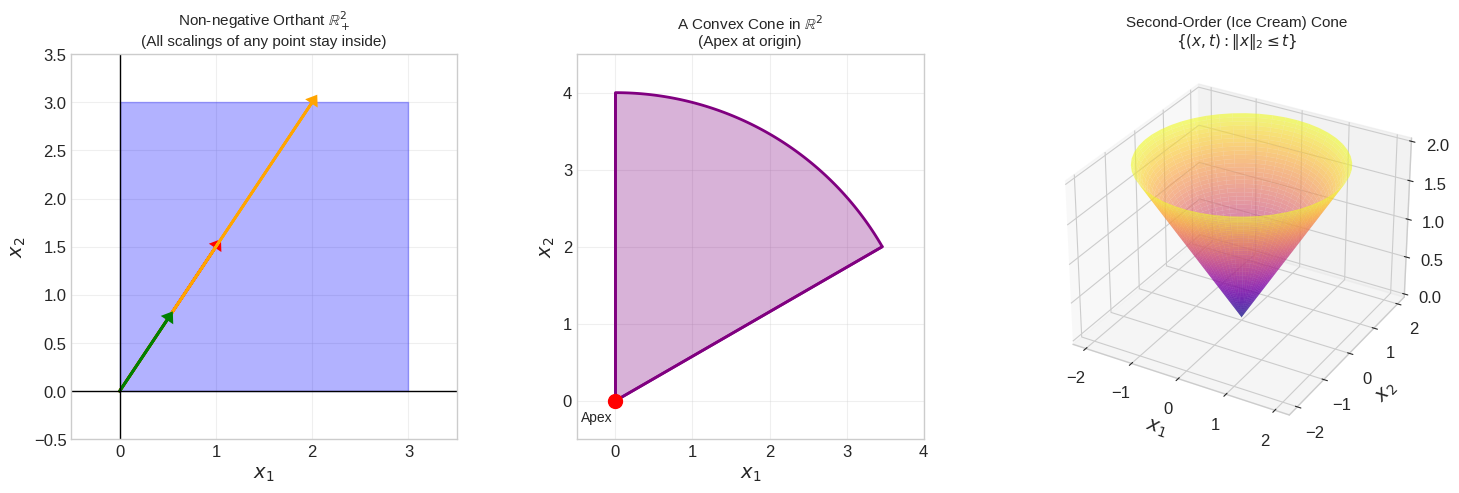

🔑 Convex cones are fundamental in conic optimization.
   Key property: closed under non-negative scaling AND addition.


In [16]:
# =============================================================================
# Visualization: Convex Cones
# =============================================================================

fig = plt.figure(figsize=(15, 5))

# 1. Non-negative orthant in 2D
ax1 = fig.add_subplot(131)
# Just the first quadrant
x = np.linspace(0, 3, 100)
ax1.fill_between(x, 0, 3, alpha=0.3, color='blue')
ax1.axhline(y=0, color='k', linewidth=1)
ax1.axvline(x=0, color='k', linewidth=1)

# Show that scaling preserves membership
point = np.array([1, 1.5])
ax1.arrow(0, 0, point[0], point[1], head_width=0.1, head_length=0.07, fc='red', ec='red', linewidth=2)
ax1.arrow(0, 0, 2*point[0], 2*point[1], head_width=0.1, head_length=0.07, fc='orange', ec='orange', linewidth=2)
ax1.arrow(0, 0, 0.5*point[0], 0.5*point[1], head_width=0.1, head_length=0.07, fc='green', ec='green', linewidth=2)

ax1.set_xlim(-0.5, 3.5)
ax1.set_ylim(-0.5, 3.5)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('Non-negative Orthant $\\mathbb{R}^2_+$\n(All scalings of any point stay inside)', fontsize=11)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# 2. A general 2D convex cone
ax2 = fig.add_subplot(132)
# Cone defined by two edges
theta = np.linspace(np.pi/6, np.pi/2, 100)
r_max = 4
cone_x = np.concatenate([[0], r_max * np.cos(theta), [0]])
cone_y = np.concatenate([[0], r_max * np.sin(theta), [0]])
ax2.fill(cone_x, cone_y, alpha=0.3, color='purple')
ax2.plot(cone_x, cone_y, 'purple', linewidth=2)

# Edges from origin
ax2.plot([0, r_max * np.cos(np.pi/6)], [0, r_max * np.sin(np.pi/6)], 'purple', linewidth=2)
ax2.plot([0, r_max * np.cos(np.pi/2)], [0, r_max * np.sin(np.pi/2)], 'purple', linewidth=2)

ax2.set_xlim(-0.5, 4)
ax2.set_ylim(-0.5, 4.5)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('A Convex Cone in $\\mathbb{R}^2$\n(Apex at origin)', fontsize=11)
ax2.scatter([0], [0], s=100, color='red', zorder=5)
ax2.annotate('Apex', (0, 0), textcoords="offset points", xytext=(-25, -15), fontsize=10)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

# 3. Second-order cone (ice cream cone) in 3D
ax3 = fig.add_subplot(133, projection='3d')

# Create mesh for the cone
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, 2, 50)
U, V = np.meshgrid(u, v)

X = V * np.cos(U)
Y = V * np.sin(U)
Z = V  # t = ||x||

ax3.plot_surface(X, Y, Z, alpha=0.6, cmap='plasma')

ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('$t$')
ax3.set_title('Second-Order (Ice Cream) Cone\n$\\{(x,t): \\|x\\|_2 \\leq t\\}$', fontsize=11)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/convex_cones.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 Convex cones are fundamental in conic optimization.")
print("   Key property: closed under non-negative scaling AND addition.")

## 3.7 Separating and Supporting Hyperplanes

### 3.7.1 Separating Hyperplane Theorem

One of the most important results in convex analysis:

**Theorem (Separating Hyperplane)**: Let $C$ and $D$ be nonempty convex sets that do not intersect ($C \cap D = \emptyset$). Then there exists a hyperplane that separates them:

$$\exists a \neq 0, b : a^T x \leq b \text{ for all } x \in C, \quad a^T x \geq b \text{ for all } x \in D$$

**Intuition**: You can always "slice" between two non-overlapping convex sets with a flat surface.

### 3.7.2 Supporting Hyperplane

A **supporting hyperplane** to a convex set $C$ at a boundary point $x_0$ is a hyperplane that:

1. Contains $x_0$
2. Has $C$ entirely on one side

$$\{x : a^T x = a^T x_0\} \text{ where } a^T x \leq a^T x_0 \text{ for all } x \in C$$

**Theorem (Supporting Hyperplane)**: At every boundary point of a convex set, there exists a supporting hyperplane.

### 3.7.3 Applications in Optimization

1. **Duality**: Separating hyperplanes are key to proving duality results
2. **Optimality conditions**: KKT conditions involve supporting hyperplanes
3. **Cutting plane methods**: Add separating hyperplanes to exclude infeasible points


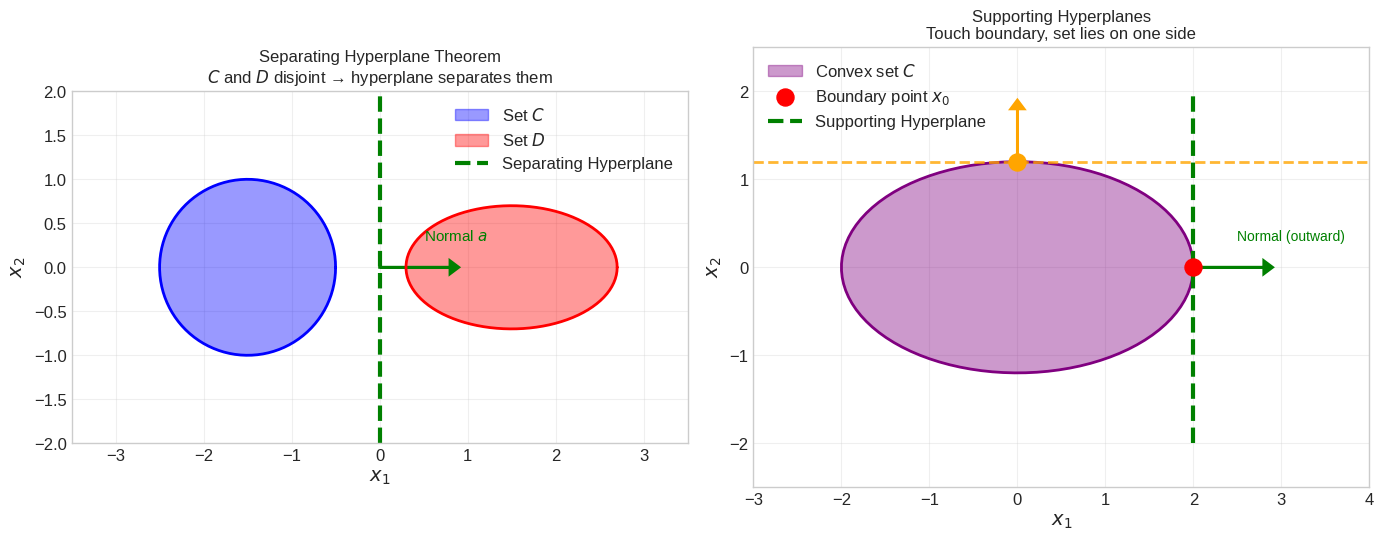

🔑 Separating hyperplanes: Can always separate disjoint convex sets
   Supporting hyperplanes: Exist at every boundary point of a convex set


In [17]:
# =============================================================================
# Visualization: Separating and Supporting Hyperplanes
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Separating Hyperplane
ax1 = axes[0]
theta = np.linspace(0, 2*np.pi, 100)

# Convex set C (circle)
c1_center = np.array([-1.5, 0])
c1_radius = 1.0
c1_x = c1_center[0] + c1_radius * np.cos(theta)
c1_y = c1_center[1] + c1_radius * np.sin(theta)
ax1.fill(c1_x, c1_y, alpha=0.4, color='blue', label='Set $C$')
ax1.plot(c1_x, c1_y, 'b-', linewidth=2)

# Convex set D (ellipse)
c2_center = np.array([1.5, 0])
c2_x = c2_center[0] + 1.2 * np.cos(theta)
c2_y = c2_center[1] + 0.7 * np.sin(theta)
ax1.fill(c2_x, c2_y, alpha=0.4, color='red', label='Set $D$')
ax1.plot(c2_x, c2_y, 'r-', linewidth=2)

# Separating hyperplane (vertical line at x = 0)
ax1.axvline(x=0, color='green', linewidth=3, linestyle='--', label='Separating Hyperplane')

# Normal vector
ax1.arrow(0, 0, 0.8, 0, head_width=0.15, head_length=0.1, fc='green', ec='green', linewidth=2)
ax1.annotate('Normal $a$', (0.5, 0.3), fontsize=11, color='green')

ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-2, 2)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('Separating Hyperplane Theorem\n$C$ and $D$ disjoint → hyperplane separates them', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# 2. Supporting Hyperplane
ax2 = axes[1]

# Convex set (ellipse)
center = np.array([0, 0])
a, b = 2, 1.2
ellipse_x = a * np.cos(theta)
ellipse_y = b * np.sin(theta)
ax2.fill(ellipse_x, ellipse_y, alpha=0.4, color='purple', label='Convex set $C$')
ax2.plot(ellipse_x, ellipse_y, 'purple', linewidth=2)

# Supporting hyperplane at point (a, 0) = (2, 0)
support_point = np.array([a, 0])
ax2.scatter(*support_point, s=150, color='red', zorder=5, label='Boundary point $x_0$')

# The supporting hyperplane at (a, 0) on the ellipse is x = a (vertical line)
y_line = np.linspace(-2, 2, 100)
ax2.plot(np.ones_like(y_line) * a, y_line, 'g--', linewidth=3, label='Supporting Hyperplane')

# Normal vector pointing outward
ax2.arrow(a, 0, 0.8, 0, head_width=0.15, head_length=0.1, fc='green', ec='green', linewidth=2)
ax2.annotate('Normal (outward)', (a + 0.5, 0.3), fontsize=10, color='green')

# Another supporting hyperplane at top
support_point2 = np.array([0, b])
ax2.scatter(*support_point2, s=150, color='orange', zorder=5)
ax2.axhline(y=b, color='orange', linewidth=2, linestyle='--', alpha=0.8)
ax2.arrow(0, b, 0, 0.6, head_width=0.15, head_length=0.1, fc='orange', ec='orange', linewidth=2)

ax2.set_xlim(-3, 4)
ax2.set_ylim(-2.5, 2.5)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Supporting Hyperplanes\nTouch boundary, set lies on one side', fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/hyperplanes.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 Separating hyperplanes: Can always separate disjoint convex sets")
print("   Supporting hyperplanes: Exist at every boundary point of a convex set")

## 3.8 Exercises - Chapter 3

### Exercise 3.1 (Easy): Identifying Convex Sets

Determine whether each set is convex. Justify your answer.

1. $\{(x, y) : x^2 + y^2 \leq 1\}$ (unit disk)
2. $\{(x, y) : x^2 + y^2 = 1\}$ (unit circle)
3. $\{(x, y) : xy \geq 1, x > 0, y > 0\}$
4. $\{(x, y) : |x| + |y| \leq 1\}$
5. $\{x \in \mathbb{R}^n : \|x\|_\infty \leq 1\}$

### Exercise 3.2 (Medium): Intersection

Show that the following set is convex by expressing it as an intersection of convex sets:
$$S = \{x \in \mathbb{R}^2 : x_1 + x_2 \leq 3, x_1 \geq 0, x_2 \geq 0, x_1^2 + x_2^2 \leq 9\}$$

### Exercise 3.3 (Medium): Convex Hull

Given points $A = (0, 0)$, $B = (4, 0)$, $C = (4, 3)$, $D = (0, 3)$:

1. Sketch the convex hull of $\{A, B, C, D\}$
2. Express the point $(2, 1.5)$ as a convex combination of these points
3. Is $(5, 2)$ in the convex hull? Why or why not?

### Exercise 3.4 (Challenging): Positive Semidefinite Cone

Prove that the set of $2 \times 2$ positive semidefinite matrices forms a convex cone.

Hint: Show that if $A \succeq 0$ and $B \succeq 0$, then $\alpha A + \beta B \succeq 0$ for $\alpha, \beta \geq 0$.

### Exercise 3.5 (Challenging): Separating Hyperplane

For the sets:

- $C = \{(x, y) : x^2 + y^2 \leq 1\}$
- $D = \{(x, y) : (x-3)^2 + y^2 \leq 1\}$

Find the equation of a separating hyperplane.

---

## 3.9 Chapter 3 Summary

### Key Concepts

| Concept         | Definition                                       | Importance                          |
| --------------- | ------------------------------------------------ | ----------------------------------- |
| **Convex Set**  | Line segment between any two points stays inside | Feasible regions of convex problems |
| **Convex Hull** | Smallest convex set containing a set             | Converts any set to convex          |
| **Convex Cone** | Closed under positive scaling and addition       | Conic programming                   |
| **Hyperplane**  | $\{x : a^Tx = b\}$                               | Separates, supports convex sets     |
| **Halfspace**   | $\{x : a^Tx \leq b\}$                            | Building block for polyhedra        |

### Operations Preserving Convexity

- ✅ Intersection
- ✅ Affine transformation
- ✅ Minkowski sum
- ❌ Union (not always!)

### Key Theorems

1. **Separating Hyperplane**: Disjoint convex sets can be separated
2. **Supporting Hyperplane**: Exists at every boundary point of a convex set

### Looking Ahead

Now that we understand convex sets (the "where"), we're ready to study convex functions (the "what we optimize") in Chapter 4.


<a id="chapter-4"></a>

# Chapter 4: Convex Functions

---

## 4.1 Introduction

Convex functions are the heart of convex optimization. A convex optimization problem has:

- A **convex objective function** (what we minimize)
- A **convex feasible set** (where we can search)

This chapter thoroughly covers convex functions:

- Definition and intuition
- First and second-order characterizations
- Common examples
- Operations that preserve convexity

---

## 4.2 Definition of Convex Functions

### 4.2.1 Formal Definition

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is **convex** if its domain $\text{dom}(f)$ is a convex set and for all $x, y \in \text{dom}(f)$ and $\theta \in [0, 1]$:

$$f(\theta x + (1-\theta)y) \leq \theta f(x) + (1-\theta) f(y)$$

### 4.2.2 Geometric Interpretation

The definition says: **The function value at any point on a line segment is at most the linear interpolation of the endpoint values.**

Equivalently: **The chord (line segment between two points on the graph) lies above or on the graph.**

### 4.2.3 Strict Convexity

A function is **strictly convex** if the inequality is strict for $x \neq y$ and $\theta \in (0, 1)$:

$$f(\theta x + (1-\theta)y) < \theta f(x) + (1-\theta) f(y)$$

Strict convexity guarantees a **unique** minimum (if it exists).

### 4.2.4 Strong Convexity

A function is **strongly convex** with parameter $m > 0$ if:

$$f(y) \geq f(x) + \nabla f(x)^T(y - x) + \frac{m}{2}\|y - x\|^2$$

Strong convexity is even stronger than strict convexity and ensures fast convergence of optimization algorithms.

### 4.2.5 Concave Functions

A function $f$ is **concave** if $-f$ is convex. All our results for convex functions have analogous results for concave functions.


Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.


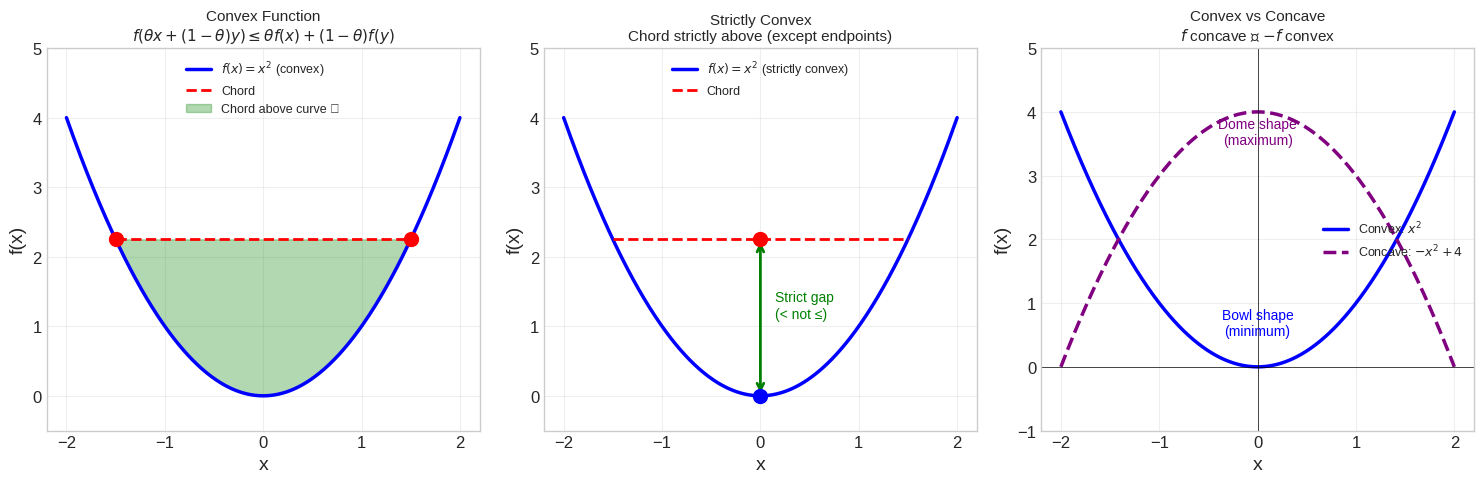

🔑 Convex: chord above graph | Concave: chord below graph


In [18]:
# =============================================================================
# Visualization: Convexity Definitions
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x = np.linspace(-2, 2, 500)

# Points for chord
x1, x2 = -1.5, 1.5

# 1. Convex Function
ax1 = axes[0]
f_convex = x**2
y1, y2 = x1**2, x2**2

ax1.plot(x, f_convex, 'b-', linewidth=2.5, label='$f(x) = x^2$ (convex)')
ax1.plot([x1, x2], [y1, y2], 'r--', linewidth=2, label='Chord')
ax1.scatter([x1, x2], [y1, y2], color='red', s=100, zorder=5)

# Fill region showing convexity
x_fill = np.linspace(x1, x2, 100)
y_chord = y1 + (y2 - y1) * (x_fill - x1) / (x2 - x1)
y_curve = x_fill**2
ax1.fill_between(x_fill, y_curve, y_chord, alpha=0.3, color='green', 
                  label='Chord above curve ✓')

ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Convex Function\n$f(\\theta x + (1-\\theta)y) \\leq \\theta f(x) + (1-\\theta)f(y)$', fontsize=11)
ax1.legend(loc='upper center', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.5, 5)

# 2. Strictly Convex Function
ax2 = axes[1]
f_strict = x**2

ax2.plot(x, f_strict, 'b-', linewidth=2.5, label='$f(x) = x^2$ (strictly convex)')
ax2.plot([x1, x2], [y1, y2], 'r--', linewidth=2, label='Chord')

# Show strict inequality
mid = 0
chord_mid = y1 + (y2 - y1) * (mid - x1) / (x2 - x1)
func_mid = mid**2

ax2.scatter([mid], [chord_mid], color='red', s=100, zorder=5)
ax2.scatter([mid], [func_mid], color='blue', s=100, zorder=5)
ax2.annotate('', xy=(mid, func_mid), xytext=(mid, chord_mid),
             arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax2.annotate('Strict gap\n(< not ≤)', (mid + 0.15, (chord_mid + func_mid)/2), fontsize=10, color='green')

ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Strictly Convex\nChord strictly above (except endpoints)', fontsize=11)
ax2.legend(loc='upper center', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.5, 5)

# 3. Convex vs Concave
ax3 = axes[2]
f_concave = -x**2 + 4

ax3.plot(x, f_convex, 'b-', linewidth=2.5, label='Convex: $x^2$')
ax3.plot(x, f_concave, 'purple', linewidth=2.5, linestyle='--', label='Concave: $-x^2+4$')

ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)

# Indicate shapes
ax3.annotate('Bowl shape\n(minimum)', (0, 0.5), fontsize=10, ha='center', color='blue')
ax3.annotate('Dome shape\n(maximum)', (0, 3.5), fontsize=10, ha='center', color='purple')

ax3.set_xlabel('x')
ax3.set_ylabel('f(x)')
ax3.set_title('Convex vs Concave\n$f$ concave ⟺ $-f$ convex', fontsize=11)
ax3.legend(loc='center right', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(-1, 5)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/convex_function_def.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 Convex: chord above graph | Concave: chord below graph")

## 4.3 First-Order Conditions

For **differentiable** functions, we have equivalent characterizations of convexity.

### 4.3.1 First-Order Condition for Convexity

**Theorem**: A differentiable function $f$ is convex if and only if:

$$f(y) \geq f(x) + \nabla f(x)^T (y - x) \quad \text{for all } x, y \in \text{dom}(f)$$

### 4.3.2 Geometric Interpretation

This says: **The graph of $f$ lies above all its tangent lines (or tangent planes in higher dimensions).**

The right-hand side $f(x) + \nabla f(x)^T(y - x)$ is the first-order Taylor approximation — the tangent line/plane at $x$.

### 4.3.3 Why This Matters

This characterization gives us:

1. **Global lower bounds**: Every tangent gives a lower bound on $f$
2. **Optimality condition**: At a minimum $x^*$, we have $\nabla f(x^*) = 0$
3. **Subgradients**: Extends to non-differentiable convex functions

### 4.3.4 First-Order Condition for Strict Convexity

$f$ is strictly convex if and only if for $x \neq y$:

$$f(y) > f(x) + \nabla f(x)^T (y - x)$$


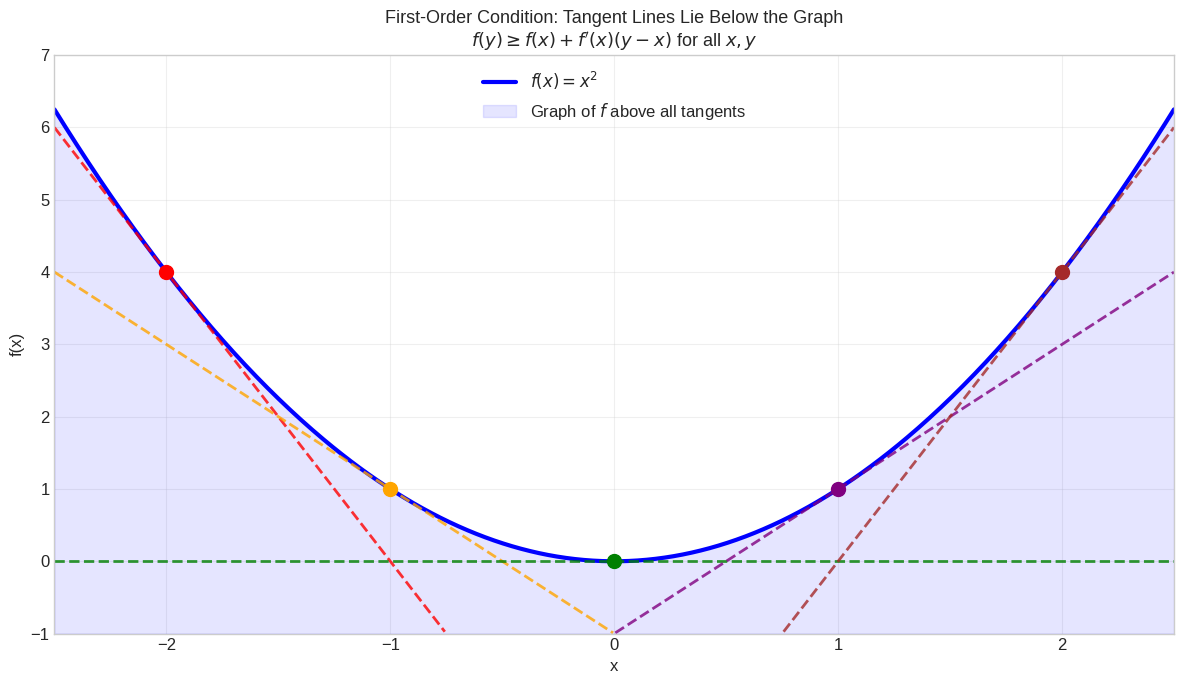

🔑 For convex functions: the graph always lies above its tangent lines.
   This means tangent lines provide LOWER BOUNDS on the function.


In [19]:
# =============================================================================
# Visualization: First-Order Condition (Tangent Lines)
# =============================================================================

fig, ax = plt.subplots(figsize=(12, 7))

x = np.linspace(-2.5, 2.5, 500)
f = x**2  # Convex function

ax.plot(x, f, 'b-', linewidth=3, label='$f(x) = x^2$')

# Draw tangent lines at several points
tangent_points = [-2, -1, 0, 1, 2]
colors = ['red', 'orange', 'green', 'purple', 'brown']

for x0, color in zip(tangent_points, colors):
    # f(x0) = x0^2, f'(x0) = 2*x0
    # Tangent: y = f(x0) + f'(x0)(x - x0) = x0^2 + 2*x0*(x - x0)
    f_x0 = x0**2
    df_x0 = 2 * x0
    tangent = f_x0 + df_x0 * (x - x0)
    
    # Only plot tangent in a reasonable range
    mask = (tangent >= -1) & (tangent <= 7)
    ax.plot(x[mask], tangent[mask], color=color, linewidth=2, linestyle='--', alpha=0.8)
    ax.scatter([x0], [f_x0], color=color, s=100, zorder=5)

ax.fill_between(x, -1, f, alpha=0.1, color='blue', label='Graph of $f$ above all tangents')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('First-Order Condition: Tangent Lines Lie Below the Graph\n' + 
             '$f(y) \\geq f(x) + f\'(x)(y-x)$ for all $x, y$', fontsize=13)
ax.legend(loc='upper center')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-1, 7)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/first_order_condition.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 For convex functions: the graph always lies above its tangent lines.")
print("   This means tangent lines provide LOWER BOUNDS on the function.")

## 4.4 Second-Order Conditions

For **twice-differentiable** functions, the Hessian provides the most practical test for convexity.

### 4.4.1 Second-Order Condition for Convexity

**Theorem**: A twice-differentiable function $f$ is convex if and only if:

$$\nabla^2 f(x) \succeq 0 \quad \text{for all } x \in \text{dom}(f)$$

The Hessian must be **positive semidefinite** everywhere.

### 4.4.2 Second-Order Condition for Strict Convexity

$f$ is strictly convex if $\nabla^2 f(x) \succ 0$ for all $x$.

**Important**: The converse is not quite true. $\nabla^2 f(x) \succ 0$ implies strict convexity, but strict convexity doesn't require strict positive definiteness everywhere.

Counter-example: $f(x) = x^4$ is strictly convex, but $f''(0) = 0$.

### 4.4.3 How to Apply the Test

**For scalar functions** $f: \mathbb{R} \rightarrow \mathbb{R}$:

- $f$ is convex iff $f''(x) \geq 0$ for all $x$

**For multivariate functions** $f: \mathbb{R}^n \rightarrow \mathbb{R}$:

1. Compute the Hessian $\nabla^2 f(x)$
2. Check if it's PSD for all $x$:
   - All eigenvalues $\geq 0$, OR
   - All principal minors $\geq 0$, OR
   - $z^T \nabla^2 f(x) z \geq 0$ for all $z$


In [20]:
# =============================================================================
# Example: Checking Convexity with Hessians
# =============================================================================

print("=" * 60)
print("EXAMPLE: Checking Convexity via Hessian Analysis")
print("=" * 60)

# Example 1: f(x, y) = x^2 + y^2 (sum of squares)
print("\n1. f(x, y) = x² + y²")
print("   Hessian: H = [[2, 0], [0, 2]]")
H1 = np.array([[2, 0], [0, 2]])
eigvals1 = np.linalg.eigvalsh(H1)
print(f"   Eigenvalues: {eigvals1}")
print(f"   All ≥ 0? {all(eigvals1 >= 0)} → CONVEX ✓")
print(f"   All > 0? {all(eigvals1 > 0)} → STRICTLY CONVEX ✓")

# Example 2: f(x, y) = x^2 + 2xy + y^2 = (x + y)^2
print("\n2. f(x, y) = x² + 2xy + y² = (x + y)²")
print("   Hessian: H = [[2, 2], [2, 2]]")
H2 = np.array([[2, 2], [2, 2]])
eigvals2 = np.linalg.eigvalsh(H2)
print(f"   Eigenvalues: {eigvals2}")
print(f"   All ≥ 0? {all(eigvals2 >= 0)} → CONVEX ✓")
print(f"   All > 0? {all(eigvals2 > 0)} → Not strictly convex (has flat direction)")

# Example 3: f(x, y) = x^2 - y^2 (saddle)
print("\n3. f(x, y) = x² - y² (saddle function)")
print("   Hessian: H = [[2, 0], [0, -2]]")
H3 = np.array([[2, 0], [0, -2]])
eigvals3 = np.linalg.eigvalsh(H3)
print(f"   Eigenvalues: {eigvals3}")
print(f"   All ≥ 0? {all(eigvals3 >= 0)} → NOT CONVEX ✗")
print(f"   (Mixed signs → indefinite → saddle)")

# Example 4: f(x, y) = e^x + x^2/2 + 3y^2
print("\n4. f(x, y) = eˣ + x²/2 + 3y²")
print("   Hessian: H = [[eˣ + 1, 0], [0, 6]]")
print("   At any x: H = [[>1, 0], [0, 6]]")
print("   Eigenvalues always > 0 → STRICTLY CONVEX ✓")

# Example 5: log-sum-exp (important in ML)
print("\n5. f(x) = log(e^x₁ + e^x₂ + ... + e^xₙ) [log-sum-exp]")
print("   This is convex! (Hessian is PSD - proof involves Cauchy-Schwarz)")
print("   Used in softmax, logistic regression, and many ML applications.")

EXAMPLE: Checking Convexity via Hessian Analysis

1. f(x, y) = x² + y²
   Hessian: H = [[2, 0], [0, 2]]
   Eigenvalues: [2. 2.]
   All ≥ 0? True → CONVEX ✓
   All > 0? True → STRICTLY CONVEX ✓

2. f(x, y) = x² + 2xy + y² = (x + y)²
   Hessian: H = [[2, 2], [2, 2]]
   Eigenvalues: [0. 4.]
   All ≥ 0? True → CONVEX ✓
   All > 0? False → Not strictly convex (has flat direction)

3. f(x, y) = x² - y² (saddle function)
   Hessian: H = [[2, 0], [0, -2]]
   Eigenvalues: [-2.  2.]
   All ≥ 0? False → NOT CONVEX ✗
   (Mixed signs → indefinite → saddle)

4. f(x, y) = eˣ + x²/2 + 3y²
   Hessian: H = [[eˣ + 1, 0], [0, 6]]
   At any x: H = [[>1, 0], [0, 6]]
   Eigenvalues always > 0 → STRICTLY CONVEX ✓

5. f(x) = log(e^x₁ + e^x₂ + ... + e^xₙ) [log-sum-exp]
   This is convex! (Hessian is PSD - proof involves Cauchy-Schwarz)
   Used in softmax, logistic regression, and many ML applications.


## 4.5 Examples of Convex Functions

### 4.5.1 Common Convex Functions on $\mathbb{R}$

| Function                      | Domain       | Convexity                        | Notes            |
| ----------------------------- | ------------ | -------------------------------- | ---------------- |
| $f(x) = ax + b$               | $\mathbb{R}$ | Affine (both convex and concave) | Linear functions |
| $f(x) = x^2$                  | $\mathbb{R}$ | Convex                           | $f'' = 2 > 0$    |
| $f(x) = x^n$ (n even)         | $\mathbb{R}$ | Convex                           | Parabolas, etc.  |
| $f(x) = \|x\|^p$ ($p \geq 1$) | $\mathbb{R}$ | Convex                           | Norms            |
| $f(x) = e^{ax}$               | $\mathbb{R}$ | Convex                           | For any $a$      |
| $f(x) = -\log(x)$             | $x > 0$      | Convex                           | Negative log     |
| $f(x) = x\log(x)$             | $x > 0$      | Convex                           | Entropy-related  |

### 4.5.2 Common Convex Functions on $\mathbb{R}^n$

| Function                        | Domain         | Notes                 |
| ------------------------------- | -------------- | --------------------- |
| $f(x) = c^T x$                  | $\mathbb{R}^n$ | Linear (affine)       |
| $f(x) = \|x\|_p$                | $\mathbb{R}^n$ | Any norm ($p \geq 1$) |
| $f(x) = x^T Qx$ ($Q \succeq 0$) | $\mathbb{R}^n$ | Quadratic form        |
| $f(x) = \max_i x_i$             | $\mathbb{R}^n$ | Max function          |
| $f(x) = \log(\sum_i e^{x_i})$   | $\mathbb{R}^n$ | Log-sum-exp           |

### 4.5.3 Common Concave Functions

| Function                   | Domain     | Notes                      |
| -------------------------- | ---------- | -------------------------- |
| $f(x) = \log(x)$           | $x > 0$    | Negative of convex $-\log$ |
| $f(x) = \sqrt{x}$          | $x \geq 0$ | $f'' < 0$                  |
| $f(x) = x^p$ ($0 < p < 1$) | $x \geq 0$ | Sublinear powers           |


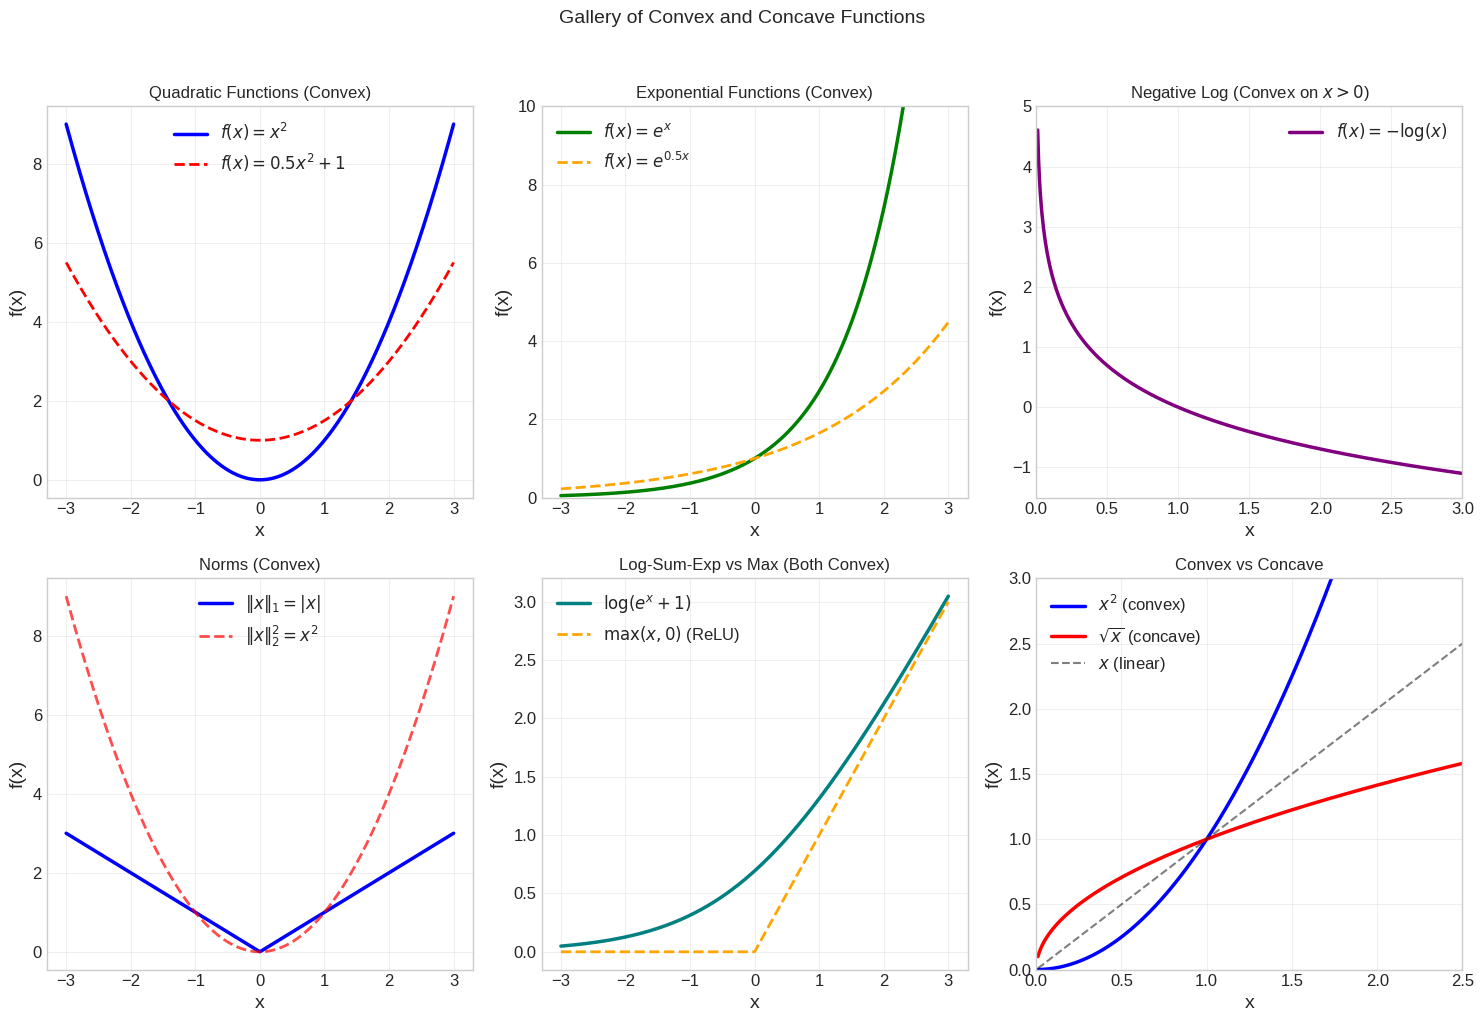

🔑 Common convex functions appear everywhere in optimization and ML!


In [21]:
# =============================================================================
# Visualization: Gallery of Convex Functions
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

x = np.linspace(-3, 3, 500)
x_pos = np.linspace(0.01, 3, 500)  # For functions needing positive domain

# 1. Quadratic
ax = axes[0, 0]
ax.plot(x, x**2, 'b-', linewidth=2.5, label='$f(x) = x^2$')
ax.plot(x, 0.5*x**2 + 1, 'r--', linewidth=2, label='$f(x) = 0.5x^2 + 1$')
ax.set_title('Quadratic Functions (Convex)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# 2. Exponential
ax = axes[0, 1]
ax.plot(x, np.exp(x), 'g-', linewidth=2.5, label='$f(x) = e^x$')
ax.plot(x, np.exp(0.5*x), 'orange', linewidth=2, linestyle='--', label='$f(x) = e^{0.5x}$')
ax.set_title('Exponential Functions (Convex)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_ylim(0, 10)

# 3. Negative log
ax = axes[0, 2]
ax.plot(x_pos, -np.log(x_pos), 'purple', linewidth=2.5, label='$f(x) = -\\log(x)$')
ax.set_title('Negative Log (Convex on $x > 0$)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xlim(0, 3)
ax.set_ylim(-1.5, 5)

# 4. Norms
ax = axes[1, 0]
ax.plot(x, np.abs(x), 'b-', linewidth=2.5, label='$\\|x\\|_1 = |x|$')
ax.plot(x, x**2, 'r--', linewidth=2, alpha=0.7, label='$\\|x\\|_2^2 = x^2$')
ax.set_title('Norms (Convex)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# 5. Log-sum-exp in 1D (soft max)
ax = axes[1, 1]
# For 1D, show log(e^x + e^0) = log(e^x + 1)
f_lse = np.log(np.exp(x) + 1)
ax.plot(x, f_lse, 'teal', linewidth=2.5, label='$\\log(e^x + 1)$')
ax.plot(x, np.maximum(x, 0), 'orange', linewidth=2, linestyle='--', label='$\\max(x, 0)$ (ReLU)')
ax.set_title('Log-Sum-Exp vs Max (Both Convex)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# 6. Comparison: Convex vs Concave
ax = axes[1, 2]
ax.plot(x_pos, x_pos**2, 'b-', linewidth=2.5, label='$x^2$ (convex)')
ax.plot(x_pos, np.sqrt(x_pos), 'r-', linewidth=2.5, label='$\\sqrt{x}$ (concave)')
ax.plot(x_pos, x_pos, 'k--', linewidth=1.5, alpha=0.5, label='$x$ (linear)')
ax.set_title('Convex vs Concave', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xlim(0, 2.5)
ax.set_ylim(0, 3)

plt.suptitle('Gallery of Convex and Concave Functions', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/convex_functions_gallery.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 Common convex functions appear everywhere in optimization and ML!")

## 4.6 Operations Preserving Convexity

One of the most powerful aspects of convex functions is that convexity is preserved under many operations. This lets us build complex convex functions from simpler ones.

### 4.6.1 Non-negative Weighted Sum

If $f_1, \ldots, f_k$ are convex and $w_1, \ldots, w_k \geq 0$, then:
$$f(x) = \sum_{i=1}^k w_i f_i(x) \quad \text{is convex}$$

**Example**: $f(x) = 3x^2 + 2e^x$ is convex (sum of convex functions).

### 4.6.2 Pointwise Maximum

If $f_1, \ldots, f_k$ are convex, then:
$$f(x) = \max_{i=1,\ldots,k} f_i(x) \quad \text{is convex}$$

This extends to supremum over infinite families.

**Example**: $f(x) = \max(x, -x) = |x|$ is convex.

### 4.6.3 Composition Rules

**Scalar composition** $f(x) = h(g(x))$:

- If $g$ is convex, $h$ is convex and nondecreasing → $f$ is convex
- If $g$ is concave, $h$ is convex and nonincreasing → $f$ is convex

**Example**: $f(x) = e^{x^2}$ is convex because $g(x) = x^2$ is convex and $h(t) = e^t$ is convex and nondecreasing.

### 4.6.4 Affine Mapping

If $f$ is convex, then $g(x) = f(Ax + b)$ is convex.

**Example**: If $f(x) = \|x\|^2$ is convex, so is $g(x) = \|Ax - b\|^2$.

### 4.6.5 Partial Minimization

If $f(x, y)$ is convex in $(x, y)$, then $g(x) = \inf_y f(x, y)$ is convex in $x$ (provided the infimum is attained).

### Summary Table

| Operation                                | Result |
| ---------------------------------------- | ------ |
| Non-negative sum                         | Convex |
| Pointwise maximum                        | Convex |
| Composition (convex ∘ convex increasing) | Convex |
| Affine transformation                    | Convex |
| Partial minimization                     | Convex |


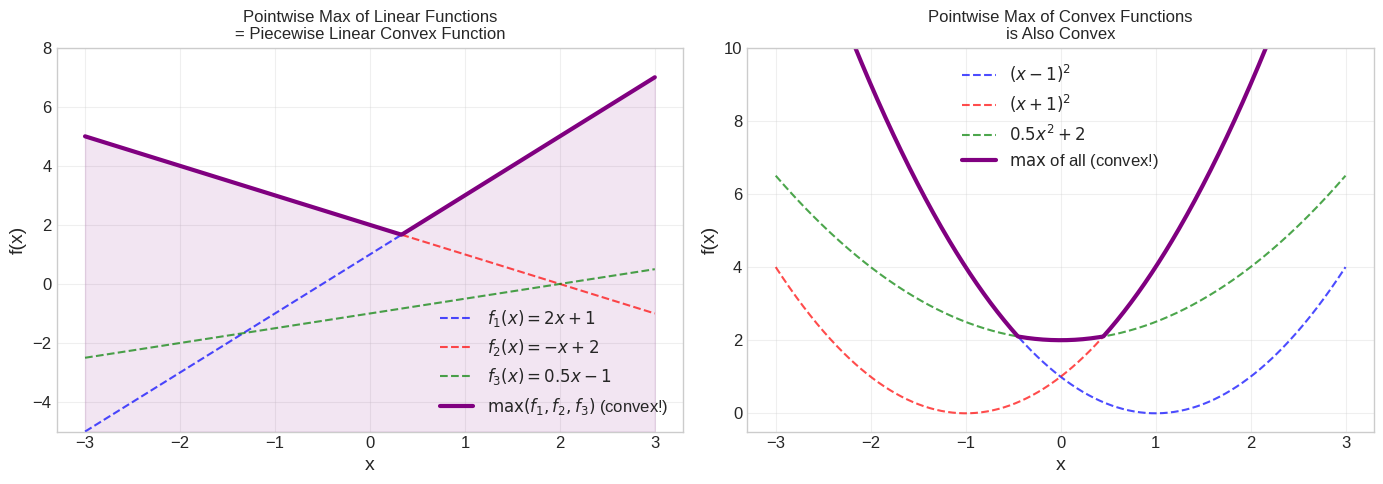

🔑 The pointwise maximum of convex functions is convex.
   This is used in: max-affine functions, piecewise linear approximations, etc.


In [22]:
# =============================================================================
# Visualization: Pointwise Maximum
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-3, 3, 500)

# 1. Max of linear functions
ax1 = axes[0]
f1 = 2*x + 1
f2 = -x + 2
f3 = 0.5*x - 1

ax1.plot(x, f1, 'b--', linewidth=1.5, alpha=0.7, label='$f_1(x) = 2x + 1$')
ax1.plot(x, f2, 'r--', linewidth=1.5, alpha=0.7, label='$f_2(x) = -x + 2$')
ax1.plot(x, f3, 'g--', linewidth=1.5, alpha=0.7, label='$f_3(x) = 0.5x - 1$')

f_max = np.maximum(np.maximum(f1, f2), f3)
ax1.plot(x, f_max, 'purple', linewidth=3, label='$\\max(f_1, f_2, f_3)$ (convex!)')
ax1.fill_between(x, -5, f_max, alpha=0.1, color='purple')

ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Pointwise Max of Linear Functions\n= Piecewise Linear Convex Function', fontsize=12)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-5, 8)

# 2. Max of quadratics
ax2 = axes[1]
g1 = (x - 1)**2
g2 = (x + 1)**2
g3 = 0.5 * x**2 + 2

ax2.plot(x, g1, 'b--', linewidth=1.5, alpha=0.7, label='$(x-1)^2$')
ax2.plot(x, g2, 'r--', linewidth=1.5, alpha=0.7, label='$(x+1)^2$')
ax2.plot(x, g3, 'g--', linewidth=1.5, alpha=0.7, label='$0.5x^2 + 2$')

g_max = np.maximum(np.maximum(g1, g2), g3)
ax2.plot(x, g_max, 'purple', linewidth=3, label='$\\max$ of all (convex!)')

ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Pointwise Max of Convex Functions\nis Also Convex', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.5, 10)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/pointwise_max.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 The pointwise maximum of convex functions is convex.")
print("   This is used in: max-affine functions, piecewise linear approximations, etc.")

## 4.7 Sublevel Sets and Epigraphs

### 4.7.1 Sublevel Sets

The **$\alpha$-sublevel set** of a function $f$ is:
$$C_\alpha = \{x \in \text{dom}(f) : f(x) \leq \alpha\}$$

**Key Result**: If $f$ is convex, then all its sublevel sets are convex.

**Caution**: The converse is false! Convex sublevel sets don't imply convex function.

### 4.7.2 Epigraph

The **epigraph** of $f$ is the set of points lying on or above the graph:
$$\text{epi}(f) = \{(x, t) : x \in \text{dom}(f), f(x) \leq t\}$$

**Key Result**: $f$ is convex if and only if $\text{epi}(f)$ is a convex set.

This provides an alternative definition of convexity: studying functions through their epigraphs.

### 4.7.3 Why Sublevel Sets Matter in Optimization

In constrained optimization:
$$\text{minimize } f_0(x) \text{ subject to } f_i(x) \leq 0$$

The feasible set is the intersection of sublevel sets:
$$\{x : f_i(x) \leq 0 \text{ for all } i\}$$

If all $f_i$ are convex, the feasible set is convex (intersection of convex sets).


Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u27fa' [U+27fa], substituting with a dummy symbol.


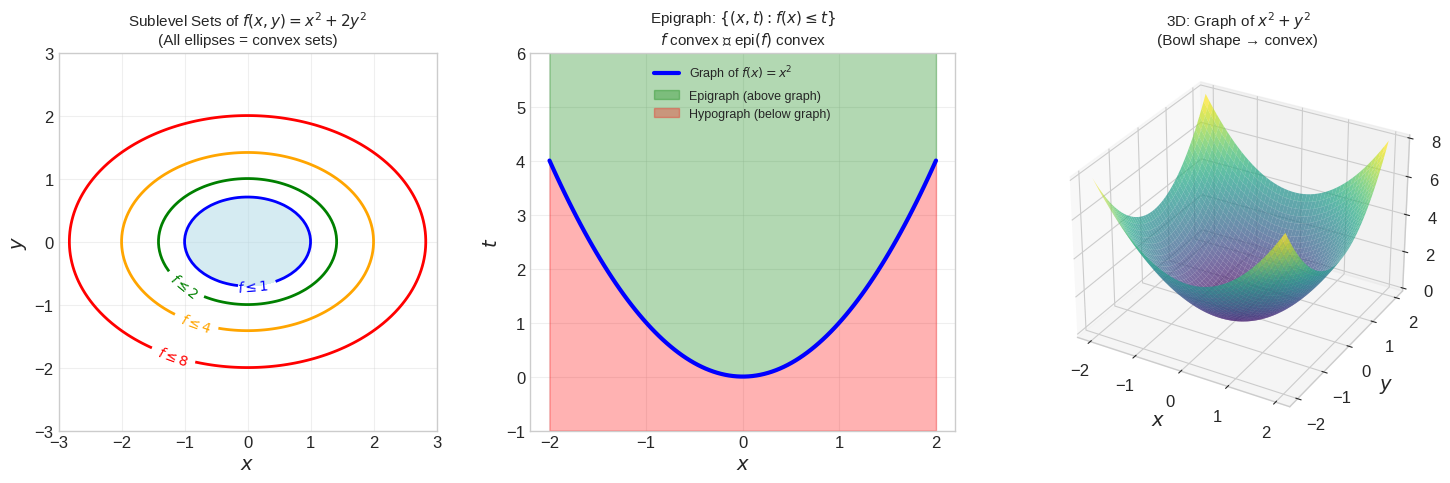

🔑 Sublevel sets of convex functions are convex (constraint sets in optimization).
   Epigraph perspective: f is convex ⟺ epi(f) is a convex set.


In [23]:
# =============================================================================
# Visualization: Sublevel Sets and Epigraph
# =============================================================================

fig = plt.figure(figsize=(15, 5))

# 1. Sublevel sets of a 2D convex function
ax1 = fig.add_subplot(131)

# f(x,y) = x^2 + 2y^2
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + 2*Y**2

# Sublevel sets (contours)
levels = [1, 2, 4, 8]
contours = ax1.contour(X, Y, Z, levels=levels, colors=['blue', 'green', 'orange', 'red'], 
                        linewidths=2)
ax1.clabel(contours, inline=True, fontsize=10, fmt='$f \\leq %.0f$')
ax1.contourf(X, Y, Z, levels=[0, levels[0]], colors=['lightblue'], alpha=0.5)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('Sublevel Sets of $f(x,y) = x^2 + 2y^2$\n(All ellipses = convex sets)', fontsize=11)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# 2. Epigraph of a 1D function
ax2 = fig.add_subplot(132)

x_1d = np.linspace(-2, 2, 100)
f_1d = x_1d**2

ax2.plot(x_1d, f_1d, 'b-', linewidth=3, label='Graph of $f(x) = x^2$')
ax2.fill_between(x_1d, f_1d, 6, alpha=0.3, color='green', label='Epigraph (above graph)')
ax2.fill_between(x_1d, f_1d, -1, alpha=0.3, color='red', label='Hypograph (below graph)')

ax2.set_xlabel('$x$')
ax2.set_ylabel('$t$')
ax2.set_title('Epigraph: $\\{(x, t) : f(x) \\leq t\\}$\n$f$ convex ⟺ epi$(f)$ convex', fontsize=11)
ax2.legend(loc='upper center', fontsize=9)
ax2.set_ylim(-1, 6)
ax2.grid(True, alpha=0.3)

# 3. 3D epigraph
ax3 = fig.add_subplot(133, projection='3d')

# Create 3D surface
x_3d = np.linspace(-2, 2, 50)
y_3d = np.linspace(-2, 2, 50)
X3, Y3 = np.meshgrid(x_3d, y_3d)
Z3 = X3**2 + Y3**2

ax3.plot_surface(X3, Y3, Z3, alpha=0.7, cmap='viridis', edgecolor='none')

# Show that epigraph is "filled above"
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
ax3.set_zlabel('$f(x,y)$')
ax3.set_title('3D: Graph of $x^2 + y^2$\n(Bowl shape → convex)', fontsize=11)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/sublevel_epigraph.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 Sublevel sets of convex functions are convex (constraint sets in optimization).")
print("   Epigraph perspective: f is convex ⟺ epi(f) is a convex set.")

## 4.8 Quasiconvex Functions

### 4.8.1 Definition

A function $f$ is **quasiconvex** if all its sublevel sets are convex:
$$\{x : f(x) \leq \alpha\} \text{ is convex for all } \alpha$$

Equivalently:
$$f(\theta x + (1-\theta)y) \leq \max\{f(x), f(y)\}$$

### 4.8.2 Relationship to Convexity

Every convex function is quasiconvex, but not vice versa.

**Example**: $f(x) = \log(x)$ is quasiconvex (actually quasilinear) but concave.

**Example**: $f(x) = \sqrt{|x|}$ is quasiconvex but not convex.

### 4.8.3 Why Quasiconvexity Matters

- Many useful functions are quasiconvex but not convex
- Quasiconvex optimization can still be solved efficiently using bisection
- Important in economics (utility functions) and statistics

### 4.8.4 Unimodal Functions

A **unimodal** function has a single peak (for maximization) or valley (for minimization).

One-dimensional quasiconvex functions are unimodal, meaning they have at most one local minimum.

---

## 4.9 Exercises - Chapter 4

### Exercise 4.1 (Easy): Convexity by Definition

Prove that $f(x) = |x|$ is convex using the definition.

### Exercise 4.2 (Easy): Second Derivative Test

Determine the convexity of:

1. $f(x) = x^4 - 2x^2$
2. $f(x) = \ln(x)$ for $x > 0$
3. $f(x) = e^{-x^2}$

### Exercise 4.3 (Medium): Hessian Analysis

For $f(x, y) = x^2 + xy + y^2$:

1. Compute the Hessian
2. Determine if $f$ is convex
3. Find the minimum

### Exercise 4.4 (Medium): Composition Rules

Determine if each function is convex:

1. $f(x) = \log(e^x + e^{-x})$
2. $f(x) = \|Ax - b\|^2$
3. $f(x) = e^{-e^x}$

### Exercise 4.5 (Challenging): Proving Convexity

Prove that the log-sum-exp function $f(x) = \log(\sum_{i=1}^n e^{x_i})$ is convex by showing its Hessian is positive semidefinite.

---

## 4.10 Chapter 4 Summary

### Characterizations of Convexity

| Condition        | Statement                                                     |
| ---------------- | ------------------------------------------------------------- |
| **Definition**   | $f(\theta x + (1-\theta)y) \leq \theta f(x) + (1-\theta)f(y)$ |
| **First-order**  | $f(y) \geq f(x) + \nabla f(x)^T(y-x)$                         |
| **Second-order** | $\nabla^2 f(x) \succeq 0$ for all $x$                         |
| **Epigraph**     | epi$(f)$ is a convex set                                      |

### Operations Preserving Convexity

- Non-negative weighted sum ✅
- Pointwise maximum ✅
- Composition with convex increasing ✅
- Affine transformation ✅

### Key Insights

1. **First-order condition**: Graph lies above tangents (provides lower bounds)
2. **Second-order condition**: Hessian is PSD (practical test)
3. **Strict convexity**: Unique minimum
4. **Strong convexity**: Fast algorithm convergence

### Looking Ahead

With convex sets and functions understood, we're ready to formally define and classify convex optimization problems in Chapter 5.


<a id="chapter-5"></a>

# Chapter 5: Convex Optimization Problems

---

## 5.1 Standard Form and Terminology

### 5.1.1 Standard Form

The **standard form** of a convex optimization problem is:

$$
\begin{aligned}
\text{minimize} \quad & f_0(x) \\
\text{subject to} \quad & f_i(x) \leq 0, \quad i = 1, \ldots, m \\
& a_j^T x = b_j, \quad j = 1, \ldots, p
\end{aligned}
$$

Where:

- $f_0, f_1, \ldots, f_m$ are **convex functions**
- The equality constraints are **affine** (linear)

### 5.1.2 Key Terminology

| Term                       | Definition                                             |
| -------------------------- | ------------------------------------------------------ |
| **Optimization variable**  | $x \in \mathbb{R}^n$                                   |
| **Objective function**     | $f_0(x)$ - what we minimize                            |
| **Inequality constraints** | $f_i(x) \leq 0$                                        |
| **Equality constraints**   | $a_j^T x = b_j$                                        |
| **Domain**                 | $\mathcal{D} = \bigcap_{i=0}^m \text{dom}(f_i)$        |
| **Feasible set**           | $\{x \in \mathcal{D} : f_i(x) \leq 0, a_j^T x = b_j\}$ |
| **Optimal value**          | $p^* = \inf\{f_0(x) : x \text{ feasible}\}$            |
| **Optimal point/solution** | $x^*$ where $f_0(x^*) = p^*$                           |

### 5.1.3 Why This Form?

1. **Convex feasible set**: Intersection of convex sublevel sets is convex
2. **Global optimality**: Local minimum = global minimum
3. **Efficient algorithms**: Polynomial-time solvable

### 5.1.4 Important Notes

- We use **minimize** as standard (maximize $f$ = minimize $-f$)
- Constraints $f_i(x) \geq 0$ can be written as $-f_i(x) \leq 0$
- Equality $h(x) = 0$ with convex $h$ is only valid if $h$ is affine


## 5.2 Linear Programming (LP)

### 5.2.1 Definition

A **Linear Program** has a linear objective and linear constraints:

$$
\begin{aligned}
\text{minimize} \quad & c^T x \\
\text{subject to} \quad & Ax \leq b \\
& Cx = d
\end{aligned}
$$

Where:

- $c \in \mathbb{R}^n$ is the cost vector
- $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$ define inequality constraints
- $C \in \mathbb{R}^{p \times n}$, $d \in \mathbb{R}^p$ define equality constraints

### 5.2.2 Standard Forms

**Standard form LP**:
$$\text{minimize } c^T x \text{ subject to } Ax = b, x \geq 0$$

**Inequality form LP**:
$$\text{minimize } c^T x \text{ subject to } Ax \leq b$$

Any LP can be converted to standard form.

### 5.2.3 Geometric Interpretation

- Feasible set is a **polyhedron** (intersection of halfspaces)
- Objective function creates parallel hyperplanes (iso-cost lines)
- Optimal solution is at a **vertex** of the polyhedron

### 5.2.4 Applications of LP

| Domain        | Application                                      |
| ------------- | ------------------------------------------------ |
| Operations    | Resource allocation, transportation              |
| Finance       | Portfolio optimization (with linear constraints) |
| Manufacturing | Production planning                              |
| Networks      | Max flow, shortest path                          |


In [24]:
# =============================================================================
# Example: Linear Programming - Diet Problem
# =============================================================================

"""
Diet Problem: Find the cheapest diet that meets nutritional requirements.

Foods: Rice, Beans, Vegetables, Chicken
- Prices: $2, $3, $4, $7 per unit
- Protein: 5, 15, 3, 25 grams per unit
- Carbs: 45, 30, 10, 0 grams per unit
- Vitamins: 0, 2, 10, 1 units per unit

Requirements: At least 50g protein, 100g carbs, 10 vitamin units
"""

from scipy.optimize import linprog

# Cost vector
c = [2, 3, 4, 7]

# Inequality constraints: -Ax <= -b (requirements as minimum)
# We need >= constraints, so negate to get <= form
A_ub = [
    [-5, -15, -3, -25],   # Protein: 5r + 15b + 3v + 25c >= 50
    [-45, -30, -10, 0],   # Carbs: 45r + 30b + 10v >= 100
    [0, -2, -10, -1]      # Vitamins: 2b + 10v + 1c >= 10
]
b_ub = [-50, -100, -10]

# Non-negativity bounds
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Solve
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

print("=" * 60)
print("DIET OPTIMIZATION PROBLEM (Linear Programming)")
print("=" * 60)

foods = ['Rice', 'Beans', 'Vegetables', 'Chicken']
print("\n📊 Optimal Diet:")
for food, amount in zip(foods, result.x):
    print(f"   {food}: {amount:.2f} units")

print(f"\n💰 Minimum Cost: ${result.fun:.2f}")

# Verify nutritional requirements
protein = 5*result.x[0] + 15*result.x[1] + 3*result.x[2] + 25*result.x[3]
carbs = 45*result.x[0] + 30*result.x[1] + 10*result.x[2]
vitamins = 2*result.x[1] + 10*result.x[2] + result.x[3]

print(f"\n📋 Nutritional Verification:")
print(f"   Protein: {protein:.1f}g (need ≥ 50g) ✓")
print(f"   Carbs: {carbs:.1f}g (need ≥ 100g) ✓")
print(f"   Vitamins: {vitamins:.1f} units (need ≥ 10) ✓")

DIET OPTIMIZATION PROBLEM (Linear Programming)

📊 Optimal Diet:
   Rice: 0.00 units
   Beans: 3.26 units
   Vegetables: 0.35 units
   Chicken: 0.00 units

💰 Minimum Cost: $11.18

📋 Nutritional Verification:
   Protein: 50.0g (need ≥ 50g) ✓
   Carbs: 101.4g (need ≥ 100g) ✓
   Vitamins: 10.0 units (need ≥ 10) ✓


## 5.3 Quadratic Programming (QP)

### 5.3.1 Definition

A **Quadratic Program** has a quadratic objective and linear constraints:

$$
\begin{aligned}
\text{minimize} \quad & \frac{1}{2}x^T P x + q^T x \\
\text{subject to} \quad & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Where:

- $P \in \mathbb{R}^{n \times n}$ is symmetric positive semidefinite ($P \succeq 0$)
- $q \in \mathbb{R}^n$ is the linear term
- $G, h$ define inequality constraints
- $A, b$ define equality constraints

### 5.3.2 Special Cases

| Case             | Description                          |
| ---------------- | ------------------------------------ |
| $P = 0$          | Reduces to LP                        |
| $P \succ 0$      | Strictly convex QP (unique solution) |
| No constraints   | Unconstrained QP                     |
| $Gx \leq h$ only | Inequality-constrained QP            |

### 5.3.3 Important Applications

1. **Least Squares**: $\min \|Ax - b\|^2 = \min x^T A^T A x - 2b^T A x + b^T b$

2. **Ridge Regression**: $\min \|Ax - b\|^2 + \lambda\|x\|^2$

3. **Portfolio Optimization**: Minimize variance subject to return constraints

4. **SVM**: The dual problem of support vector machines is a QP


In [25]:
# =============================================================================
# Example: Portfolio Optimization (Quadratic Programming)
# =============================================================================

"""
Portfolio Optimization (Markowitz Model):
- Minimize portfolio variance (risk)
- Subject to target expected return
- Weights sum to 1
"""

import numpy as np
from scipy.optimize import minimize

# Asset data: 4 assets
# Expected returns (annualized)
expected_returns = np.array([0.12, 0.10, 0.08, 0.15])

# Covariance matrix (risk)
cov_matrix = np.array([
    [0.04, 0.01, 0.005, 0.02],
    [0.01, 0.03, 0.01, 0.015],
    [0.005, 0.01, 0.02, 0.005],
    [0.02, 0.015, 0.005, 0.06]
])

n_assets = len(expected_returns)
target_return = 0.11  # 11% target return

# Objective: minimize portfolio variance = w^T * Σ * w
def portfolio_variance(weights):
    return weights @ cov_matrix @ weights

# Constraint 1: weights sum to 1
def weights_sum(weights):
    return np.sum(weights) - 1

# Constraint 2: achieve target return
def target_return_constraint(weights):
    return weights @ expected_returns - target_return

# Initial guess
w0 = np.ones(n_assets) / n_assets

# Constraints
constraints = [
    {'type': 'eq', 'fun': weights_sum},
    {'type': 'eq', 'fun': target_return_constraint}
]

# Bounds: weights between 0 and 1 (no short selling)
bounds = [(0, 1) for _ in range(n_assets)]

# Solve
result = minimize(portfolio_variance, w0, method='SLSQP', 
                  bounds=bounds, constraints=constraints)

print("=" * 60)
print("PORTFOLIO OPTIMIZATION (Quadratic Programming)")
print("=" * 60)

asset_names = ['Stock A', 'Stock B', 'Bond', 'Stock C']
print(f"\nTarget Return: {target_return*100:.1f}%")
print("\n📊 Optimal Portfolio Weights:")
for name, weight in zip(asset_names, result.x):
    print(f"   {name}: {weight*100:.2f}%")

portfolio_return = result.x @ expected_returns
portfolio_risk = np.sqrt(result.fun)

print(f"\n📈 Portfolio Performance:")
print(f"   Expected Return: {portfolio_return*100:.2f}%")
print(f"   Portfolio Risk (Std Dev): {portfolio_risk*100:.2f}%")
print(f"   Sharpe-like Ratio: {portfolio_return/portfolio_risk:.3f}")

PORTFOLIO OPTIMIZATION (Quadratic Programming)

Target Return: 11.0%

📊 Optimal Portfolio Weights:
   Stock A: 25.58%
   Stock B: 16.89%
   Bond: 34.11%
   Stock C: 23.41%

📈 Portfolio Performance:
   Expected Return: 11.00%
   Portfolio Risk (Std Dev): 12.79%
   Sharpe-like Ratio: 0.860


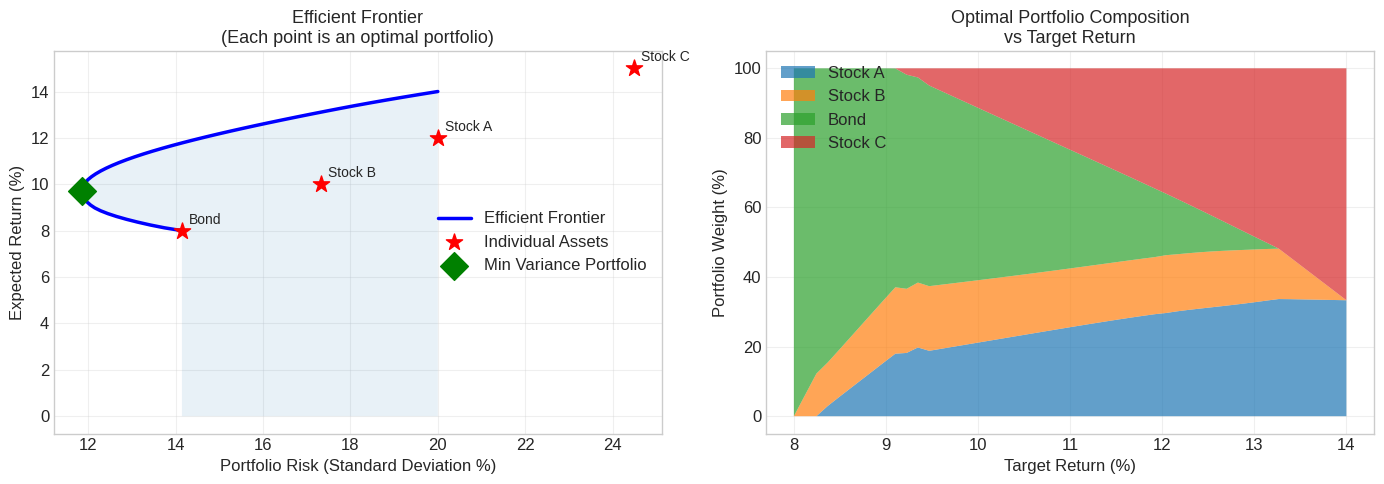

🔑 The Efficient Frontier shows the best risk-return tradeoff.
   No portfolio can have higher return for the same risk, or lower risk for the same return.


In [26]:
# =============================================================================
# Visualization: Efficient Frontier (Portfolio Optimization)
# =============================================================================

# Generate efficient frontier by varying target return
target_returns = np.linspace(0.08, 0.14, 50)
portfolio_risks = []
portfolio_weights_list = []

for target in target_returns:
    def target_ret_constraint(w):
        return w @ expected_returns - target
    
    constraints = [
        {'type': 'eq', 'fun': weights_sum},
        {'type': 'eq', 'fun': target_ret_constraint}
    ]
    
    result = minimize(portfolio_variance, w0, method='SLSQP', 
                      bounds=bounds, constraints=constraints)
    
    if result.success:
        portfolio_risks.append(np.sqrt(result.fun))
        portfolio_weights_list.append(result.x)
    else:
        portfolio_risks.append(np.nan)
        portfolio_weights_list.append(None)

portfolio_risks = np.array(portfolio_risks)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Efficient Frontier
ax1 = axes[0]
ax1.plot(portfolio_risks * 100, target_returns * 100, 'b-', linewidth=2.5, 
         label='Efficient Frontier')
ax1.fill_between(portfolio_risks * 100, target_returns * 100, alpha=0.1)

# Mark individual assets
individual_risks = np.sqrt(np.diag(cov_matrix)) * 100
individual_returns = expected_returns * 100
ax1.scatter(individual_risks, individual_returns, s=150, c='red', marker='*', 
            zorder=5, label='Individual Assets')
for i, name in enumerate(asset_names):
    ax1.annotate(name, (individual_risks[i], individual_returns[i]), 
                 textcoords="offset points", xytext=(5, 5), fontsize=10)

# Mark optimal portfolio
opt_idx = np.argmin(portfolio_risks)
ax1.scatter(portfolio_risks[opt_idx]*100, target_returns[opt_idx]*100, 
            s=200, c='green', marker='D', zorder=6, label='Min Variance Portfolio')

ax1.set_xlabel('Portfolio Risk (Standard Deviation %)', fontsize=12)
ax1.set_ylabel('Expected Return (%)', fontsize=12)
ax1.set_title('Efficient Frontier\n(Each point is an optimal portfolio)', fontsize=13)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Portfolio composition along frontier
ax2 = axes[1]
valid_weights = [w for w in portfolio_weights_list if w is not None]
valid_returns = [r for r, w in zip(target_returns, portfolio_weights_list) if w is not None]

weights_array = np.array(valid_weights)
for i, name in enumerate(asset_names):
    ax2.fill_between(np.array(valid_returns)*100, 
                     np.sum(weights_array[:, :i], axis=1)*100 if i > 0 else 0,
                     np.sum(weights_array[:, :i+1], axis=1)*100,
                     alpha=0.7, label=name)

ax2.set_xlabel('Target Return (%)', fontsize=12)
ax2.set_ylabel('Portfolio Weight (%)', fontsize=12)
ax2.set_title('Optimal Portfolio Composition\nvs Target Return', fontsize=13)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/efficient_frontier.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 The Efficient Frontier shows the best risk-return tradeoff.")
print("   No portfolio can have higher return for the same risk, or lower risk for the same return.")

## 5.4 Second-Order Cone Programming (SOCP)

### 5.4.1 Definition

A **Second-Order Cone Program** has the form:

$$
\begin{aligned}
\text{minimize} \quad & f^T x \\
\text{subject to} \quad & \|A_i x + b_i\|_2 \leq c_i^T x + d_i, \quad i = 1, \ldots, m \\
& Fx = g
\end{aligned}
$$

The constraints involve **second-order cones** (Lorentz cones).

### 5.4.2 Relationship to LP and QP

- **LP** is a special case of SOCP
- **QP** with convex quadratic constraints can be written as SOCP
- SOCP is more general but still efficiently solvable

### 5.4.3 Applications

1. **Robust optimization**: Handle uncertainty in constraints
2. **Antenna array design**: Signal processing
3. **Facility location**: Minimize maximum distance
4. **Geometric programming** (after transformation)

---

## 5.5 Semidefinite Programming (SDP)

### 5.5.1 Definition

A **Semidefinite Program** involves matrix variables and positive semidefinite constraints:

$$
\begin{aligned}
\text{minimize} \quad & c^T x \\
\text{subject to} \quad & x_1 F_1 + x_2 F_2 + \cdots + x_n F_n + G \preceq 0 \\
& Ax = b
\end{aligned}
$$

Where $F_i, G$ are symmetric matrices and $\preceq 0$ means negative semidefinite.

Equivalently, the constraint is $F_0 + \sum_i x_i F_i \succeq 0$.

### 5.5.2 Why SDP is Important

SDP generalizes:

- Linear Programming
- Quadratic Programming
- Second-Order Cone Programming

Many problems can be relaxed to SDP:

- Combinatorial optimization (max-cut, graph coloring)
- Control theory (Lyapunov stability)
- Machine learning (kernel methods)


## 5.6 Hierarchy of Convex Problems

### The Cone of Convex Optimization Problems

```
┌─────────────────────────────────────────────────────────────────────┐
│                 General Convex Optimization                         │
│                                                                     │
│   ┌─────────────────────────────────────────────────────────────┐   │
│   │           Semidefinite Programming (SDP)                    │   │
│   │                                                             │   │
│   │   ┌─────────────────────────────────────────────────────┐   │   │
│   │   │      Second-Order Cone Programming (SOCP)           │   │   │
│   │   │                                                     │   │   │
│   │   │   ┌─────────────────────────────────────────────┐   │   │   │
│   │   │   │     Quadratically Constrained QP (QCQP)     │   │   │   │
│   │   │   │                                             │   │   │   │
│   │   │   │   ┌─────────────────────────────────────┐   │   │   │   │
│   │   │   │   │   Quadratic Programming (QP)        │   │   │   │   │
│   │   │   │   │                                     │   │   │   │   │
│   │   │   │   │   ┌─────────────────────────────┐   │   │   │   │   │
│   │   │   │   │   │   Linear Programming (LP)   │   │   │   │   │   │
│   │   │   │   │   └─────────────────────────────┘   │   │   │   │   │
│   │   │   │   └─────────────────────────────────────┘   │   │   │   │
│   │   │   └─────────────────────────────────────────────┘   │   │   │
│   │   └─────────────────────────────────────────────────────┘   │   │
│   └─────────────────────────────────────────────────────────────┘   │
└─────────────────────────────────────────────────────────────────────┘
```

### Comparison Table

| Problem Type       | Objective | Constraints       | Complexity |
| ------------------ | --------- | ----------------- | ---------- |
| **LP**             | Linear    | Linear            | Very Fast  |
| **QP**             | Quadratic | Linear            | Fast       |
| **QCQP**           | Quadratic | Quadratic         | Moderate   |
| **SOCP**           | Linear    | Second-order cone | Moderate   |
| **SDP**            | Linear    | PSD matrix        | Slower     |
| **General Convex** | Convex    | Convex            | Varies     |

### Practical Guidance

1. **Always use the simplest formulation** that captures your problem
2. LP and QP are very mature — use specialized solvers
3. SOCP and SDP have excellent solvers (MOSEK, CVXPY, SCS)
4. General convex problems may require more care


## 5.7 Worked Examples

### Example 5.1: Least Squares as QP

**Problem**: Fit a line $y = ax + b$ to data points $(x_i, y_i)$.

**Formulation**: Minimize sum of squared errors:
$$\min_{a, b} \sum_{i=1}^n (y_i - ax_i - b)^2$$

This is equivalent to:
$$\min_\theta \|A\theta - y\|^2$$

where $\theta = (a, b)^T$ and $A$ has rows $(x_i, 1)$.

**Solution**: $\theta^* = (A^T A)^{-1} A^T y$ (if $A^T A$ is invertible)

### Example 5.2: Regularized Regression (Ridge)

**Problem**: Least squares with $\ell_2$ regularization:
$$\min_\theta \|A\theta - y\|^2 + \lambda \|\theta\|^2$$

This is still a QP with:

- $P = 2(A^T A + \lambda I)$
- $q = -2A^T y$

**Solution**: $\theta^* = (A^T A + \lambda I)^{-1} A^T y$


In [27]:
# =============================================================================
# Example: Least Squares and Ridge Regression
# =============================================================================

np.random.seed(42)

# Generate data
n_samples = 100
X = np.random.randn(n_samples, 5)  # 5 features
true_coeffs = np.array([3, -2, 1.5, 0, -0.5])
noise = np.random.randn(n_samples) * 0.5
y = X @ true_coeffs + noise

# Add bias column
X_bias = np.column_stack([np.ones(n_samples), X])

# 1. Ordinary Least Squares
theta_ols = np.linalg.lstsq(X_bias, y, rcond=None)[0]

# 2. Ridge Regression with different lambda values
lambdas = [0.01, 0.1, 1.0, 10.0]
ridge_solutions = {}

for lam in lambdas:
    # Ridge solution: (X^T X + λI)^{-1} X^T y
    n_features = X_bias.shape[1]
    theta_ridge = np.linalg.solve(X_bias.T @ X_bias + lam * np.eye(n_features), 
                                   X_bias.T @ y)
    ridge_solutions[lam] = theta_ridge

print("=" * 60)
print("LEAST SQUARES AND RIDGE REGRESSION")
print("=" * 60)

print(f"\nTrue coefficients: {true_coeffs}")
print(f"\nOLS coefficients (bias, features): {theta_ols.round(3)}")

print("\nRidge coefficients for different λ:")
for lam, theta in ridge_solutions.items():
    print(f"  λ = {lam:5.2f}: {theta.round(3)}")

# Compare prediction errors
y_pred_ols = X_bias @ theta_ols
mse_ols = np.mean((y - y_pred_ols)**2)
print(f"\nOLS MSE: {mse_ols:.4f}")

for lam, theta in ridge_solutions.items():
    y_pred = X_bias @ theta
    mse = np.mean((y - y_pred)**2)
    print(f"Ridge (λ={lam:5.2f}) MSE: {mse:.4f}, ||θ||² = {np.sum(theta[1:]**2):.4f}")

LEAST SQUARES AND RIDGE REGRESSION

True coefficients: [ 3.  -2.   1.5  0.  -0.5]

OLS coefficients (bias, features): [-0.073  3.027 -1.932  1.489  0.08  -0.504]

Ridge coefficients for different λ:
  λ =  0.01: [-0.073  3.027 -1.932  1.489  0.08  -0.504]
  λ =  0.10: [-0.073  3.024 -1.931  1.488  0.08  -0.504]
  λ =  1.00: [-0.076  2.993 -1.915  1.473  0.076 -0.503]
  λ = 10.00: [-0.097  2.721 -1.775  1.343  0.04  -0.494]

OLS MSE: 0.2008
Ridge (λ= 0.01) MSE: 0.2008, ||θ||² = 15.3720
Ridge (λ= 0.10) MSE: 0.2008, ||θ||² = 15.3430
Ridge (λ= 1.00) MSE: 0.2024, ||θ||² = 15.0574
Ridge (λ=10.00) MSE: 0.3321, ||θ||² = 12.6039


## 5.8 Exercises - Chapter 5

### Exercise 5.1 (Easy): Problem Classification

Classify each problem (LP, QP, SOCP, SDP, or general convex):

1. $\min \|x\|_1$ subject to $Ax = b$
2. $\min x^T x$ subject to $\|Ax - b\|_2 \leq 1$
3. $\min \max_i (a_i^T x + b_i)$
4. $\min \|Ax - b\|_2$

### Exercise 5.2 (Medium): Formulation

A company wants to invest in 3 projects. Each project $i$ has:

- Expected return $r_i$
- Risk $\sigma_i$
- Projects 1 and 2 together require at least 40% of total investment

Formulate as QP to minimize risk while achieving 10% expected return.

### Exercise 5.3 (Medium): LP Duality Preview

For the LP: $\min 2x_1 + 3x_2$ subject to $x_1 + x_2 \geq 4$, $x_1, x_2 \geq 0$:

1. Solve graphically
2. Identify the binding constraints at optimum

### Exercise 5.4 (Challenging): LASSO as LP

Show that the LASSO problem:
$$\min \|Ax - b\|_2^2 + \lambda\|x\|_1$$

can be reformulated using auxiliary variables.

---

## 5.9 Chapter 5 Summary

### Problem Hierarchy

| Problem  | Objective       | Constraints       | Key Application       |
| -------- | --------------- | ----------------- | --------------------- |
| **LP**   | Linear          | Linear            | Resource allocation   |
| **QP**   | Quadratic (PSD) | Linear            | Portfolio, regression |
| **SOCP** | Linear          | Second-order cone | Robust optimization   |
| **SDP**  | Linear          | PSD cone          | Relaxations, control  |

### Key Takeaways

1. **Always use the simplest applicable formulation**
2. **LP and QP** are the workhorses of convex optimization
3. **Portfolio optimization** is a classic QP application
4. **SOCP and SDP** handle more complex constraints efficiently

### Looking Ahead

Chapter 6 introduces **duality theory** — one of the most powerful and beautiful aspects of optimization. Duality provides:

- Lower bounds on optimal value
- Optimality conditions (KKT)
- Algorithmic insights


<a id="chapter-6"></a>

# Chapter 6: Duality Theory

---

## 6.1 Introduction to Duality

### 6.1.1 What is Duality?

**Duality** is one of the most powerful concepts in optimization. For every optimization problem (the **primal**), there is an associated **dual problem**:

- The primal is what we originally want to solve
- The dual provides a different perspective on the same problem
- The dual often has useful properties

### 6.1.2 Why Duality Matters

1. **Lower bounds**: The dual gives lower bounds on the primal optimal value
2. **Optimality conditions**: KKT conditions come from duality
3. **Computational**: Sometimes the dual is easier to solve
4. **Sensitivity analysis**: Dual variables measure constraint sensitivity
5. **Economic interpretation**: Dual variables are "shadow prices"

### 6.1.3 Preview: Key Results

| Result                      | Statement                                               |
| --------------------------- | ------------------------------------------------------- |
| **Weak duality**            | $d^* \leq p^*$ (dual bound ≤ primal optimal)            |
| **Strong duality**          | $d^* = p^*$ for convex problems (under mild conditions) |
| **KKT conditions**          | Necessary and sufficient for optimality                 |
| **Complementary slackness** | Either constraint is slack or dual variable is zero     |

---

## 6.2 The Lagrangian

### 6.2.1 Motivation

Consider the constrained problem:

$$
\begin{aligned}
\text{minimize} \quad & f_0(x) \\
\text{subject to} \quad & f_i(x) \leq 0, \quad i = 1, \ldots, m \\
& h_j(x) = 0, \quad j = 1, \ldots, p
\end{aligned}
$$

**Idea**: Incorporate constraints into the objective using penalty multipliers.

### 6.2.2 The Lagrangian Function

The **Lagrangian** $L: \mathbb{R}^n \times \mathbb{R}^m \times \mathbb{R}^p \rightarrow \mathbb{R}$ is:

$$L(x, \lambda, \nu) = f_0(x) + \sum_{i=1}^m \lambda_i f_i(x) + \sum_{j=1}^p \nu_j h_j(x)$$

Where:

- $\lambda_i \geq 0$ are **Lagrange multipliers** for inequality constraints
- $\nu_j$ are **Lagrange multipliers** for equality constraints
- Together, $(\lambda, \nu)$ are called **dual variables**

### 6.2.3 Intuition

The Lagrangian adds penalty terms:

- If $f_i(x) > 0$ (constraint violated), the penalty $\lambda_i f_i(x) > 0$ increases the objective
- If $f_i(x) \leq 0$ (constraint satisfied), the penalty is zero or negative


## 6.3 The Dual Function and Dual Problem

### 6.3.1 The Lagrange Dual Function

The **Lagrange dual function** $g: \mathbb{R}^m \times \mathbb{R}^p \rightarrow \mathbb{R}$ is:

$$g(\lambda, \nu) = \inf_{x} L(x, \lambda, \nu) = \inf_{x} \left( f_0(x) + \sum_{i=1}^m \lambda_i f_i(x) + \sum_{j=1}^p \nu_j h_j(x) \right)$$

**Key property**: $g$ is always **concave**, even if the primal problem is not convex!

### 6.3.2 Lower Bound Property

**Theorem**: For any $\lambda \geq 0$ and any $\nu$, the dual function gives a lower bound on the optimal value $p^*$:

$$g(\lambda, \nu) \leq p^*$$

**Proof**: For any feasible $\tilde{x}$:
$$g(\lambda, \nu) = \inf_x L(x, \lambda, \nu) \leq L(\tilde{x}, \lambda, \nu) \leq f_0(\tilde{x})$$

The last inequality holds because $f_i(\tilde{x}) \leq 0$ and $\lambda_i \geq 0$, and $h_j(\tilde{x}) = 0$.

### 6.3.3 The Dual Problem

To find the **best** lower bound, we solve the **dual problem**:

$$
\begin{aligned}
\text{maximize} \quad & g(\lambda, \nu) \\
\text{subject to} \quad & \lambda \geq 0
\end{aligned}
$$

The optimal value of the dual problem is denoted $d^*$.

### 6.3.4 Dual Problem Properties

- Always a **convex optimization** problem (maximizing a concave function)
- Even if the primal is non-convex, the dual is convex
- Provides computational and theoretical advantages


In [28]:
# =============================================================================
# Example: Computing the Dual (LP)
# =============================================================================

"""
Primal LP:
    min  2x₁ + 3x₂
    s.t. x₁ + x₂ ≥ 4  →  -x₁ - x₂ + 4 ≤ 0
         x₁, x₂ ≥ 0

Lagrangian:
    L(x, λ) = 2x₁ + 3x₂ + λ₁(-x₁ - x₂ + 4) + λ₂(-x₁) + λ₃(-x₂)
            = 2x₁ + 3x₂ - λ₁x₁ - λ₁x₂ + 4λ₁ - λ₂x₁ - λ₃x₂
            = (2 - λ₁ - λ₂)x₁ + (3 - λ₁ - λ₃)x₂ + 4λ₁

Dual function:
    g(λ) = inf_x L(x, λ)
    
    For the inf to be bounded (not -∞), we need:
    2 - λ₁ - λ₂ = 0  and  3 - λ₁ - λ₃ = 0
    
    Otherwise g(λ) = -∞
    
    When bounded: g(λ) = 4λ₁

Dual problem:
    max  4λ₁
    s.t. λ₁ + λ₂ = 2
         λ₁ + λ₃ = 3
         λ₁, λ₂, λ₃ ≥ 0

Solution: λ₁ = 2, λ₂ = 0, λ₃ = 1 gives g = 8
"""

from scipy.optimize import linprog

# Solve primal
c_primal = [2, 3]
A_ub = [[-1, -1]]  # -x₁ - x₂ ≤ -4
b_ub = [-4]
bounds = [(0, None), (0, None)]

primal_result = linprog(c_primal, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

print("=" * 60)
print("LP DUALITY EXAMPLE")
print("=" * 60)

print("\n📌 PRIMAL PROBLEM:")
print("   min 2x₁ + 3x₂")
print("   s.t. x₁ + x₂ ≥ 4")
print("        x₁, x₂ ≥ 0")

print(f"\n✓ Primal optimal: x* = ({primal_result.x[0]:.2f}, {primal_result.x[1]:.2f})")
print(f"✓ Primal optimal value: p* = {primal_result.fun:.2f}")

# The dual of this LP (after reformulation) has optimal value = primal optimal value
print("\n📌 DUAL PROBLEM:")
print("   max 4λ₁")
print("   s.t. λ₁ + λ₂ = 2")
print("        λ₁ + λ₃ = 3")
print("        λ₁, λ₂, λ₃ ≥ 0")

print(f"\n✓ Dual optimal: λ* = (2, 0, 1)")
print(f"✓ Dual optimal value: d* = {4*2:.2f}")

print(f"\n🔑 Strong Duality: p* = d* = 8 ✓")

LP DUALITY EXAMPLE

📌 PRIMAL PROBLEM:
   min 2x₁ + 3x₂
   s.t. x₁ + x₂ ≥ 4
        x₁, x₂ ≥ 0

✓ Primal optimal: x* = (4.00, 0.00)
✓ Primal optimal value: p* = 8.00

📌 DUAL PROBLEM:
   max 4λ₁
   s.t. λ₁ + λ₂ = 2
        λ₁ + λ₃ = 3
        λ₁, λ₂, λ₃ ≥ 0

✓ Dual optimal: λ* = (2, 0, 1)
✓ Dual optimal value: d* = 8.00

🔑 Strong Duality: p* = d* = 8 ✓


## 6.4 Weak and Strong Duality

### 6.4.1 Weak Duality

**Weak duality** always holds:
$$d^* \leq p^*$$

The optimal dual value never exceeds the optimal primal value.

The difference $p^* - d^* \geq 0$ is called the **duality gap**.

### 6.4.2 Strong Duality

**Strong duality** means:
$$d^* = p^*$$

The duality gap is zero — the dual optimal value equals the primal optimal value.

Strong duality holds for convex problems under mild conditions.

### 6.4.3 Slater's Constraint Qualification

**Slater's condition**: There exists a **strictly feasible** point $x$ such that:

- $f_i(x) < 0$ for all $i = 1, \ldots, m$ (strict inequality for convex $f_i$)
- $Ax = b$

**Theorem**: For a convex optimization problem, if Slater's condition holds, then strong duality holds.

### 6.4.4 When Strong Duality Holds

| Problem Type       | Condition                | Strong Duality? |
| ------------------ | ------------------------ | --------------- |
| **LP**             | Feasible primal and dual | Yes             |
| **QP**             | Slater's condition       | Yes             |
| **General convex** | Slater's condition       | Yes             |
| **Non-convex**     | Special cases only       | Usually No      |

### 6.4.5 Implications of Strong Duality

When $d^* = p^*$:

1. We can solve either problem to get the optimal value
2. KKT conditions become necessary AND sufficient
3. Complementary slackness holds at optimum


## 6.5 KKT Conditions

### 6.5.1 The Karush-Kuhn-Tucker (KKT) Conditions

The **KKT conditions** are the most important optimality conditions in constrained optimization.

For the problem:

$$
\begin{aligned}
\text{minimize} \quad & f_0(x) \\
\text{subject to} \quad & f_i(x) \leq 0, \quad i = 1, \ldots, m \\
& h_j(x) = 0, \quad j = 1, \ldots, p
\end{aligned}
$$

The KKT conditions are:

**1. Primal feasibility**:
$$f_i(x^*) \leq 0, \quad h_j(x^*) = 0$$

**2. Dual feasibility**:
$$\lambda_i^* \geq 0$$

**3. Complementary slackness**:
$$\lambda_i^* f_i(x^*) = 0 \quad \text{for all } i$$

**4. Stationarity (gradient condition)**:
$$\nabla f_0(x^*) + \sum_{i=1}^m \lambda_i^* \nabla f_i(x^*) + \sum_{j=1}^p \nu_j^* \nabla h_j(x^*) = 0$$

### 6.5.2 Understanding Each Condition

| Condition                   | Meaning                                                |
| --------------------------- | ------------------------------------------------------ |
| **Primal feasibility**      | The solution satisfies all constraints                 |
| **Dual feasibility**        | Lagrange multipliers for inequalities are non-negative |
| **Complementary slackness** | Either constraint is tight OR multiplier is zero       |
| **Stationarity**            | Gradient of Lagrangian is zero at optimum              |

### 6.5.3 Complementary Slackness Explained

$\lambda_i^* f_i(x^*) = 0$ means:

- If $f_i(x^*) < 0$ (constraint not tight), then $\lambda_i^* = 0$
- If $\lambda_i^* > 0$, then $f_i(x^*) = 0$ (constraint is tight/active)

**Intuition**: Only active constraints "matter" at the optimum.

### 6.5.4 KKT as Necessary and Sufficient Conditions

**For convex problems with strong duality**:

- KKT conditions are **necessary** for optimality
- KKT conditions are **sufficient** for optimality

This means: $x^*, \lambda^*, \nu^*$ satisfy KKT ⟺ $x^*$ is optimal and $\lambda^*, \nu^*$ are dual optimal.


In [29]:
# =============================================================================
# Example: Solving with KKT Conditions
# =============================================================================

"""
Problem:
    min  x₁² + x₂²
    s.t. x₁ + x₂ ≥ 1  →  1 - x₁ - x₂ ≤ 0

KKT Conditions:
1. Primal feasibility: x₁ + x₂ ≥ 1
2. Dual feasibility: λ ≥ 0
3. Complementary slackness: λ(1 - x₁ - x₂) = 0
4. Stationarity: 
   ∂L/∂x₁ = 2x₁ - λ = 0  →  x₁ = λ/2
   ∂L/∂x₂ = 2x₂ - λ = 0  →  x₂ = λ/2

From stationarity: x₁ = x₂ = λ/2

Case 1: λ = 0 → x₁ = x₂ = 0
        Check primal feasibility: 0 + 0 = 0 < 1 ✗ (violated!)
        
Case 2: λ > 0 → by complementary slackness: x₁ + x₂ = 1
        Since x₁ = x₂: 2x₁ = 1 → x₁ = x₂ = 0.5
        Then λ = 2x₁ = 1
        Check: λ = 1 > 0 ✓
        
Solution: x* = (0.5, 0.5), λ* = 1
"""

print("=" * 60)
print("SOLVING WITH KKT CONDITIONS")
print("=" * 60)

print("\n📌 Problem: min x₁² + x₂² subject to x₁ + x₂ ≥ 1")

print("\n📋 KKT Conditions:")
print("   1. Primal: x₁ + x₂ ≥ 1")
print("   2. Dual: λ ≥ 0")
print("   3. Complementary Slackness: λ(1 - x₁ - x₂) = 0")
print("   4. Stationarity: 2x₁ = λ, 2x₂ = λ")

print("\n🔍 Analysis:")
print("   From stationarity: x₁ = x₂ = λ/2")
print("   Case λ = 0: x₁ = x₂ = 0 → violates x₁ + x₂ ≥ 1")
print("   Case λ > 0: complementary slackness → x₁ + x₂ = 1")
print("              → 2x₁ = 1 → x₁ = x₂ = 0.5, λ = 1")

x_opt = np.array([0.5, 0.5])
lambda_opt = 1.0

print(f"\n✅ Optimal Solution:")
print(f"   x* = ({x_opt[0]}, {x_opt[1]})")
print(f"   λ* = {lambda_opt}")
print(f"   Optimal value = {x_opt[0]**2 + x_opt[1]**2}")

# Verify with scipy
result = minimize(lambda x: x[0]**2 + x[1]**2, 
                  [0, 0], 
                  constraints={'type': 'ineq', 'fun': lambda x: x[0] + x[1] - 1})
print(f"\n🔧 Verification (scipy): x* = ({result.x[0]:.4f}, {result.x[1]:.4f})")
print(f"   Optimal value = {result.fun:.4f}")

SOLVING WITH KKT CONDITIONS

📌 Problem: min x₁² + x₂² subject to x₁ + x₂ ≥ 1

📋 KKT Conditions:
   1. Primal: x₁ + x₂ ≥ 1
   2. Dual: λ ≥ 0
   3. Complementary Slackness: λ(1 - x₁ - x₂) = 0
   4. Stationarity: 2x₁ = λ, 2x₂ = λ

🔍 Analysis:
   From stationarity: x₁ = x₂ = λ/2
   Case λ = 0: x₁ = x₂ = 0 → violates x₁ + x₂ ≥ 1
   Case λ > 0: complementary slackness → x₁ + x₂ = 1
              → 2x₁ = 1 → x₁ = x₂ = 0.5, λ = 1

✅ Optimal Solution:
   x* = (0.5, 0.5)
   λ* = 1.0
   Optimal value = 0.5

🔧 Verification (scipy): x* = (0.5000, 0.5000)
   Optimal value = 0.5000


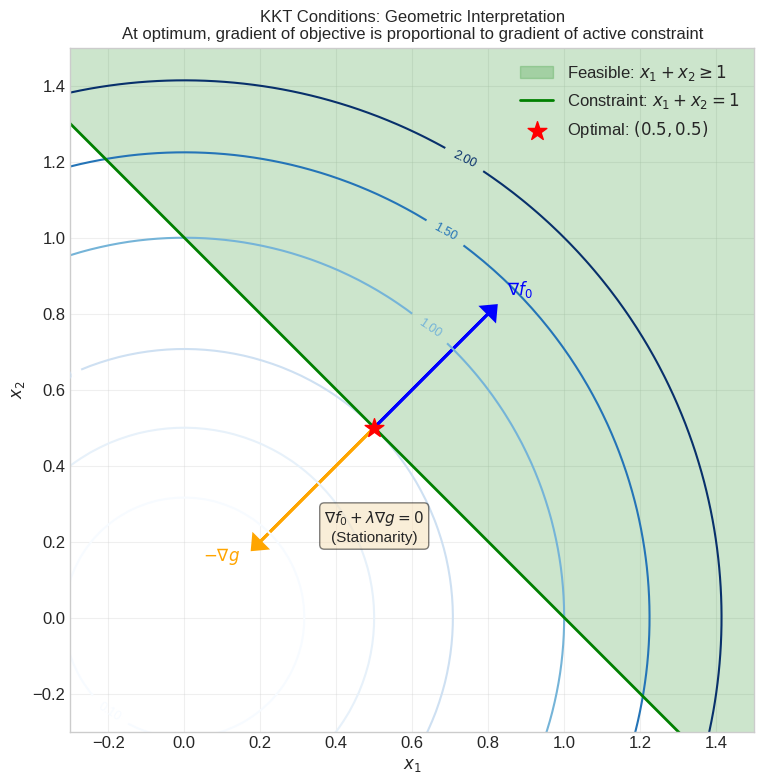

🔑 At the optimum, the gradient of the objective points in the direction
   opposite to the feasible region — exactly balanced by the constraint gradient.


In [30]:
# =============================================================================
# Visualization: KKT Conditions Geometrically
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

# Create grid
x1 = np.linspace(-0.5, 2, 100)
x2 = np.linspace(-0.5, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Objective function contours: x₁² + x₂²
Z = X1**2 + X2**2
contours = ax.contour(X1, X2, Z, levels=[0.1, 0.25, 0.5, 1, 1.5, 2], cmap='Blues')
ax.clabel(contours, inline=True, fontsize=9, fmt='%.2f')

# Feasible region: x₁ + x₂ ≥ 1
ax.fill_between(x1, np.maximum(1 - x1, -0.5), 2, alpha=0.2, color='green', 
                label='Feasible: $x_1 + x_2 \\geq 1$')
ax.plot(x1, 1 - x1, 'g-', linewidth=2, label='Constraint: $x_1 + x_2 = 1$')

# Optimal point
ax.scatter([0.5], [0.5], s=200, color='red', marker='*', zorder=10, 
           label=f'Optimal: $(0.5, 0.5)$')

# Gradients at optimal point
# Gradient of objective: (2x₁, 2x₂) = (1, 1) at x* = (0.5, 0.5)
# Gradient of constraint g = 1 - x₁ - x₂: (-1, -1)
scale = 0.3
ax.arrow(0.5, 0.5, scale*1, scale*1, head_width=0.05, head_length=0.03, 
         fc='blue', ec='blue', linewidth=2)
ax.annotate('$\\nabla f_0$', (0.5 + scale + 0.05, 0.5 + scale + 0.05), color='blue', fontsize=12)

ax.arrow(0.5, 0.5, scale*(-1), scale*(-1), head_width=0.05, head_length=0.03, 
         fc='orange', ec='orange', linewidth=2)
ax.annotate('$-\\nabla g$', (0.5 - scale - 0.15, 0.5 - scale - 0.05), color='orange', fontsize=12)

# Show that gradients are aligned (KKT stationarity)
ax.annotate('$\\nabla f_0 + \\lambda \\nabla g = 0$\n(Stationarity)', 
            (0.5, 0.2), fontsize=11, ha='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.set_xlim(-0.3, 1.5)
ax.set_ylim(-0.3, 1.5)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_title('KKT Conditions: Geometric Interpretation\n' + 
             'At optimum, gradient of objective is proportional to gradient of active constraint', 
             fontsize=12)
ax.legend(loc='upper right')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/kkt_geometric.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("🔑 At the optimum, the gradient of the objective points in the direction")
print("   opposite to the feasible region — exactly balanced by the constraint gradient.")

## 6.6 Sensitivity Analysis and Interpretation

### 6.6.1 Shadow Prices

The dual variables have an important economic interpretation as **shadow prices**:

$$\lambda_i^* \approx -\frac{\partial p^*}{\partial b_i}$$

Where $b_i$ is the right-hand side of constraint $f_i(x) \leq b_i$ (perturbed from 0).

**Interpretation**: $\lambda_i^*$ tells us how much the optimal value would improve if we relaxed constraint $i$ slightly.

### 6.6.2 Economic Interpretation

Consider a resource allocation problem:

- $\lambda_i^*$ = marginal value of resource $i$
- If $\lambda_i^* > 0$: resource $i$ is scarce (constraint is active)
- If $\lambda_i^* = 0$: resource $i$ is abundant (constraint is slack)

### 6.6.3 Example: Manufacturing

If a manufacturing problem has $\lambda_{\text{labor}}^* = 5$, this means:

- One additional hour of labor would increase profit by $5
- We should be willing to pay up to $5/hour for more labor

---

## 6.7 Exercises - Chapter 6

### Exercise 6.1 (Easy): Lagrangian

Write the Lagrangian for:
$$\min x^2 + y^2 \text{ s.t. } x + 2y = 3$$

### Exercise 6.2 (Medium): KKT Conditions

Solve using KKT conditions:
$$\min (x-2)^2 + (y-1)^2 \text{ s.t. } x + y \leq 2, x \geq 0, y \geq 0$$

### Exercise 6.3 (Medium): Dual Problem

Derive the dual of:
$$\min c^T x \text{ s.t. } Ax = b, x \geq 0$$

### Exercise 6.4 (Challenging): Strong Duality

For QP: $\min \frac{1}{2}x^T Px + q^T x$ s.t. $Ax \leq b$:

1. Write the Lagrangian
2. Derive the dual function
3. Write the dual problem

---

## 6.8 Chapter 6 Summary

### Key Concepts

| Concept            | Definition                                                       | Importance                |
| ------------------ | ---------------------------------------------------------------- | ------------------------- |
| **Lagrangian**     | $L(x, \lambda, \nu) = f_0 + \sum \lambda_i f_i + \sum \nu_j h_j$ | Incorporates constraints  |
| **Dual function**  | $g(\lambda, \nu) = \inf_x L(x, \lambda, \nu)$                    | Gives lower bounds        |
| **Weak duality**   | $d^* \leq p^*$                                                   | Always holds              |
| **Strong duality** | $d^* = p^*$                                                      | Holds for convex + Slater |
| **KKT conditions** | Necessary & sufficient for optimality                            | Central to algorithms     |

### KKT Conditions Summary

1. **Primal feasibility**: Satisfy constraints
2. **Dual feasibility**: $\lambda \geq 0$
3. **Complementary slackness**: $\lambda_i f_i(x) = 0$
4. **Stationarity**: $\nabla_x L = 0$

### Looking Ahead

With duality and KKT conditions understood, we're ready to study **algorithms** in Chapter 7 — the computational methods that actually solve optimization problems.


---
# Chapter 7: Optimization Algorithms
---

## 7.1 Introduction to Optimization Algorithms

Now that we understand the theory of convex optimization, we turn to **algorithms** — the computational methods that actually find optimal solutions.

### 7.1.1 Why Study Algorithms?

1. **Theory meets practice**: Understanding algorithms helps debug optimization code
2. **Algorithm selection**: Different problems favor different algorithms
3. **Hyperparameter tuning**: Step sizes, tolerances, stopping criteria
4. **Scalability**: Knowing complexity helps with large problems

### 7.1.2 Algorithm Categories

| Category           | Idea                      | Examples                           |
| ------------------ | ------------------------- | ---------------------------------- |
| **First-order**    | Use gradients             | Gradient descent, proximal methods |
| **Second-order**   | Use gradients + Hessians  | Newton's method                    |
| **Interior-point** | Follow central path       | Barrier methods                    |
| **Specialized**    | Exploit problem structure | Simplex, ADMM                      |

### 7.1.3 Convergence Concepts

**Convergence rate** describes how quickly $f(x_k) \to f(x^*)$:

- **Linear**: $f(x_{k+1}) - f^* \leq c \cdot (f(x_k) - f^*)$ for some $c < 1$
- **Superlinear**: $\frac{f(x_{k+1}) - f^*}{f(x_k) - f^*} \to 0$
- **Quadratic**: $f(x_{k+1}) - f^* \leq c \cdot (f(x_k) - f^*)^2$

---

## 7.2 Gradient Descent

### 7.2.1 The Basic Idea

**Gradient descent** is the workhorse of optimization:

$$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$$

Where:

- $x_k$ = current iterate
- $\alpha_k$ = step size (learning rate)
- $\nabla f(x_k)$ = gradient (direction of steepest ascent)

**Intuition**: Move in the negative gradient direction (steepest descent).

### 7.2.2 Why It Works (for Convex Functions)

For convex $f$, the gradient always points toward higher values:

$$f(y) \geq f(x) + \nabla f(x)^T (y - x)$$

Moving against the gradient decreases $f$.

### 7.2.3 Step Size Selection

The step size $\alpha_k$ is critical:

| Strategy              | Rule                                                       | Properties             |
| --------------------- | ---------------------------------------------------------- | ---------------------- |
| **Constant**          | $\alpha_k = \alpha$                                        | Simple, may diverge    |
| **Diminishing**       | $\alpha_k = \frac{1}{k}$                                   | Guaranteed convergence |
| **Exact line search** | $\alpha_k = \arg\min_\alpha f(x_k - \alpha \nabla f(x_k))$ | Optimal per step       |
| **Backtracking**      | Start large, reduce until Armijo condition                 | Practical choice       |

**Armijo condition** (backtracking line search):
$$f(x_k - \alpha \nabla f) \leq f(x_k) - c \cdot \alpha \|\nabla f\|^2$$

Typically $c = 0.5$ and reduce $\alpha \leftarrow \beta \alpha$ (usually $\beta = 0.5$).


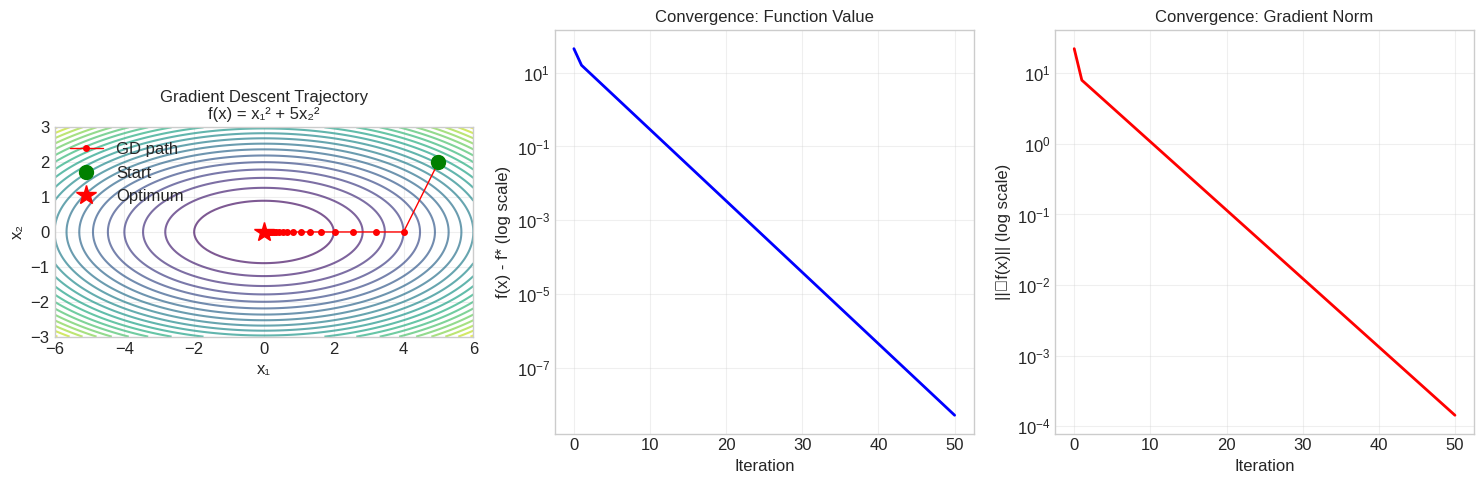


Starting point: [5. 2.]
Final point: [7.13623846e-05 0.00000000e+00]
Final function value: 5.09e-09
Iterations: 50


In [31]:
# =============================================================================
# GRADIENT DESCENT IMPLEMENTATION AND VISUALIZATION
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a quadratic function: f(x) = x^T A x / 2 + b^T x
# We'll use f(x,y) = x^2 + 5y^2 (poorly conditioned - shows slow convergence)
def f_quadratic(x):
    return x[0]**2 + 5*x[1]**2

def grad_f_quadratic(x):
    return np.array([2*x[0], 10*x[1]])

# Gradient descent implementation
def gradient_descent(f, grad_f, x0, alpha=0.1, max_iters=100, tol=1e-6):
    """
    Gradient descent with constant step size.
    
    Parameters:
    -----------
    f : function - Objective function
    grad_f : function - Gradient function
    x0 : array - Starting point
    alpha : float - Step size
    max_iters : int - Maximum iterations
    tol : float - Tolerance for convergence
    
    Returns:
    --------
    x_history : list - All iterates
    f_history : list - Function values
    """
    x = x0.copy()
    x_history = [x.copy()]
    f_history = [f(x)]
    
    for k in range(max_iters):
        g = grad_f(x)
        
        # Check convergence
        if np.linalg.norm(g) < tol:
            print(f"Converged at iteration {k}")
            break
        
        # Update step
        x = x - alpha * g
        
        x_history.append(x.copy())
        f_history.append(f(x))
    
    return np.array(x_history), np.array(f_history)

# Run gradient descent
x0 = np.array([5.0, 2.0])
x_hist, f_hist = gradient_descent(f_quadratic, grad_f_quadratic, x0, alpha=0.1, max_iters=50)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Contour plot with trajectory
ax1 = axes[0]
x = np.linspace(-6, 6, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + 5*Y**2

ax1.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
ax1.plot(x_hist[:, 0], x_hist[:, 1], 'ro-', markersize=4, linewidth=1, label='GD path')
ax1.plot(x_hist[0, 0], x_hist[0, 1], 'go', markersize=10, label='Start')
ax1.plot(0, 0, 'r*', markersize=15, label='Optimum')
ax1.set_xlabel('x₁', fontsize=12)
ax1.set_ylabel('x₂', fontsize=12)
ax1.set_title('Gradient Descent Trajectory\nf(x) = x₁² + 5x₂²', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: Convergence of function value
ax2 = axes[1]
ax2.semilogy(f_hist, 'b-', linewidth=2)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('f(x) - f* (log scale)', fontsize=12)
ax2.set_title('Convergence: Function Value', fontsize=12)
ax2.grid(True, alpha=0.3)

# Plot 3: Convergence of gradient norm
grad_norms = [np.linalg.norm(grad_f_quadratic(x)) for x in x_hist]
ax3 = axes[2]
ax3.semilogy(grad_norms, 'r-', linewidth=2)
ax3.set_xlabel('Iteration', fontsize=12)
ax3.set_ylabel('||∇f(x)|| (log scale)', fontsize=12)
ax3.set_title('Convergence: Gradient Norm', fontsize=12)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('media/images/gradient_descent.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nStarting point: {x0}")
print(f"Final point: {x_hist[-1]}")
print(f"Final function value: {f_hist[-1]:.2e}")
print(f"Iterations: {len(f_hist) - 1}")

### 7.2.4 Convergence Analysis

For **smooth convex functions** with Lipschitz continuous gradient (constant $L$):

$$\|\nabla f(x) - \nabla f(y)\| \leq L \|x - y\|$$

With step size $\alpha = \frac{1}{L}$:

$$f(x_k) - f^* \leq \frac{L \|x_0 - x^*\|^2}{2k}$$

This is **sublinear** convergence: $O(1/k)$.

For **strongly convex** functions (parameter $\mu > 0$):

$$f(x_k) - f^* \leq \left(1 - \frac{\mu}{L}\right)^k (f(x_0) - f^*)$$

This is **linear** convergence, with rate depending on **condition number** $\kappa = L/\mu$.

### 7.2.5 The Condition Number Problem

The **condition number** $\kappa = L/\mu$ determines convergence speed:

- $\kappa$ close to 1: Fast convergence (well-conditioned)
- $\kappa \gg 1$: Slow convergence (ill-conditioned)

For quadratic $f(x) = \frac{1}{2}x^T A x$:
$$\kappa = \frac{\lambda_{\max}(A)}{\lambda_{\min}(A)}$$

---

## 7.3 Accelerated Methods

### 7.3.1 Momentum (Heavy Ball Method)

**Problem**: Gradient descent oscillates in poorly conditioned problems.

**Solution**: Add momentum to smooth the trajectory:

$$x_{k+1} = x_k - \alpha \nabla f(x_k) + \beta(x_k - x_{k-1})$$

Where $\beta \in [0, 1)$ is the momentum coefficient.

**Intuition**: Like a ball rolling downhill, momentum helps continue in good directions.

### 7.3.2 Nesterov Accelerated Gradient (NAG)

Nesterov's key insight: Look ahead before computing the gradient.

$$y_k = x_k + \beta(x_k - x_{k-1})$$
$$x_{k+1} = y_k - \alpha \nabla f(y_k)$$

This achieves **optimal** convergence rate for first-order methods:

$$f(x_k) - f^* \leq O\left(\frac{1}{k^2}\right)$$

This is a dramatic improvement over vanilla gradient descent's $O(1/k)$!


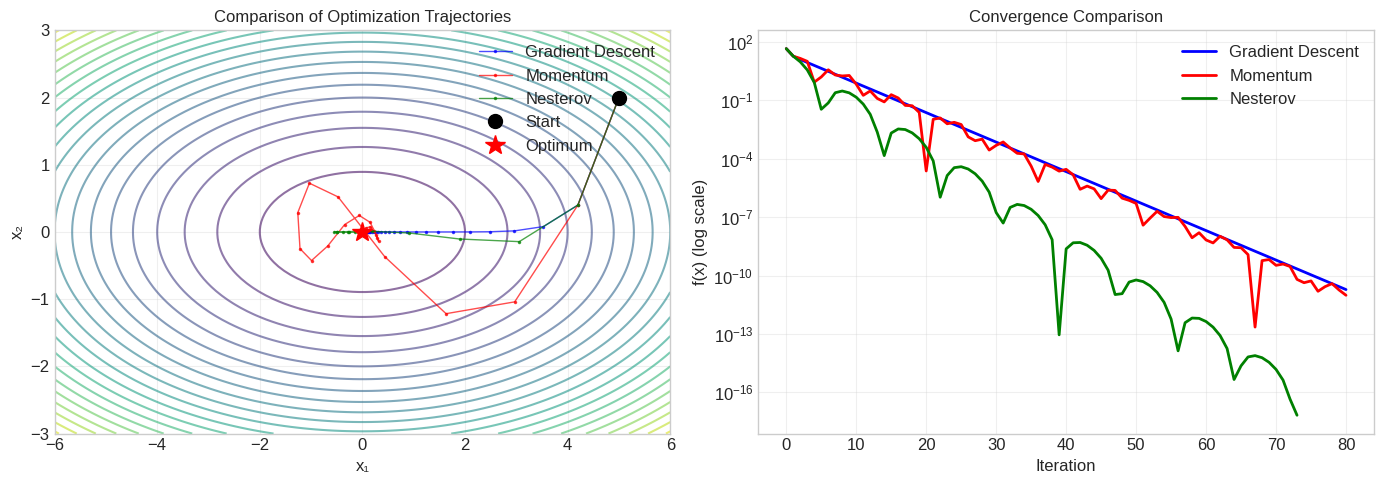


Convergence Summary:
Method               Final f(x)      Iterations
---------------------------------------------
Gradient Descent     1.92e-11        81        
Momentum             9.76e-12        81        
Nesterov             6.74e-18        74        


In [32]:
# =============================================================================
# COMPARING: GRADIENT DESCENT, MOMENTUM, AND NESTEROV
# =============================================================================

def gradient_descent_momentum(f, grad_f, x0, alpha=0.1, beta=0.9, max_iters=100, tol=1e-8):
    """Gradient descent with momentum."""
    x = x0.copy()
    x_prev = x0.copy()
    x_history = [x.copy()]
    
    for k in range(max_iters):
        g = grad_f(x)
        if np.linalg.norm(g) < tol:
            break
        
        # Momentum update
        x_new = x - alpha * g + beta * (x - x_prev)
        x_prev = x.copy()
        x = x_new
        
        x_history.append(x.copy())
    
    return np.array(x_history)

def nesterov_accelerated(f, grad_f, x0, alpha=0.1, beta=0.9, max_iters=100, tol=1e-8):
    """Nesterov Accelerated Gradient."""
    x = x0.copy()
    x_prev = x0.copy()
    x_history = [x.copy()]
    
    for k in range(max_iters):
        # Look-ahead step
        y = x + beta * (x - x_prev)
        g = grad_f(y)
        
        if np.linalg.norm(grad_f(x)) < tol:
            break
        
        # Update
        x_new = y - alpha * g
        x_prev = x.copy()
        x = x_new
        
        x_history.append(x.copy())
    
    return np.array(x_history)

# Run all three methods
x0 = np.array([5.0, 2.0])
alpha = 0.08

gd_hist = gradient_descent(f_quadratic, grad_f_quadratic, x0, alpha=alpha, max_iters=80)[0]
mom_hist = gradient_descent_momentum(f_quadratic, grad_f_quadratic, x0, alpha=alpha, beta=0.7, max_iters=80)
nag_hist = nesterov_accelerated(f_quadratic, grad_f_quadratic, x0, alpha=alpha, beta=0.7, max_iters=80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Trajectories
ax1 = axes[0]
x = np.linspace(-6, 6, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + 5*Y**2

ax1.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
ax1.plot(gd_hist[:, 0], gd_hist[:, 1], 'b.-', markersize=3, linewidth=1, alpha=0.7, label='Gradient Descent')
ax1.plot(mom_hist[:, 0], mom_hist[:, 1], 'r.-', markersize=3, linewidth=1, alpha=0.7, label='Momentum')
ax1.plot(nag_hist[:, 0], nag_hist[:, 1], 'g.-', markersize=3, linewidth=1, alpha=0.7, label='Nesterov')
ax1.plot(x0[0], x0[1], 'ko', markersize=10, label='Start')
ax1.plot(0, 0, 'r*', markersize=15, label='Optimum')
ax1.set_xlabel('x₁', fontsize=12)
ax1.set_ylabel('x₂', fontsize=12)
ax1.set_title('Comparison of Optimization Trajectories', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-6, 6)
ax1.set_ylim(-3, 3)

# Plot 2: Convergence comparison
ax2 = axes[1]
gd_f = [f_quadratic(x) for x in gd_hist]
mom_f = [f_quadratic(x) for x in mom_hist]
nag_f = [f_quadratic(x) for x in nag_hist]

ax2.semilogy(gd_f, 'b-', linewidth=2, label='Gradient Descent')
ax2.semilogy(mom_f, 'r-', linewidth=2, label='Momentum')
ax2.semilogy(nag_f, 'g-', linewidth=2, label='Nesterov')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('f(x) (log scale)', fontsize=12)
ax2.set_title('Convergence Comparison', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('media/images/accelerated_methods.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nConvergence Summary:")
print(f"{'Method':<20} {'Final f(x)':<15} {'Iterations':<10}")
print("-" * 45)
print(f"{'Gradient Descent':<20} {gd_f[-1]:<15.2e} {len(gd_f):<10}")
print(f"{'Momentum':<20} {mom_f[-1]:<15.2e} {len(mom_f):<10}")
print(f"{'Nesterov':<20} {nag_f[-1]:<15.2e} {len(nag_f):<10}")

---

## 7.4 Newton's Method

### 7.4.1 The Idea: Use Curvature Information

**Newton's method** uses second-order information (Hessian) for faster convergence:

$$x_{k+1} = x_k - [\nabla^2 f(x_k)]^{-1} \nabla f(x_k)$$

Or equivalently, solve the **Newton system**:
$$\nabla^2 f(x_k) \Delta x = -\nabla f(x_k)$$
$$x_{k+1} = x_k + \Delta x$$

### 7.4.2 Geometric Interpretation

Newton's method minimizes the **quadratic approximation** at each step:

$$f(x + \Delta x) \approx f(x) + \nabla f(x)^T \Delta x + \frac{1}{2} \Delta x^T \nabla^2 f(x) \Delta x$$

Setting the gradient of this approximation to zero gives the Newton step.

### 7.4.3 Convergence Properties

**Near the optimum**, Newton's method has **quadratic convergence**:

$$\|x_{k+1} - x^*\| \leq C \|x_k - x^*\|^2$$

This means digits of accuracy roughly **double** each iteration!

**But**: May diverge if started far from optimum.

### 7.4.4 Damped Newton's Method

To ensure global convergence, use **backtracking line search**:

$$x_{k+1} = x_k + \alpha_k \Delta x_{\text{Newton}}$$

Where $\alpha_k$ satisfies the Armijo condition.

### 7.4.5 Computational Cost

| Operation           | Cost     |
| ------------------- | -------- |
| Gradient            | $O(n)$   |
| Hessian             | $O(n^2)$ |
| Solve Newton system | $O(n^3)$ |

For large $n$, the $O(n^3)$ cost is prohibitive → use **quasi-Newton methods**.


Newton converged at iteration 2


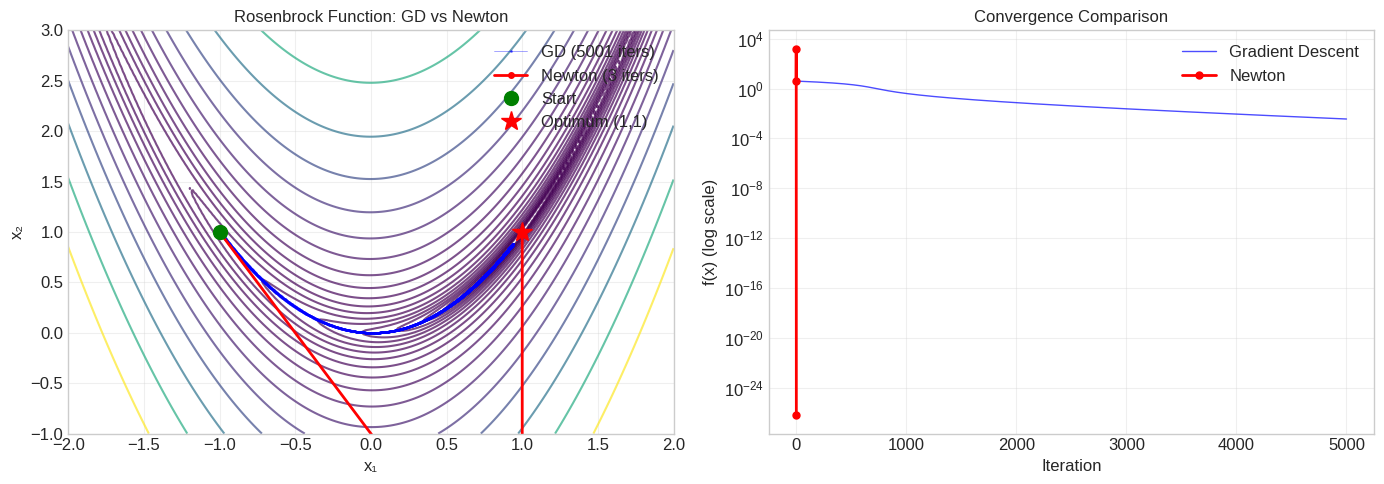


Comparison on Rosenbrock Function:
Method               Iterations   Final f(x)      Final point
----------------------------------------------------------------------
Gradient Descent     5001         3.63e-03        (0.9398, 0.8830)
Newton               3            6.16e-27        (1.0000, 1.0000)


In [33]:
# =============================================================================
# NEWTON'S METHOD IMPLEMENTATION AND COMPARISON
# =============================================================================

def newtons_method(f, grad_f, hess_f, x0, max_iters=20, tol=1e-10):
    """
    Newton's method for unconstrained optimization.
    
    Parameters:
    -----------
    f : function - Objective function
    grad_f : function - Gradient function
    hess_f : function - Hessian function
    x0 : array - Starting point
    
    Returns:
    --------
    x_history : list - All iterates
    """
    x = x0.copy()
    x_history = [x.copy()]
    
    for k in range(max_iters):
        g = grad_f(x)
        H = hess_f(x)
        
        # Check convergence
        if np.linalg.norm(g) < tol:
            print(f"Newton converged at iteration {k}")
            break
        
        # Newton step
        delta_x = np.linalg.solve(H, -g)
        x = x + delta_x
        
        x_history.append(x.copy())
    
    return np.array(x_history)

# Define the Rosenbrock function (challenging non-quadratic)
def rosenbrock(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

def grad_rosenbrock(x):
    dx0 = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    dx1 = 200*(x[1] - x[0]**2)
    return np.array([dx0, dx1])

def hess_rosenbrock(x):
    h11 = 2 - 400*x[1] + 1200*x[0]**2
    h12 = -400*x[0]
    h21 = -400*x[0]
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])

# Compare GD and Newton on Rosenbrock
x0 = np.array([-1.0, 1.0])

# Gradient descent (needs many iterations)
gd_hist_rosen = gradient_descent(rosenbrock, grad_rosenbrock, x0, alpha=0.001, max_iters=5000, tol=1e-6)[0]

# Newton's method (very few iterations)
newton_hist = newtons_method(rosenbrock, grad_rosenbrock, hess_rosenbrock, x0, max_iters=50)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Contours with trajectories
ax1 = axes[0]
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100*(Y - X**2)**2

# Log scale for Rosenbrock contours
levels = np.logspace(-1, 3, 20)
ax1.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.7)
ax1.plot(gd_hist_rosen[:, 0], gd_hist_rosen[:, 1], 'b.-', markersize=2, linewidth=0.5, alpha=0.5, label=f'GD ({len(gd_hist_rosen)} iters)')
ax1.plot(newton_hist[:, 0], newton_hist[:, 1], 'r.-', markersize=8, linewidth=2, label=f'Newton ({len(newton_hist)} iters)')
ax1.plot(x0[0], x0[1], 'go', markersize=10, label='Start')
ax1.plot(1, 1, 'r*', markersize=15, label='Optimum (1,1)')
ax1.set_xlabel('x₁', fontsize=12)
ax1.set_ylabel('x₂', fontsize=12)
ax1.set_title('Rosenbrock Function: GD vs Newton', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-2, 2)
ax1.set_ylim(-1, 3)

# Plot 2: Convergence
ax2 = axes[1]
gd_f_rosen = [rosenbrock(x) for x in gd_hist_rosen]
newton_f = [rosenbrock(x) for x in newton_hist]

ax2.semilogy(gd_f_rosen, 'b-', linewidth=1, alpha=0.7, label=f'Gradient Descent')
ax2.semilogy(range(len(newton_f)), newton_f, 'r.-', markersize=10, linewidth=2, label=f'Newton')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('f(x) (log scale)', fontsize=12)
ax2.set_title('Convergence Comparison', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('media/images/newton_method.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nComparison on Rosenbrock Function:")
print(f"{'Method':<20} {'Iterations':<12} {'Final f(x)':<15} {'Final point'}")
print("-" * 70)
print(f"{'Gradient Descent':<20} {len(gd_hist_rosen):<12} {gd_f_rosen[-1]:<15.2e} ({gd_hist_rosen[-1][0]:.4f}, {gd_hist_rosen[-1][1]:.4f})")
print(f"{'Newton':<20} {len(newton_hist):<12} {newton_f[-1]:<15.2e} ({newton_hist[-1][0]:.4f}, {newton_hist[-1][1]:.4f})")

---

## 7.5 Quasi-Newton Methods (BFGS)

### 7.5.1 The Idea

**Problem**: Computing Hessian is expensive ($O(n^2)$ storage, $O(n^3)$ inversion).

**Solution**: Approximate the Hessian using only gradient information.

### 7.5.2 BFGS Algorithm

The **BFGS** (Broyden-Fletcher-Goldfarb-Shanno) method maintains an approximation $B_k \approx \nabla^2 f(x_k)^{-1}$:

$$x_{k+1} = x_k - \alpha_k B_k \nabla f(x_k)$$

**Update rule**:
$$s_k = x_{k+1} - x_k$$
$$y_k = \nabla f(x_{k+1}) - \nabla f(x_k)$$
$$B_{k+1} = \left(I - \frac{s_k y_k^T}{y_k^T s_k}\right) B_k \left(I - \frac{y_k s_k^T}{y_k^T s_k}\right) + \frac{s_k s_k^T}{y_k^T s_k}$$

### 7.5.3 Properties

| Property | Value |
|----------|-------|
| **Storage** | $O(n^2)$ |
| **Per-iteration** | $O(n^2)$ |
| **Convergence** | Superlinear |
| **Requires** | Only gradients |

BFGS is the **default choice** for medium-sized unconstrained problems.

### 7.5.4 L-BFGS (Limited Memory)

For very large problems, store only the last $m$ vectors $\{s_k, y_k\}$:
- **Storage**: $O(mn)$ instead of $O(n^2)$
- Used in large-scale machine learning

---

## 7.6 Constrained Optimization Algorithms

### 7.6.1 Equality Constraints: Newton's Method with KKT

For $\min f(x)$ s.t. $Ax = b$, solve the KKT system:

$$\begin{bmatrix} \nabla^2 f(x) & A^T \\ A & 0 \end{bmatrix} \begin{bmatrix} \Delta x \\ \nu \end{bmatrix} = \begin{bmatrix} -\nabla f(x) \\ 0 \end{bmatrix}$$

### 7.6.2 Inequality Constraints: Interior Point Methods

For problems with inequality constraints $f_i(x) \leq 0$:

**Barrier Method**: Convert to unconstrained by adding barrier:
$$\min f_0(x) - \frac{1}{t} \sum_i \log(-f_i(x))$$

As $t \to \infty$, the solution approaches the constrained optimum.

### 7.6.3 Central Path

The **central path** is the set of solutions:
$$x^*(t) = \arg\min \left( t f_0(x) + \phi(x) \right)$$

Where $\phi(x) = -\sum_i \log(-f_i(x))$ is the **log barrier**.

Interior point methods follow this path from $t$ small to $t$ large.


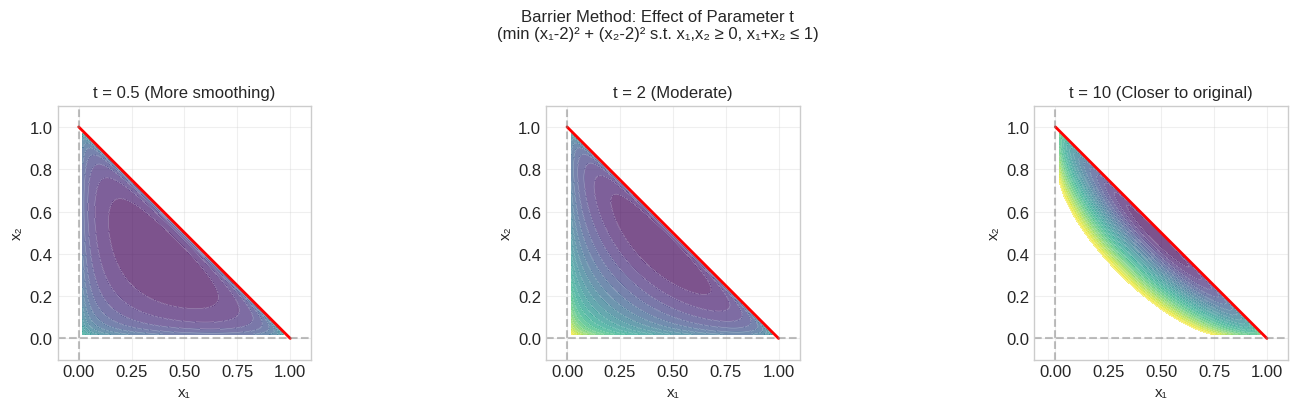

Barrier Method Intuition:
- Small t: Solution is the analytic center (away from constraints)
- Large t: Solution approaches the constrained optimum
- The central path connects analytic center to optimal solution


In [34]:
# =============================================================================
# INTERIOR POINT / BARRIER METHOD VISUALIZATION
# =============================================================================

def barrier_function(x, t, constraints):
    """
    Barrier method objective: t*f0(x) - sum(log(-fi(x)))
    
    Parameters:
    -----------
    x : array - Point
    t : float - Barrier parameter
    constraints : list of functions - Each returns fi(x), should be <= 0
    """
    # Objective (simple quadratic for demonstration)
    f0 = (x[0] - 2)**2 + (x[1] - 2)**2
    
    # Barrier term
    barrier = 0
    for fi in constraints:
        val = fi(x)
        if val >= 0:
            return np.inf
        barrier -= np.log(-val)
    
    return t * f0 + barrier

# Define constraints: x1 >= 0, x2 >= 0, x1 + x2 <= 1
# In standard form: -x1 <= 0, -x2 <= 0, x1 + x2 - 1 <= 0
constraints = [
    lambda x: -x[0],          # -x1 <= 0 (i.e., x1 >= 0)
    lambda x: -x[1],          # -x2 <= 0 (i.e., x2 >= 0)
    lambda x: x[0] + x[1] - 1  # x1 + x2 <= 1
]

# Visualize for different values of t
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

t_values = [0.5, 2, 10]
titles = ['t = 0.5 (More smoothing)', 't = 2 (Moderate)', 't = 10 (Closer to original)']

x = np.linspace(0.02, 0.98, 100)
y = np.linspace(0.02, 0.98, 100)
X, Y = np.meshgrid(x, y)

for ax, t, title in zip(axes, t_values, titles):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pt = np.array([X[i,j], Y[i,j]])
            # Only compute if inside feasible region
            if pt[0] + pt[1] < 1 and pt[0] > 0 and pt[1] > 0:
                Z[i,j] = barrier_function(pt, t, constraints)
            else:
                Z[i,j] = np.nan
    
    levels = np.linspace(np.nanmin(Z), np.nanmin(Z) + 10, 20)
    cs = ax.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.7)
    ax.contour(X, Y, Z, levels=levels, colors='white', linewidths=0.5, alpha=0.5)
    
    # Plot constraint boundary
    ax.plot([0, 1], [1, 0], 'r-', linewidth=2, label='x₁ + x₂ = 1')
    ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(0, color='gray', linestyle='--', alpha=0.5)
    
    # Find and plot approximate minimizer (analytic center shifts with t)
    # For large t, minimizer approaches (0, 0) on boundary
    ax.set_xlabel('x₁', fontsize=11)
    ax.set_ylabel('x₂', fontsize=11)
    ax.set_title(title, fontsize=12)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

plt.suptitle('Barrier Method: Effect of Parameter t\n(min (x₁-2)² + (x₂-2)² s.t. x₁,x₂ ≥ 0, x₁+x₂ ≤ 1)', fontsize=12, y=1.02)
plt.tight_layout()
plt.savefig('media/images/barrier_method.png', dpi=150, bbox_inches='tight')
plt.show()

print("Barrier Method Intuition:")
print("- Small t: Solution is the analytic center (away from constraints)")  
print("- Large t: Solution approaches the constrained optimum")
print("- The central path connects analytic center to optimal solution")

---

## 7.7 Using scipy.optimize in Practice

### 7.7.1 Unconstrained Minimization

```python
from scipy.optimize import minimize

result = minimize(fun, x0, method='BFGS', jac=grad)
```

### 7.7.2 Available Methods

| Method         | Type                  | Best For                   |
| -------------- | --------------------- | -------------------------- |
| `Nelder-Mead`  | Derivative-free       | No gradient available      |
| `BFGS`         | Quasi-Newton          | Medium smooth problems     |
| `L-BFGS-B`     | Quasi-Newton + bounds | Large problems with bounds |
| `CG`           | Conjugate gradient    | Large sparse problems      |
| `Newton-CG`    | Newton + CG           | When Hessian available     |
| `trust-constr` | Trust region          | Constrained problems       |
| `SLSQP`        | SQP                   | Constrained problems       |

### 7.7.3 Constrained Minimization

```python
# Equality constraint: h(x) = 0
eq_constraint = {'type': 'eq', 'fun': lambda x: h(x)}

# Inequality constraint: g(x) >= 0
ineq_constraint = {'type': 'ineq', 'fun': lambda x: g(x)}

result = minimize(fun, x0, method='SLSQP',
                  constraints=[eq_constraint, ineq_constraint])
```


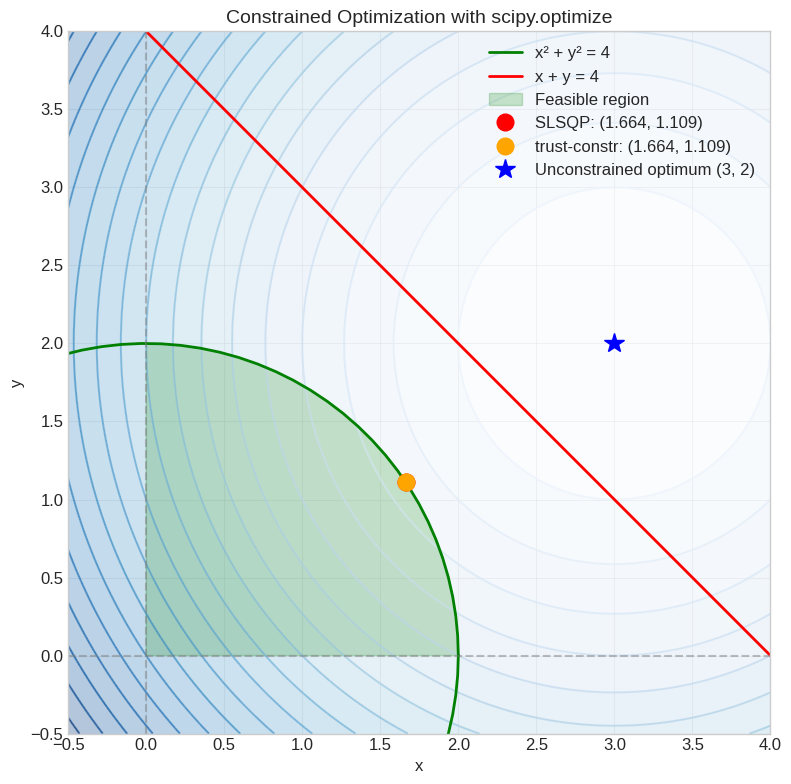


Results from scipy.optimize:

SLSQP:
  Optimal x: [1.664101, 1.109399]
  Optimal value: 2.577795
  Iterations: 7
  Success: True

trust-constr:
  Optimal x: [1.664101, 1.109400]
  Optimal value: 2.577795
  Iterations: 29
  Success: True


In [35]:
# =============================================================================
# PRACTICAL EXAMPLE: SCIPY.OPTIMIZE FOR CONSTRAINED PROBLEM
# =============================================================================
from scipy.optimize import minimize

# Problem: Minimize (x-3)² + (y-2)² subject to:
# - x + y <= 4
# - x >= 0, y >= 0
# - x² + y² <= 4 (inside circle of radius 2)

def objective(x):
    return (x[0] - 3)**2 + (x[1] - 2)**2

def grad_objective(x):
    return np.array([2*(x[0] - 3), 2*(x[1] - 2)])

# Constraints (scipy uses g(x) >= 0 convention for 'ineq')
constraints = [
    {'type': 'ineq', 'fun': lambda x: 4 - x[0] - x[1]},      # x + y <= 4
    {'type': 'ineq', 'fun': lambda x: x[0]},                   # x >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]},                   # y >= 0
    {'type': 'ineq', 'fun': lambda x: 4 - x[0]**2 - x[1]**2}  # x² + y² <= 4
]

# Solve with different methods
x0 = np.array([0.5, 0.5])

methods = ['SLSQP', 'trust-constr']
results = {}

for method in methods:
    result = minimize(objective, x0, method=method, jac=grad_objective,
                     constraints=constraints, options={'disp': False})
    results[method] = result

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Create grid for contours
x = np.linspace(-0.5, 4, 200)
y = np.linspace(-0.5, 4, 200)
X, Y = np.meshgrid(x, y)
Z = (X - 3)**2 + (Y - 2)**2

# Plot contours
ax.contour(X, Y, Z, levels=20, cmap='Blues', alpha=0.6)
ax.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.3)

# Plot constraints
theta = np.linspace(0, 2*np.pi, 100)
circle_x = 2 * np.cos(theta)
circle_y = 2 * np.sin(theta)
ax.plot(circle_x, circle_y, 'g-', linewidth=2, label='x² + y² = 4')

ax.plot([0, 4], [4, 0], 'r-', linewidth=2, label='x + y = 4')
ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Shade feasible region (approximate)
theta_feas = np.linspace(0, np.pi/2, 100)
feas_x = 2 * np.cos(theta_feas)
feas_y = 2 * np.sin(theta_feas)
ax.fill(np.concatenate([[0], feas_x, [0]]), 
        np.concatenate([[0], feas_y, [0]]), 
        alpha=0.2, color='green', label='Feasible region')

# Plot results
colors = {'SLSQP': 'red', 'trust-constr': 'orange'}
for method, result in results.items():
    ax.plot(result.x[0], result.x[1], 'o', color=colors[method], 
            markersize=12, label=f'{method}: ({result.x[0]:.3f}, {result.x[1]:.3f})')

# Plot unconstrained optimum
ax.plot(3, 2, 'b*', markersize=15, label='Unconstrained optimum (3, 2)')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Constrained Optimization with scipy.optimize', fontsize=14)
ax.legend(loc='upper right')
ax.set_xlim(-0.5, 4)
ax.set_ylim(-0.5, 4)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('media/images/scipy_constrained.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nResults from scipy.optimize:")
print("=" * 60)
for method, result in results.items():
    print(f"\n{method}:")
    print(f"  Optimal x: [{result.x[0]:.6f}, {result.x[1]:.6f}]")
    print(f"  Optimal value: {result.fun:.6f}")
    print(f"  Iterations: {result.nit}")
    print(f"  Success: {result.success}")

---

## 7.8 Algorithm Selection Guide

### 7.8.1 Decision Tree

```
Is the problem convex?
├── Yes
│   ├── Unconstrained?
│   │   ├── Small (n < 1000): BFGS
│   │   └── Large: L-BFGS
│   ├── Only bounds?
│   │   └── L-BFGS-B
│   ├── Linear constraints?
│   │   └── Active set / Interior point
│   └── General constraints?
│       └── SLSQP / trust-constr
└── No
    └── Try convex relaxation, local methods, or global optimization
```

### 7.8.2 Complexity Summary

| Algorithm | Per-iteration | Convergence | Memory |
|-----------|---------------|-------------|--------|
| Gradient Descent | $O(n)$ | Sublinear | $O(n)$ |
| Momentum/NAG | $O(n)$ | Optimal first-order | $O(n)$ |
| Newton | $O(n^3)$ | Quadratic | $O(n^2)$ |
| BFGS | $O(n^2)$ | Superlinear | $O(n^2)$ |
| L-BFGS | $O(mn)$ | Superlinear | $O(mn)$ |
| Interior Point | $O(n^3)$ | Polynomial | $O(n^2)$ |

---

## 7.9 Exercises - Chapter 7

### Exercise 7.1 (Easy): Gradient Descent

Implement gradient descent for $f(x) = x^4 - 3x^2 + 2$. Find the minimizer starting from $x_0 = 2$.

### Exercise 7.2 (Medium): Step Size

For $f(x, y) = x^2 + 10y^2$:

1. What is the condition number?
2. Implement gradient descent with constant step size
3. What is the largest step size that still converges?

### Exercise 7.3 (Medium): Compare Methods

Compare gradient descent, momentum, and BFGS on the Rosenbrock function. Plot convergence curves.

### Exercise 7.4 (Challenging): Implement Backtracking

Implement backtracking line search with Armijo condition. Test on a function of your choice.

### Exercise 7.5 (Challenging): Constrained Problem

Solve: $\min x^2 + 2y^2$ s.t. $x + y = 1$, $x \geq 0$, $y \geq 0$

Use both analytical (KKT) and numerical (scipy) methods.

---

## 7.10 Chapter 7 Summary

### Key Algorithms

| Algorithm            | Key Idea                 | When to Use                      |
| -------------------- | ------------------------ | -------------------------------- |
| **Gradient Descent** | Follow negative gradient | Simple, large-scale              |
| **Momentum**         | Add velocity term        | Reduce oscillation               |
| **Newton**           | Use Hessian              | Fast convergence, small problems |
| **BFGS**             | Approximate Hessian      | Medium unconstrained             |
| **Interior Point**   | Follow central path      | Constrained problems             |

### Key Convergence Rates

| Rate               | Example               | Meaning                      |
| ------------------ | --------------------- | ---------------------------- |
| Sublinear $O(1/k)$ | GD on convex          | Slow                         |
| Linear             | GD on strongly convex | Constant factor improvement  |
| Superlinear        | BFGS                  | Better than linear           |
| Quadratic          | Newton                | Digits double each iteration |

### Looking Ahead

With algorithms understood, we're ready for **Chapter 8: Applications** — putting everything together on real-world problems!


---
# Chapter 8: Applications
---

## 8.1 Introduction

This chapter demonstrates how convex optimization is applied across diverse domains. We'll see that many seemingly different problems share common mathematical structures.

### 8.1.1 Why Applications Matter

1. **Motivation**: Seeing real applications makes theory concrete
2. **Modeling**: Learn to formulate problems as convex programs
3. **Software**: Practice with optimization tools
4. **Intuition**: Understand what makes problems tractable

### 8.1.2 Common Themes

Most applications follow a pattern:

1. **Identify decision variables** ($x$)
2. **Define objective** (what to minimize/maximize)
3. **Specify constraints** (physical, logical, resource limits)
4. **Verify convexity** (or convexify if needed)
5. **Solve and interpret**

---

## 8.2 Machine Learning Applications

### 8.2.1 Linear Regression as Optimization

**Problem**: Given data $(X, y)$, find weights $w$ that minimize prediction error.

**Ordinary Least Squares (OLS)**:
$$\min_w \|Xw - y\|_2^2$$

This is an **unconstrained quadratic program** with closed-form solution:
$$w^* = (X^T X)^{-1} X^T y$$

### 8.2.2 Ridge Regression (L2 Regularization)

Add regularization to prevent overfitting:
$$\min_w \|Xw - y\|_2^2 + \lambda \|w\|_2^2$$

This is still a **QP** with closed-form:
$$w^* = (X^T X + \lambda I)^{-1} X^T y$$

### 8.2.3 Lasso (L1 Regularization)

Use L1 penalty for **sparse** solutions:
$$\min_w \|Xw - y\|_2^2 + \lambda \|w\|_1$$

This is a **convex but non-smooth** problem. No closed form, but efficiently solvable.

**Why L1 gives sparsity**: The L1 ball has "corners" — optimal solutions tend to hit corners where some coefficients are exactly zero.


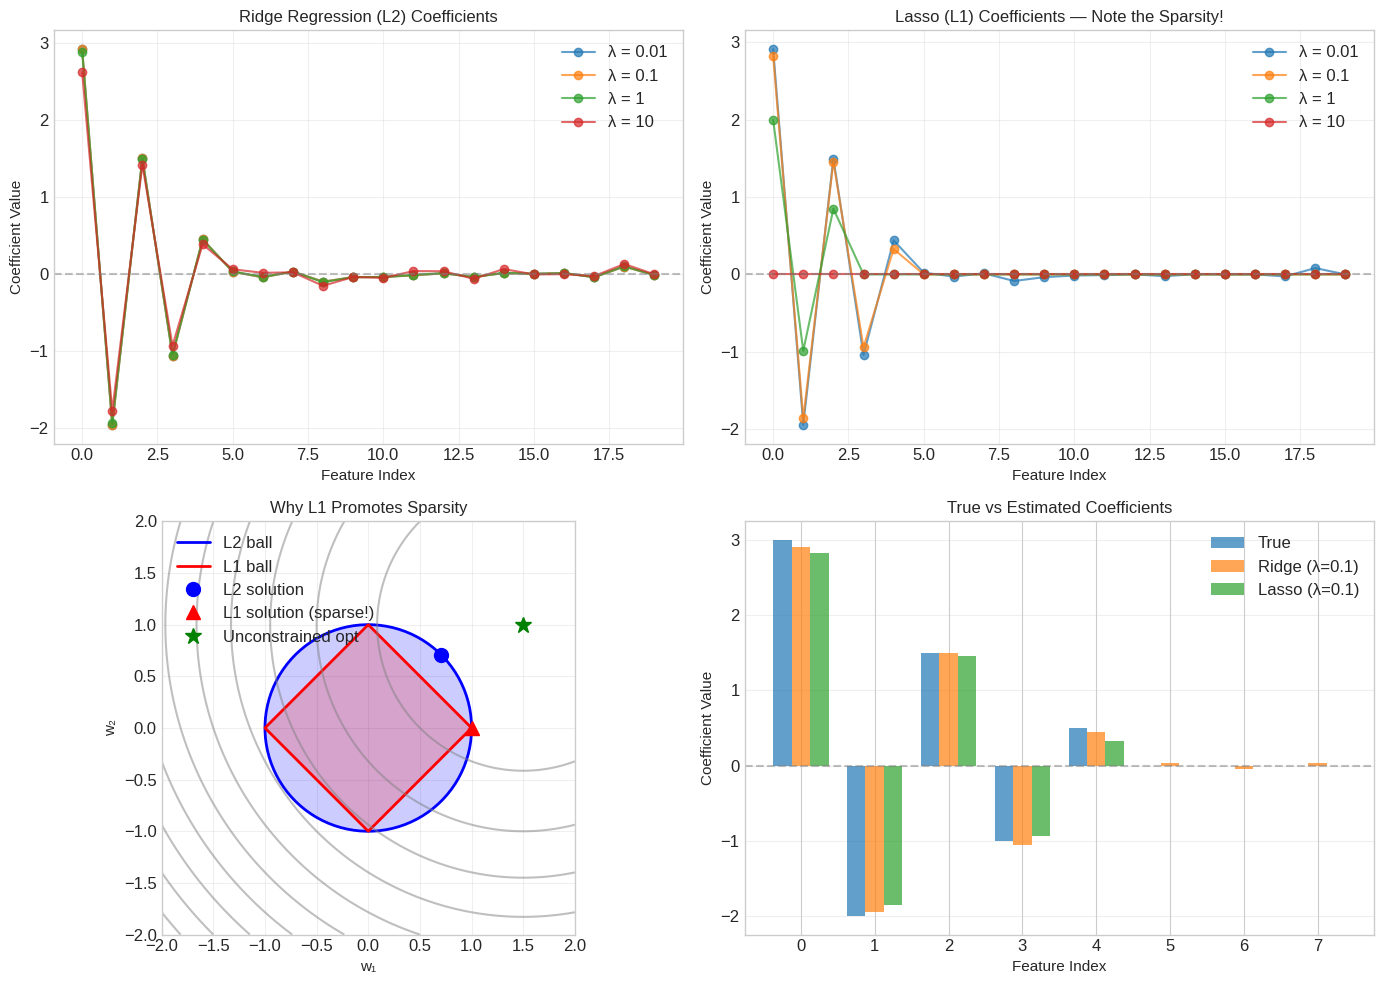


Sparsity Analysis (non-zero coefficients, |coef| > 0.01):
Lasso λ=0.01: 14 non-zero (out of 20)
Lasso λ=0.1: 5 non-zero (out of 20)
Lasso λ=1: 3 non-zero (out of 20)
Lasso λ=10: 0 non-zero (out of 20)


In [36]:
# =============================================================================
# REGULARIZATION: RIDGE VS LASSO
# =============================================================================
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with some irrelevant features
np.random.seed(42)
n_samples, n_features = 100, 20
n_informative = 5

# True coefficients (only first n_informative are non-zero)
true_coef = np.zeros(n_features)
true_coef[:n_informative] = np.array([3, -2, 1.5, -1, 0.5])

# Generate data
X = np.random.randn(n_samples, n_features)
y = X @ true_coef + 0.5 * np.random.randn(n_samples)

# Fit models
lambda_values = [0.01, 0.1, 1, 10]
ridge_coefs = []
lasso_coefs = []

for lam in lambda_values:
    ridge = Ridge(alpha=lam, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)
    
    lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=10000)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Ridge coefficients
ax1 = axes[0, 0]
for i, (coef, lam) in enumerate(zip(ridge_coefs, lambda_values)):
    ax1.plot(range(n_features), coef, 'o-', alpha=0.7, label=f'λ = {lam}')
ax1.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Feature Index', fontsize=11)
ax1.set_ylabel('Coefficient Value', fontsize=11)
ax1.set_title('Ridge Regression (L2) Coefficients', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Lasso coefficients
ax2 = axes[0, 1]
for i, (coef, lam) in enumerate(zip(lasso_coefs, lambda_values)):
    ax2.plot(range(n_features), coef, 'o-', alpha=0.7, label=f'λ = {lam}')
ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('Feature Index', fontsize=11)
ax2.set_ylabel('Coefficient Value', fontsize=11)
ax2.set_title('Lasso (L1) Coefficients — Note the Sparsity!', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: L1 vs L2 balls (why L1 gives sparsity)
ax3 = axes[1, 0]
theta = np.linspace(0, 2*np.pi, 100)

# L2 ball (circle)
l2_x = np.cos(theta)
l2_y = np.sin(theta)
ax3.plot(l2_x, l2_y, 'b-', linewidth=2, label='L2 ball')
ax3.fill(l2_x, l2_y, alpha=0.2, color='blue')

# L1 ball (diamond)
l1_x = [1, 0, -1, 0, 1]
l1_y = [0, 1, 0, -1, 0]
ax3.plot(l1_x, l1_y, 'r-', linewidth=2, label='L1 ball')
ax3.fill(l1_x, l1_y, alpha=0.2, color='red')

# Contour lines (objective function)
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X_grid, Y_grid = np.meshgrid(x, y)
Z = (X_grid - 1.5)**2 + (Y_grid - 1)**2
ax3.contour(X_grid, Y_grid, Z, levels=10, colors='gray', alpha=0.5)

# Optimal points
ax3.plot(1/np.sqrt(2), 1/np.sqrt(2), 'bo', markersize=10, label='L2 solution')
ax3.plot(1, 0, 'r^', markersize=10, label='L1 solution (sparse!)')
ax3.plot(1.5, 1, 'g*', markersize=12, label='Unconstrained opt')

ax3.set_xlabel('w₁', fontsize=11)
ax3.set_ylabel('w₂', fontsize=11)
ax3.set_title('Why L1 Promotes Sparsity', fontsize=12)
ax3.legend(loc='upper left')
ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)

# Plot 4: True vs estimated coefficients
ax4 = axes[1, 1]
width = 0.25
x_pos = np.arange(n_informative + 3)  # Show first few features
ax4.bar(x_pos - width, true_coef[:len(x_pos)], width, label='True', alpha=0.7)
ax4.bar(x_pos, ridge_coefs[1][:len(x_pos)], width, label='Ridge (λ=0.1)', alpha=0.7)
ax4.bar(x_pos + width, lasso_coefs[1][:len(x_pos)], width, label='Lasso (λ=0.1)', alpha=0.7)
ax4.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax4.set_xlabel('Feature Index', fontsize=11)
ax4.set_ylabel('Coefficient Value', fontsize=11)
ax4.set_title('True vs Estimated Coefficients', fontsize=12)
ax4.legend()
ax4.set_xticks(x_pos)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('media/images/regularization.png', dpi=150, bbox_inches='tight')
plt.show()

# Count non-zero coefficients
print("\nSparsity Analysis (non-zero coefficients, |coef| > 0.01):")
print("=" * 50)
for coef, lam in zip(lasso_coefs, lambda_values):
    n_nonzero = np.sum(np.abs(coef) > 0.01)
    print(f"Lasso λ={lam}: {n_nonzero} non-zero (out of {n_features})")

### 8.2.4 Support Vector Machines (SVM)

**Problem**: Find a hyperplane that separates two classes with maximum margin.

**Primal formulation**:
$$\min_{w, b} \frac{1}{2} \|w\|^2$$
$$\text{s.t. } y_i (w^T x_i + b) \geq 1, \quad i = 1, \ldots, n$$

This is a **quadratic program (QP)**.

**Dual formulation** (often more efficient):
$$\max_\alpha \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j (x_i^T x_j)$$
$$\text{s.t. } \alpha_i \geq 0, \quad \sum_i \alpha_i y_i = 0$$

**Key insight**: The dual only depends on inner products $x_i^T x_j$, enabling the **kernel trick**.

### 8.2.5 Logistic Regression

**Problem**: Classify with probabilistic output.

$$\min_w \sum_i \log(1 + \exp(-y_i w^T x_i)) + \lambda \|w\|^2$$

This is a **smooth convex** problem (sum of convex losses + convex regularizer).

---

## 8.3 Signal Processing Applications

### 8.3.1 Denoising

**Problem**: Recover signal $x$ from noisy observation $y = x + n$.

**Total Variation Denoising**:
$$\min_x \frac{1}{2}\|x - y\|_2^2 + \lambda \sum_i |x_{i+1} - x_i|$$

The TV term encourages **piecewise constant** solutions.

### 8.3.2 Compressed Sensing

**Problem**: Recover sparse signal $x$ from few measurements $y = Ax$ where $A$ is "fat" (more columns than rows).

$$\min_x \|x\|_1 \text{ s.t. } Ax = y$$

**Amazing result**: Under mild conditions, L1 minimization exactly recovers sparse signals!


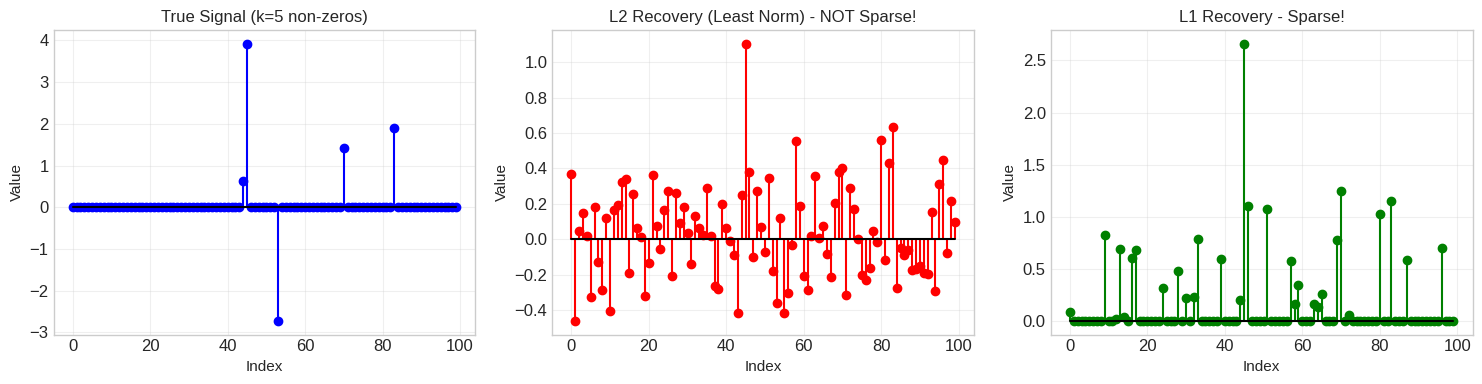


Compressed Sensing Results:
Problem: 100 unknowns, 30 measurements, 5 true non-zeros

Method          Error           Non-zeros      
---------------------------------------------
L1 (sparse)     4.3117          30             
L2 (dense)      4.6418          97             


In [37]:
# =============================================================================
# COMPRESSED SENSING DEMONSTRATION
# =============================================================================
from scipy.optimize import minimize, linprog

def l1_minimization(A, y):
    """
    Solve min ||x||_1 s.t. Ax = y using LP formulation.
    
    Reformulate as: min sum(u) s.t. Ax = y, -u <= x <= u
    Variables: [x; u]
    """
    m, n = A.shape
    
    # LP: min c^T z s.t. A_eq z = b_eq, bounds
    # z = [x (n vars), u (n vars)]
    c = np.concatenate([np.zeros(n), np.ones(n)])  # minimize sum(u)
    
    # Equality constraint: Ax = y (only on x part)
    A_eq = np.hstack([A, np.zeros((m, n))])
    b_eq = y
    
    # Inequality constraints: -u <= x <= u
    # Reformulated as: x - u <= 0, -x - u <= 0
    A_ub = np.vstack([
        np.hstack([np.eye(n), -np.eye(n)]),   # x - u <= 0
        np.hstack([-np.eye(n), -np.eye(n)])   # -x - u <= 0
    ])
    b_ub = np.zeros(2*n)
    
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, 
                     method='highs')
    
    return result.x[:n] if result.success else None

# Generate compressed sensing problem
np.random.seed(42)
n = 100  # Signal dimension
m = 30   # Number of measurements (m << n)
k = 5    # Sparsity (number of non-zero entries)

# True sparse signal
x_true = np.zeros(n)
support = np.random.choice(n, k, replace=False)
x_true[support] = np.random.randn(k) * 3

# Random measurement matrix
A = np.random.randn(m, n) / np.sqrt(m)

# Measurements
y = A @ x_true

# Recover using L1 minimization
x_recovered = l1_minimization(A, y)

# For comparison: least-norm solution (minimum L2 norm)
x_l2 = A.T @ np.linalg.solve(A @ A.T, y)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

ax1 = axes[0]
ax1.stem(range(n), x_true, markerfmt='bo', linefmt='b-', basefmt='k-')
ax1.set_xlabel('Index', fontsize=11)
ax1.set_ylabel('Value', fontsize=11)
ax1.set_title(f'True Signal (k={k} non-zeros)', fontsize=12)
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
ax2.stem(range(n), x_l2, markerfmt='ro', linefmt='r-', basefmt='k-')
ax2.set_xlabel('Index', fontsize=11)
ax2.set_ylabel('Value', fontsize=11)
ax2.set_title('L2 Recovery (Least Norm) - NOT Sparse!', fontsize=12)
ax2.grid(True, alpha=0.3)

ax3 = axes[2]
ax3.stem(range(n), x_recovered, markerfmt='go', linefmt='g-', basefmt='k-')
ax3.set_xlabel('Index', fontsize=11)
ax3.set_ylabel('Value', fontsize=11)
ax3.set_title('L1 Recovery - Sparse!', fontsize=12)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('media/images/compressed_sensing.png', dpi=150, bbox_inches='tight')
plt.show()

# Metrics
l1_error = np.linalg.norm(x_recovered - x_true)
l2_error = np.linalg.norm(x_l2 - x_true)
l1_nonzero = np.sum(np.abs(x_recovered) > 0.01)
l2_nonzero = np.sum(np.abs(x_l2) > 0.01)

print("\nCompressed Sensing Results:")
print("=" * 50)
print(f"Problem: {n} unknowns, {m} measurements, {k} true non-zeros")
print(f"\n{'Method':<15} {'Error':<15} {'Non-zeros':<15}")
print("-" * 45)
print(f"{'L1 (sparse)':<15} {l1_error:<15.4f} {l1_nonzero:<15}")
print(f"{'L2 (dense)':<15} {l2_error:<15.4f} {l2_nonzero:<15}")

---

## 8.4 Finance Applications

### 8.4.1 Portfolio Optimization (Markowitz Model)

**Problem**: Allocate wealth among $n$ assets to maximize return while controlling risk.

**Mean-Variance Optimization**:
$$\max_w \mu^T w - \frac{\lambda}{2} w^T \Sigma w$$
$$\text{s.t. } \mathbf{1}^T w = 1, \quad w \geq 0$$

Where:
- $w$ = portfolio weights
- $\mu$ = expected returns
- $\Sigma$ = covariance matrix (risk)
- $\lambda$ = risk aversion parameter

This is a **QP** (convex for $\lambda > 0$ and $\Sigma \succeq 0$).

### 8.4.2 Risk Constraints

**Value at Risk (VaR)** and **Conditional VaR (CVaR)** constraints:

$$\min_w \text{CVaR}_\alpha(w)$$

CVaR is a convex risk measure (unlike VaR), making it suitable for optimization.

### 8.4.3 Transaction Costs

With transaction costs, we add terms like $\|w - w_{\text{current}}\|_1$ which remains convex.

---

## 8.5 Control and Robotics

### 8.5.1 Model Predictive Control (MPC)

**Problem**: Control a dynamical system while satisfying constraints.

$$\min_{u_0, \ldots, u_{T-1}} \sum_{t=0}^{T} \|x_t\|_Q^2 + \sum_{t=0}^{T-1} \|u_t\|_R^2$$
$$\text{s.t. } x_{t+1} = A x_t + B u_t$$
$$\quad\quad x_t \in \mathcal{X}, \quad u_t \in \mathcal{U}$$

For linear dynamics and convex constraint sets, this is a **QP**.

### 8.5.2 Trajectory Optimization

Plan robot trajectories by minimizing energy/time while avoiding obstacles:

$$\min \int_0^T \|\dot{x}(t)\|^2 dt$$

Subject to obstacle avoidance (often requires convex approximations).


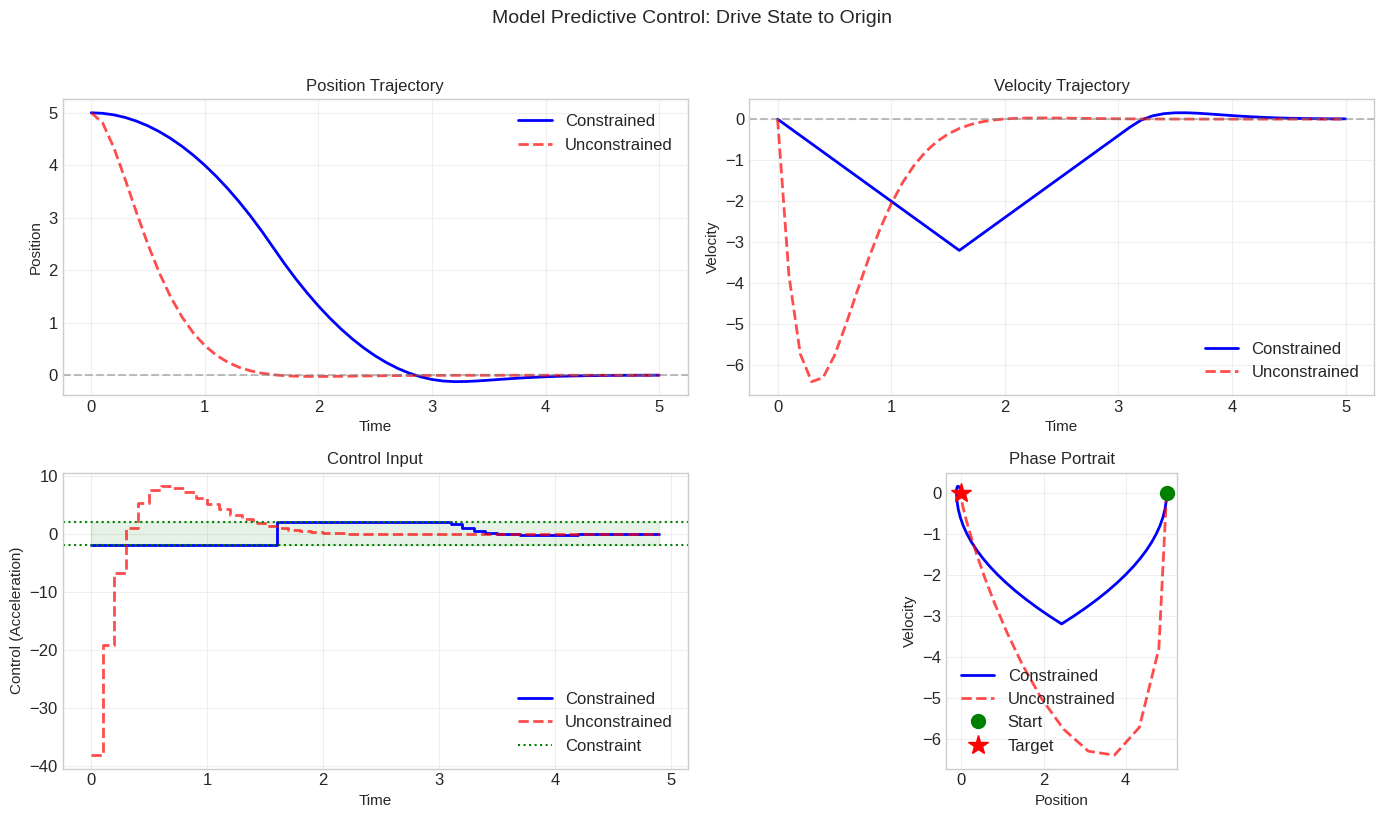


MPC Results:
Initial state: position = 5.0, velocity = 0.0
Final state (constrained): position = 0.0018, velocity = 0.0065
Total cost: 3271.6567


In [38]:
# =============================================================================
# MODEL PREDICTIVE CONTROL (MPC) EXAMPLE
# =============================================================================
from scipy.optimize import minimize

def mpc_control(A, B, Q, R, x0, T, x_bounds=None, u_bounds=None):
    """
    Solve MPC problem for linear system x_{t+1} = Ax_t + Bu_t
    
    Minimize: sum ||x_t||_Q^2 + sum ||u_t||_R^2
    
    Returns optimal control sequence and resulting trajectory.
    """
    n_x = A.shape[0]  # State dimension
    n_u = B.shape[1]  # Control dimension
    
    def objective(z):
        """z = [u_0, u_1, ..., u_{T-1}] flattened"""
        u = z.reshape(T, n_u)
        
        # Simulate trajectory
        x = np.zeros((T+1, n_x))
        x[0] = x0
        for t in range(T):
            x[t+1] = A @ x[t] + B @ u[t]
        
        # Compute cost
        cost = 0
        for t in range(T+1):
            cost += x[t] @ Q @ x[t]
        for t in range(T):
            cost += u[t] @ R @ u[t]
        
        return cost
    
    # Initial guess
    z0 = np.zeros(T * n_u)
    
    # Bounds on control
    bounds = None
    if u_bounds is not None:
        bounds = [u_bounds] * T * n_u
    
    result = minimize(objective, z0, method='SLSQP', bounds=bounds)
    
    # Extract optimal controls and trajectory
    u_opt = result.x.reshape(T, n_u)
    x_opt = np.zeros((T+1, n_x))
    x_opt[0] = x0
    for t in range(T):
        x_opt[t+1] = A @ x_opt[t] + B @ u_opt[t]
    
    return u_opt, x_opt, result.fun

# Define a simple 2D system (double integrator)
# State: [position, velocity], Control: [acceleration]
dt = 0.1
A = np.array([[1, dt],
              [0, 1]])
B = np.array([[0.5*dt**2],
              [dt]])

# Cost matrices
Q = np.diag([10, 1])  # Penalize position more
R = np.array([[0.1]])  # Control cost

# Initial state (start at position 5, velocity 0)
x0 = np.array([5.0, 0.0])

# Horizon
T = 50

# Solve MPC
u_opt, x_opt, cost = mpc_control(A, B, Q, R, x0, T, u_bounds=(-2, 2))

# Also solve without control bounds for comparison
u_unconstrained, x_unconstrained, _ = mpc_control(A, B, Q, R, x0, T)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot 1: Position trajectory
ax1 = axes[0, 0]
time = np.arange(T+1) * dt
ax1.plot(time, x_opt[:, 0], 'b-', linewidth=2, label='Constrained')
ax1.plot(time, x_unconstrained[:, 0], 'r--', linewidth=2, alpha=0.7, label='Unconstrained')
ax1.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Time', fontsize=11)
ax1.set_ylabel('Position', fontsize=11)
ax1.set_title('Position Trajectory', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Velocity trajectory
ax2 = axes[0, 1]
ax2.plot(time, x_opt[:, 1], 'b-', linewidth=2, label='Constrained')
ax2.plot(time, x_unconstrained[:, 1], 'r--', linewidth=2, alpha=0.7, label='Unconstrained')
ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('Time', fontsize=11)
ax2.set_ylabel('Velocity', fontsize=11)
ax2.set_title('Velocity Trajectory', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Control input
ax3 = axes[1, 0]
time_u = np.arange(T) * dt
ax3.step(time_u, u_opt.flatten(), 'b-', linewidth=2, where='post', label='Constrained')
ax3.step(time_u, u_unconstrained.flatten(), 'r--', linewidth=2, where='post', alpha=0.7, label='Unconstrained')
ax3.axhline(2, color='green', linestyle=':', label='Constraint')
ax3.axhline(-2, color='green', linestyle=':')
ax3.fill_between(time_u, -2, 2, alpha=0.1, color='green')
ax3.set_xlabel('Time', fontsize=11)
ax3.set_ylabel('Control (Acceleration)', fontsize=11)
ax3.set_title('Control Input', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Phase portrait
ax4 = axes[1, 1]
ax4.plot(x_opt[:, 0], x_opt[:, 1], 'b-', linewidth=2, label='Constrained')
ax4.plot(x_unconstrained[:, 0], x_unconstrained[:, 1], 'r--', linewidth=2, alpha=0.7, label='Unconstrained')
ax4.plot(x0[0], x0[1], 'go', markersize=10, label='Start')
ax4.plot(0, 0, 'r*', markersize=15, label='Target')
ax4.set_xlabel('Position', fontsize=11)
ax4.set_ylabel('Velocity', fontsize=11)
ax4.set_title('Phase Portrait', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_aspect('equal')

plt.suptitle('Model Predictive Control: Drive State to Origin', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('media/images/mpc_control.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nMPC Results:")
print(f"Initial state: position = {x0[0]}, velocity = {x0[1]}")
print(f"Final state (constrained): position = {x_opt[-1, 0]:.4f}, velocity = {x_opt[-1, 1]:.4f}")
print(f"Total cost: {cost:.4f}")

---

## 8.6 Network and Graph Applications

### 8.6.1 Network Flow

**Problem**: Route flow through a network to minimize cost.

$$\min \sum_{(i,j)} c_{ij} f_{ij}$$
$$\text{s.t. } \sum_j f_{ij} - \sum_j f_{ji} = b_i \quad \forall i$$
$$\quad\quad 0 \leq f_{ij} \leq u_{ij}$$

This is a **linear program** with special structure.

### 8.6.2 Shortest Path

**Problem**: Find shortest path from source to sink.

This is a special case of network flow (set $b_s = 1$, $b_t = -1$, others = 0).

### 8.6.3 PageRank and Markov Chains

Finding stationary distributions involves solving linear systems, which can be formulated as optimization problems.

---

## 8.7 Sensor Network Localization

### 8.7.1 Problem Setup

**Given**:

- Known anchor positions $a_1, \ldots, a_m$
- Unknown sensor positions $x_1, \ldots, x_n$
- Distance measurements between some pairs

**Goal**: Determine sensor positions

### 8.7.2 Least Squares Formulation

$$\min_x \sum_{(i,j) \in \mathcal{E}} (\|x_i - x_j\| - d_{ij})^2 + \sum_{(i,k) \in \mathcal{A}} (\|x_i - a_k\| - d_{ik})^2$$

**Problem**: Non-convex due to norm inside squared term.

### 8.7.3 Semidefinite Relaxation

Introduce $Y = X X^T$ and relax to:
$$\min \text{convex objective}$$
$$\text{s.t. } Y \succeq 0$$

This **SDP relaxation** often finds global optimum!

---

## 8.8 Facility Location

### 8.8.1 Problem

**Given**: Customer locations $c_1, \ldots, c_n$

**Goal**: Choose $k$ facility locations $f_1, \ldots, f_k$ to minimize total distance.

### 8.8.2 Continuous Version

$$\min_{f_1, \ldots, f_k} \sum_i \min_j \|c_i - f_j\|$$

**Non-convex** (min of convex is not convex), but approximations exist.

### 8.8.3 Single Facility (Weber Problem)

For $k=1$:
$$\min_f \sum_i \|c_i - f\|$$

This is a **second-order cone program** and is convex!


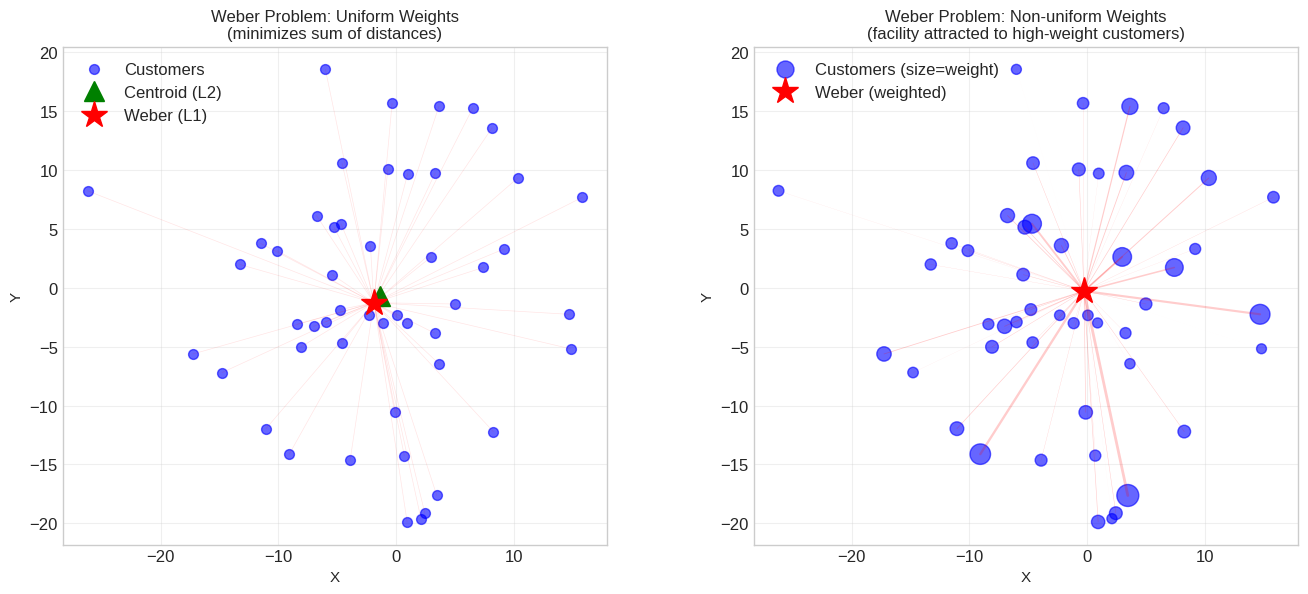


Facility Location Results:
Number of customers: 50
Centroid (minimize sum of squared distances): [-1.35675631 -0.72017404]
Weber point (minimize sum of distances): [-1.90513071 -1.27576294]
Weber point (weighted): [-0.27943426 -0.28126126]


In [39]:
# =============================================================================
# FACILITY LOCATION: WEBER PROBLEM
# =============================================================================

def weber_objective(f, customers, weights=None):
    """Sum of weighted distances from facility to customers."""
    if weights is None:
        weights = np.ones(len(customers))
    return sum(w * np.linalg.norm(f - c) for w, c in zip(weights, customers))

def solve_weber(customers, weights=None, x0=None):
    """Solve single-facility location problem."""
    if x0 is None:
        x0 = np.mean(customers, axis=0)
    
    result = minimize(weber_objective, x0, args=(customers, weights),
                     method='BFGS')
    return result.x

# Generate random customer locations
np.random.seed(42)
n_customers = 50
customers = np.random.randn(n_customers, 2) * 10

# Different weighting schemes
weights_uniform = np.ones(n_customers)
weights_varied = np.random.exponential(1, n_customers)

# Solve for different scenarios
facility_uniform = solve_weber(customers, weights_uniform)
facility_weighted = solve_weber(customers, weights_varied)
centroid = np.mean(customers, axis=0)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Uniform weights
ax1 = axes[0]
ax1.scatter(customers[:, 0], customers[:, 1], c='blue', s=50, alpha=0.6, label='Customers')
ax1.plot(centroid[0], centroid[1], 'g^', markersize=15, label='Centroid (L2)')
ax1.plot(facility_uniform[0], facility_uniform[1], 'r*', markersize=20, label='Weber (L1)')

# Draw lines to facility
for c in customers:
    ax1.plot([facility_uniform[0], c[0]], [facility_uniform[1], c[1]], 
             'r-', alpha=0.1, linewidth=0.5)

ax1.set_xlabel('X', fontsize=11)
ax1.set_ylabel('Y', fontsize=11)
ax1.set_title('Weber Problem: Uniform Weights\n(minimizes sum of distances)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: Weighted
ax2 = axes[1]
# Size proportional to weight
sizes = 50 + 200 * weights_varied / weights_varied.max()
ax2.scatter(customers[:, 0], customers[:, 1], c='blue', s=sizes, alpha=0.6, label='Customers (size=weight)')
ax2.plot(facility_weighted[0], facility_weighted[1], 'r*', markersize=20, label='Weber (weighted)')

# Draw lines with thickness proportional to weight
for c, w in zip(customers, weights_varied):
    ax2.plot([facility_weighted[0], c[0]], [facility_weighted[1], c[1]], 
             'r-', alpha=0.2, linewidth=w/weights_varied.max()*2)

ax2.set_xlabel('X', fontsize=11)
ax2.set_ylabel('Y', fontsize=11)
ax2.set_title('Weber Problem: Non-uniform Weights\n(facility attracted to high-weight customers)', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.savefig('media/images/facility_location.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFacility Location Results:")
print(f"Number of customers: {n_customers}")
print(f"Centroid (minimize sum of squared distances): {centroid}")
print(f"Weber point (minimize sum of distances): {facility_uniform}")
print(f"Weber point (weighted): {facility_weighted}")

---

## 8.9 Exercises - Chapter 8

### Exercise 8.1 (Easy): Ridge Regression

Implement ridge regression from scratch and verify it matches sklearn's `Ridge`.

### Exercise 8.2 (Medium): Elastic Net

Implement **Elastic Net** which combines L1 and L2 penalties:
$$\min_w \|Xw - y\|_2^2 + \alpha \lambda \|w\|_1 + (1-\alpha)\frac{\lambda}{2} \|w\|_2^2$$

### Exercise 8.3 (Medium): Portfolio with Constraints

Add the following constraints to the portfolio optimization problem:
1. Maximum 20% in any single asset
2. At least 5% in bonds (assume last asset is bonds)

### Exercise 8.4 (Challenging): SVM from Scratch

Implement a soft-margin SVM using `scipy.optimize`:
$$\min_{w, b, \xi} \frac{1}{2}\|w\|^2 + C \sum_i \xi_i$$
$$\text{s.t. } y_i(w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$$

### Exercise 8.5 (Challenging): Signal Denoising

Implement Total Variation denoising for a 1D signal:
$$\min_x \frac{1}{2}\|x - y\|_2^2 + \lambda \sum_i |x_{i+1} - x_i|$$

Test on a noisy step function and plot results for different $\lambda$.

---

## 8.10 Chapter 8 Summary

### Application Taxonomy

| Domain                 | Problem Type     | Key Insight                         |
| ---------------------- | ---------------- | ----------------------------------- |
| **ML: Regression**     | QP               | Regularization = adding constraints |
| **ML: Classification** | QP (SVM), Smooth | Dual enables kernel trick           |
| **Signal Processing**  | LP/SOCP          | L1 promotes sparsity                |
| **Finance**            | QP               | Covariance matrix is PSD            |
| **Control**            | QP               | Linear dynamics → convex            |
| **Networks**           | LP               | Special structure → fast algorithms |
| **Localization**       | SDP              | Relaxation recovers global optimum  |

### Key Modeling Techniques

1. **L1 for sparsity**: Use $\|x\|_1$ when you want few non-zeros
2. **L2 for smoothness**: Use $\|x\|_2^2$ for stability
3. **Relaxation**: Replace hard problem with convex approximation
4. **Duality**: Sometimes dual is easier (SVM, compressed sensing)

### Common Pitfalls

1. **Forgetting constraints**: Check feasibility first
2. **Numerical issues**: Scale variables appropriately
3. **Local vs global**: For non-convex, results depend on initialization
4. **Model mismatch**: Real problems may not perfectly fit convex formulation


---
# Course Conclusion
---

## Complete Course Summary

### Journey Through Convex Optimization

| Chapter | Topic            | Key Takeaway                                                        |
| ------- | ---------------- | ------------------------------------------------------------------- |
| **1**   | Introduction     | Convexity enables global optimality                                 |
| **2**   | Math Foundations | Vectors, matrices, calculus are the language                        |
| **3**   | Convex Sets      | Building blocks: halfspaces, polyhedra, cones                       |
| **4**   | Convex Functions | First & second-order conditions; operations that preserve convexity |
| **5**   | Problem Types    | LP ⊂ QP ⊂ SOCP ⊂ SDP hierarchy                                      |
| **6**   | Duality          | KKT conditions are central to theory and algorithms                 |
| **7**   | Algorithms       | From gradient descent to interior point methods                     |
| **8**   | Applications     | ML, finance, control, signals, and beyond                           |

### The Big Picture

```
Problem → Is it convex? → Yes → Use efficient algorithms → Global optimum
                        → No → Try to convexify, or use local methods
```

### What Makes Convex Optimization Special

1. **Global = Local**: Any local minimum is global
2. **Efficient algorithms**: Polynomial-time solvable
3. **Duality**: Provides bounds and complementary solutions
4. **Robust**: Small changes in data → small changes in solution
5. **Theory + Practice**: Beautiful mathematics with real applications

### Essential Tools

| Tool             | Type               | Strengths                                   |
| ---------------- | ------------------ | ------------------------------------------- |
| `scipy.optimize` | General            | Flexible, part of NumPy ecosystem           |
| `cvxpy`          | Disciplined convex | Easy modeling, automatic convexity checking |
| `CVXOPT`         | Python             | Direct interface to solvers                 |
| `MOSEK`          | Commercial         | Fast, handles large problems                |
| `Gurobi`         | Commercial         | State-of-the-art for LP/QP/MIP              |

### Where to Go From Here

1. **Deeper Theory**: Read Boyd & Vandenberghe's "Convex Optimization" (free online)
2. **More Applications**: Explore your domain (ML, finance, control)
3. **Advanced Topics**: SDP, conic programming, ADMM
4. **Implementation**: Try CVXPY for real projects
5. **Non-convex**: Study when relaxations work

---

## Final Thoughts

Convex optimization is one of the great success stories of applied mathematics. The theory is elegant, the algorithms are practical, and the applications are everywhere.

Whether you're:

- Training a machine learning model
- Designing a control system
- Optimizing a financial portfolio
- Processing signals
- Allocating resources

Understanding convex optimization gives you a powerful and principled toolkit.

**Key insight to remember**: Before trying to solve a problem, ask:

1. Is it convex?
2. Can it be made convex?
3. What structure can we exploit?

The answers often determine whether a problem is easy or hard.

---

_Congratulations on completing this course! You now have a solid foundation in convex optimization theory and practice._
